## Coursera Project
### Clean and Analyze Social Media Usage Data with Python
merge

#### Summary :
1. create a comprehensive report that analyzes the performance of different categories of social media posts.
2. work for a social media marketing company that specializes in promoting brands and products on a popular social media platform
3. responsible for analyzing the performance of different types of posts based on categories, such as health, family, food, etc. to help clients optimize their social media strategy and increase their reach and engagement.
4. The team will use your analysis to  making data-driven recommendations to clients to improve their social media performance. This feature will help the marketing agency deliver tweets on time, within budget, and gain fast results.

#### Objectives :
1. Increase client reach and engagement
2. Gain valuable insights that will help improve social media performance
3. Achieve their social media goals and provide data-driven recommendations

#### Challange :
1. social media analyst responsible for collecting, cleaning, and analyzing data on a client's social media posts. 
2. responsible for communicating the insights and making data-driven recommendations to clients to improve their social media performance.
3. Need to set up the environment, identify the categories for the post (fitness, tech, family, beauty, etc)  process, analyze, and visualize data.

#### Readings :
1. https://towardsdatascience.com/how-to-access-data-from-the-twitter-api-using-tweepy-python-e2d9e4d54978
2. https://developer.x.com/en/docs/x-api/tweets/search/api-reference/get-tweets-search-recent
3. https://thesai.org/Publications/ViewPaper?Volume=13&Issue=6&Code=IJACSA&SerialNo=69

### i. ETL
1. Extract : from Twitter API to JSON
2. Transform : from JSON to Pandas Dataframe
3. Load : into analysis

In [1]:
#-------------- library ---------------------#

#-------------- default module --------------#
import os
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Visualize missing data using missingno
# msno.matrix(df)       # Matrix plot showing the location of missing data
# msno.bar(df)          # Bar chart showing the count of non-missing values per column
# msno.heatmap(df)      # Heatmap showing the correlation of missing data between columns
# msno.dendrogram(df)   # Dendrogram showing the hierarchical clustering of missing values

import plotly.express as px

# ------------------ side dish -------------- #

from IPython.display import HTML
from matplotlib.colors import ListedColormap

# ---------- layout & optional view ------------ #
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # able to run multiple command in 1 line

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)  # display whole numbers without +3
pd.set_option('display.float_format', '{:,.1f}'.format) # thousand separated by comma
pd.options.display.float_format = '{:,}'.format # thousand separated by comma

sns.color_palette("PuBu")
sns.set_style("whitegrid")

custom_palette = ["#1e81b0", "#e28743", "#eab676", "#76b5c5", "#abdbe3", "#063970" , "#154c79", "#1979a9"]
sns.set_palette(custom_palette)
sns.set(style="whitegrid", font_scale=1.2, palette=custom_palette)

pd.set_option('display.max_columns', None)

%matplotlib inline
%matplotlib inline

In [2]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = round((df.isna().sum()) / len(df), 2)
    summary_df['duplicated#'] = df.duplicated().sum()
    summary_df['duplicated%'] = round((df.duplicated().sum()) / len(df) * 100, 2)
    summary_df['uniques'] = df.nunique().values
    summary_df['unique'] = [', '.join(map(str, df[col].unique()[:4])) for col in df.columns]
    summary_df['count'] = df.count().values
    summary_df['mode'] = df.mode().transpose().iloc[:, 0].values

    # Merge numerical summary information
    numerical_cols = df.select_dtypes(include=['number']).columns
    if not numerical_cols.empty:
        numerical_summary_df = pd.DataFrame({
            'Min' : df[numerical_cols].min(),
            'Max' : df[numerical_cols].max(),
            'Mean': df[numerical_cols].mean(),
            'Median': df[numerical_cols].median()
        })
        summary_df = summary_df.merge(numerical_summary_df, left_index=True, right_index=True, how='left')

    # Apply background gradient to the summary DataFrame
    style = summary_df.style.background_gradient(cmap='Blues')

    return style

In [3]:
folder = '/Users/amarindraardinova/Desktop/DataScience/Coursera/Clean and analyze social media usage data with Python/'
# adjust folder accordingly

# Definisikan jalur file
d1 = f"{folder}/mobilephotography_25des.csv"
d2 = f"{folder}/ShotOnSnapdragon_25des.csv"
d3 = f"{folder}/shotoniphone.csv"
d4 = f"{folder}/MobilePhotography.csv"
d5 = f"{folder}/ShotOnSnapdragon.csv"
d6 = f"{folder}/MobilePhotography_27Dec.csv"

# Gabungkan data dari file CSV menjadi satu DataFrame
df1 = pd.read_csv(d1)
df2 = pd.read_csv(d2)
df3 = pd.read_csv(d3)
df4 = pd.read_csv(d4)
df5 = pd.read_csv(d5)
df6 = pd.read_csv(d6)

# Menggabungkan DataFrame
df = pd.concat([df1, df2, df3, df4, df5,df6], ignore_index=True)

### Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1138 non-null   int64  
 1   tweet_text          1138 non-null   object 
 2   created_at          1138 non-null   object 
 3   domain_id           1138 non-null   int64  
 4   domain_name         1138 non-null   object 
 5   domain_description  1137 non-null   object 
 6   entity_id           1138 non-null   int64  
 7   entity_name         1138 non-null   object 
 8   entity_description  1138 non-null   object 
 9   likes               1138 non-null   int64  
 10  retweets            1138 non-null   int64  
 11  replies             1138 non-null   int64  
 12  quotes              1138 non-null   int64  
 13  bookmark_count      779 non-null    float64
 14  impression_count    779 non-null    float64
 15  datetime            1138 non-null   object 
 16  date  

In [5]:
summary(df)

,dtypes,missing#,missing%,duplicated#,duplicated%,uniques,unique,count,mode,Min,Max,Mean,Median
tweet_id,int64,0,0.000000,25,2.200000,68,"1871824497742959096, 1871820184866226684, 1871813193968070752, 1871809050796773643",1138,1871191408369119525,1871115965431271680.000000,1872347774509068544.000000,1871579914152259840.000000,1871624934998630656.000000
tweet_text,object,0,0.000000,25,2.200000,68,"Red Eye out of Cape Town. #travel #travelphotography #slowshutter #slowshutterspeed #nightphotography #viewsfromplanewindows #wanderlust #shotoniphone #Photography https://t.co/RqaVAz2fsA, The best flying above the rest . @qatarairways #worldsbest @Boeing @BoeingAirplanes #777 #shotoniphone #appleiphone15pro https://t.co/FNAKGXIGIR, Captured with iPhone: Light, shadow, and geometry unite to unveil the hidden beauty of architecture. A poetic reflection of urban soul. #ShotOniPhone #MyslivtsevShot @Apple #astana #visitastana #astanacity #astanakz #cinematic #photoart https://t.co/qaByma2QfF, Each sunrise is an awesome wonder. Early morning view of Lower Manhattan, New York City taken from Jersey City, New Jersey. #shotoniphone Packers Rudolph Travis Cypress $CUTO https://t.co/yWqGtoF8O8",1138,"13.12 mile run, .5 mile walk! Big Podcast Day today! #runDisney #WDW #Disney #Disneyland #WaltDisneyWorld #BOGPLizards #BOGP #DopeyChallenge #DopeyToDumbo #DumboDoubleDare #CoastToCoast #running #LizardUp @BOGP_Lizard #podcast #Florida #marathon #Apple #ShotOniPhone https://t.co/iH8jXVGxSq",nan,nan,nan,nan
created_at,object,0,0.000000,25,2.200000,68,"2024-12-25 07:45:11+00:00, 2024-12-25 07:28:03+00:00, 2024-12-25 07:00:16+00:00, 2024-12-25 06:43:48+00:00",1138,2024-12-23 13:49:31+00:00,nan,nan,nan,nan
domain_id,int64,0,0.000000,25,2.200000,32,"46, 30, 66, 67",1138,131,3.000000,173.000000,85.181898,67.000000
domain_name,object,0,0.000000,25,2.200000,32,"Business Taxonomy, Entities [Entity Service], Interests and Hobbies Category, Interests and Hobbies",1138,Unified Twitter Taxonomy,nan,nan,nan,nan
domain_description,object,1,0.000000,25,2.200000,31,"Categories within Brand Verticals that narrow down the scope of Brands, Entity Service top level domain, every item that is in Entity Service should be in this domain, A grouping of interests and hobbies entities, like Novelty Food or Destinations, Interests, opinions, and behaviors of individuals, groups, or cultures; like Speciality Cooking or Theme Parks",1137,A taxonomy of user interests.,nan,nan,nan,nan
entity_id,int64,0,0.000000,25,2.200000,164,"1557697333571112960, 1557697439489880065, 839159814991167489, 857603051657482241",1138,848920371311001600,10000612773.000000,1853510897634873344.000000,1015853239202390528.000000,1022485839232655360.000000
entity_name,object,0,0.000000,25,2.200000,161,"Technology Business, Travel & Transportation Business, Travel, Destinations",1138,Technology,nan,nan,nan,nan
entity_description,object,0,0.000000,25,2.200000,82,"Brands, companies, advertisers and every non-person handle with the profit intent related to softwares, apps, communication equipments, hardwares, Brands, companies, advertisers and every non-person handle with the profit intent related to travel as airlines, travel agencies, hotels, Travel, Destinations",1138,No description,nan,nan,nan,nan
likes,int64,0,0.000000,25,2.200000,18,"0, 2, 1, 3",1138,0,0.000000,179.000000,5.304921,2.000000


#### Duplicates

In [6]:
df.shape[0]

1138

In [7]:
print(df.duplicated().sum())

25


In [8]:
df.duplicated(keep=False).value_counts()

False    1088
True       50
Name: count, dtype: int64

In [9]:
df = df.drop_duplicates(keep='first')

In [10]:
print(df.duplicated().sum())

0


#### Missing Value

In [11]:
df.isna().sum()

tweet_id                 0
tweet_text               0
created_at               0
domain_id                0
domain_name              0
domain_description       1
entity_id                0
entity_name              0
entity_description       0
likes                    0
retweets                 0
replies                  0
quotes                   0
bookmark_count         350
impression_count       350
datetime                 0
date                     0
hour                     0
day_name                 0
media_type            1113
view_count            1113
dtype: int64

In [12]:
df[df['domain_description'].isna()]

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,media_type,view_count
59,1871809050796773643,Each sunrise is an awesome wonder. Early morni...,2024-12-25 06:43:48+00:00,26,Sports League,NaN,689566314835259392,NFL,No description,0,0,0,0,0.0,7.0,2024-12-25 06:43:48+0000,2024-12-25,6,Wednesday,NaN,NaN


In [13]:
df.loc[df['domain_description'].isna(), 'domain_description'] = 'sports'

In [14]:
df.isna().sum()

tweet_id                 0
tweet_text               0
created_at               0
domain_id                0
domain_name              0
domain_description       0
entity_id                0
entity_name              0
entity_description       0
likes                    0
retweets                 0
replies                  0
quotes                   0
bookmark_count         350
impression_count       350
datetime                 0
date                     0
hour                     0
day_name                 0
media_type            1113
view_count            1113
dtype: int64

In [15]:
df.shape[0]

1113

In [16]:
df[df['bookmark_count'].notna()].head()

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,media_type,view_count
0,1871824497742959096,Red Eye out of Cape Town.\n\n#travel #travelph...,2024-12-25 07:45:11+00:00,46,Business Taxonomy,Categories within Brand Verticals that narrow ...,1557697333571112960,Technology Business,"Brands, companies, advertisers and every non-p...",0,0,0,0,0.0,1.0,2024-12-25 07:45:11+0000,2024-12-25,7,Wednesday,NaN,NaN
1,1871824497742959096,Red Eye out of Cape Town.\n\n#travel #travelph...,2024-12-25 07:45:11+00:00,46,Business Taxonomy,Categories within Brand Verticals that narrow ...,1557697439489880065,Travel & Transportation Business,"Brands, companies, advertisers and every non-p...",0,0,0,0,0.0,1.0,2024-12-25 07:45:11+0000,2024-12-25,7,Wednesday,NaN,NaN
2,1871824497742959096,Red Eye out of Cape Town.\n\n#travel #travelph...,2024-12-25 07:45:11+00:00,30,Entities [Entity Service],"Entity Service top level domain, every item th...",839159814991167489,Travel,Travel,0,0,0,0,0.0,1.0,2024-12-25 07:45:11+0000,2024-12-25,7,Wednesday,NaN,NaN
3,1871824497742959096,Red Eye out of Cape Town.\n\n#travel #travelph...,2024-12-25 07:45:11+00:00,66,Interests and Hobbies Category,"A grouping of interests and hobbies entities, ...",857603051657482241,Destinations,Destinations,0,0,0,0,0.0,1.0,2024-12-25 07:45:11+0000,2024-12-25,7,Wednesday,NaN,NaN
4,1871824497742959096,Red Eye out of Cape Town.\n\n#travel #travelph...,2024-12-25 07:45:11+00:00,67,Interests and Hobbies,"Interests, opinions, and behaviors of individu...",847869714860605440,Photography,Photography,0,0,0,0,0.0,1.0,2024-12-25 07:45:11+0000,2024-12-25,7,Wednesday,NaN,NaN


In [17]:
df[['bookmark_count', 'impression_count']] = df[['bookmark_count', 'impression_count']].fillna(0)

In [18]:
df.isna().sum()

tweet_id                 0
tweet_text               0
created_at               0
domain_id                0
domain_name              0
domain_description       0
entity_id                0
entity_name              0
entity_description       0
likes                    0
retweets                 0
replies                  0
quotes                   0
bookmark_count           0
impression_count         0
datetime                 0
date                     0
hour                     0
day_name                 0
media_type            1113
view_count            1113
dtype: int64

#### Drop Features

In [19]:
# df.drop(columns=['tweet_id'], inplace=True)
df.drop(columns=['media_type'], inplace=True)
df.drop(columns=['view_count'], inplace=True)

In [20]:
df.isna().sum()

tweet_id              0
tweet_text            0
created_at            0
domain_id             0
domain_name           0
domain_description    0
entity_id             0
entity_name           0
entity_description    0
likes                 0
retweets              0
replies               0
quotes                0
bookmark_count        0
impression_count      0
datetime              0
date                  0
hour                  0
day_name              0
dtype: int64

#### Feature Engineering

In [21]:
df['hashtag'] = df['tweet_text'].str.findall(r'#\w+')

In [22]:
# menghilangkan # dan photography
def process_hashtag(hashtag):
    if hashtag.startswith('#') in hashtag:
        return hashtag.replace('#', '').strip()
    return None

In [23]:
# Buat kolom phototheme dengan 3 hashtag pertama tanpa tanda #
df['hashtag_first3'] = df['hashtag'].apply(
    lambda x: [tag.replace('#', '') for tag in x[:3]] if isinstance(x, list) else []
)

# Tampilkan hasil untuk verifikasi
df[['hashtag', 'hashtag_first3']].sample(n=5)


,hashtag,hashtag_first3
618,"[#photographers, #NaturePhotography, #photogra...","[photographers, NaturePhotography, photography]"
909,"[#foodphotography, #portraitphotography, #land...","[foodphotography, portraitphotography, landsca..."
581,"[#MerryChristmas, #Christmas2024, #ShotOnOnepl...","[MerryChristmas, Christmas2024, ShotOnOneplus]"
556,"[#Buddhist, #Maharashtra, #IncredibleIndia, #S...","[Buddhist, Maharashtra, IncredibleIndia]"
298,"[#TomatoPie, #travel, #food, #wine, #mixology,...","[TomatoPie, travel, food]"


In [24]:
# Buat kolom phototheme dengan 3 hashtag terakhir tanpa tanda #
df['hashtag_last3'] = df['hashtag'].apply(
    lambda x: [tag.replace('#', '') for tag in x[-3:]] if isinstance(x, list) else []
)

# Tampilkan hasil untuk verifikasi
df[['hashtag', 'hashtag_last3']].sample(n=5)


,hashtag,hashtag_last3
902,"[#foodphotography, #portraitphotography, #land...","[photograph, mobilephotography, wildlifephotog..."
470,"[#Buddhist, #Maharashtra, #IncredibleIndia, #S...","[Heritage, Culture, Architecture]"
899,"[#foodphotography, #portraitphotography, #land...","[photograph, mobilephotography, wildlifephotog..."
373,"[#nofilter, #merrychristmas, #christmaseve, #f...","[plumcake, homemade, egglesscake]"
60,[#shotoniphone],[shotoniphone]


In [25]:
df.hashtag.value_counts()

hashtag
[#Buddhist, #Maharashtra, #IncredibleIndia, #Shotoniphone, #Photography, #Art, #Travel, #Heritage, #Culture, #Architecture]                                                                                                                                                                          154
[#foodphotography, #portraitphotography, #landscapephotography, #photos, #weddingphotography, #photoshop, #blackandwhitephotography, #photographylovers, #canonphotography, #filmphotography, #photograph, #mobilephotography, #wildlifephotography]                                                  95
[#ShotOnSnapdragon, #ShotOnOPPO, #FindX7Ultra, #Hasselblad, #HyperToneCameraSystem]                                                                                                                                                                                                                   48
[#Auckland, #shotoniphone, #iphonephoto, #iphone12pro, #dogs, #BichonFrisé, #Christmas, #Christmas202

In [26]:
df.hashtag_first3.value_counts()

hashtag_first3
[Buddhist, Maharashtra, IncredibleIndia]                        154
[foodphotography, portraitphotography, landscapephotography]     95
[Auckland, shotoniphone, iphonephoto]                            79
[ShotOnSnapdragon, ShotOnOPPO, FindX7Ultra]                      48
[TomatoPie, travel, food]                                        36
[runDisney, WDW, Disney]                                         36
[SonomaCountyChardonnay, Costco, travel]                         30
[ShotOniPhone, StreetPhotography, AbstractArt]                   30
[photographers, TimeToCelebrate, withGalaxy]                     23
[worldsbest, 777, shotoniphone]                                  23
[photographers, NaturePhotography, photography]                  21
[travel, travelphotography, slowshutter]                         21
[MerryChristmas, HappyNewYear, UnderwaterSanta]                  20
[shotoniphone, photography, london]                              20
[streetphotography, xiaomi14serie

In [27]:
df['smartphone'] = df['hashtag'].apply(lambda x: 'iPhone' if any('iphone' in hashtag.lower() for hashtag in x) else 'Android')

In [28]:
# Daftar kategori yang telah diberikan
categories = {
    'traveling': ['travel', 'urbanphotography', 'Auckland', 'disney', 'india', 'scotland', 'auckland', 'city', 
                  'architecture','bangalore','StreetPhotography','Disney','london'],
    'portrait' : ['portrait', 'art', 'photos', 'photoshop', 'hasselblad', 'transformerscollection', 
                  'portraitphotography', 'toyphotography','AbstractArt','photographers'],
    'foodphoto': ['foodphotography', 'cafe', 'resto', 'restaurant', 'steak', 'bir', 'wine', 'recipes', 'italianfood', 
                  'lunch', 'dinner', 'breakfast', 'bread', 'foodphotography'],
    'event'    : ['wedding', 'MerryChristmas', 'HappyNewYear', 'merrychristmas','HappyNewYear',
                 'Christmas2024'],
    'blackandwhite': ['blackandwhite'],
    'wildlife' : ['wildlifephotography', 'birdphotography', 'naturephotography'],
    'nite'     : ['nite', 'astro', 'light', 'nightphotography'],
    'landscape': ['landscapephotography', 'sunset', 'sunrise', 'longexposure', 'slowshutterspeed', 
                  'streetphotography', 'hdrphotography','slowshutter'],
    'sport'    : ['run', 'running', 'jogging', 'nike']
}

# Fungsi untuk menentukan kategori berdasarkan hashtag
def categorize_photostyle(hashtag_first3):
    if not isinstance(hashtag_first3, list):  # Pastikan input adalah daftar
        return 'other'
    for category, keywords in categories.items():
        # Periksa apakah ada hashtag yang cocok dengan kategori
        if any(keyword.lower() in [tag.lower() for tag in hashtag_first3] for keyword in keywords):
            return category
    return 'other'  # Jika tidak ada yang cocok, masukkan ke kategori 'other'

# Terapkan fungsi untuk kolom 'phototheme' dan buat fitur 'photostyle'
df['photostyle_first'] = df['hashtag_first3'].apply(categorize_photostyle)

# Tampilkan hasil
df[['hashtag_first3', 'photostyle_first']].sample(n=5, random_state=42)

,hashtag_first3,photostyle_first
901,"[foodphotography, portraitphotography, landsca...",portrait
104,"[Auckland, shotoniphone, iphonephoto]",traveling
1068,"[ShotOnSnapdragon, withNothing]",other
741,"[runDisney, WDW, Disney]",traveling
298,"[TomatoPie, travel, food]",traveling


In [29]:
df.sample(5)

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,hashtag,hashtag_first3,hashtag_last3,smartphone,photostyle_first
132,1871772035745292311,Merry Christmas from the ghats of #Yamuna on a...,2024-12-25 04:16:43+00:00,131,Unified Twitter Taxonomy,A taxonomy of user interests.,1853510897634873344,Christmas 2024,No description,3,0,1,0,0.0,49.0,2024-12-25 04:16:43+0000,2024-12-25,4,Wednesday,"[#Yamuna, #WednesdayMorning, #photography, #de...","[Yamuna, WednesdayMorning, photography]","[MerryXmas, shotoniphone, yamunaghat]",iPhone,other
588,1871772346857775429,'Twas the night before Christmas....\n\n#Merry...,2024-12-25 04:17:57+00:00,29,Events [Entity Service],Real world events.,1250078501849280512,Christmas,This entity includes all conversations for Chr...,3,1,0,0,0.0,43.0,2024-12-25 04:17:57+0000,2024-12-25,4,Wednesday,"[#MerryChristmas, #ShotOnSnapdragon, #WithGala...","[MerryChristmas, ShotOnSnapdragon, WithGalaxy]","[WithGalaxy, TeamGalaxy, TimeToCelebrate]",Android,event
541,1871567073425424424,Rock-Cut #Buddhist Stupa . An amazing work by ...,2024-12-24 14:42:16+00:00,30,Entities [Entity Service],"Entity Service top level domain, every item th...",848985956778561538,Mobile,Mobile,9,0,0,0,0.0,119.0,2024-12-24 14:42:16+0000,2024-12-24,14,Tuesday,"[#Buddhist, #Maharashtra, #IncredibleIndia, #S...","[Buddhist, Maharashtra, IncredibleIndia]","[Heritage, Culture, Architecture]",iPhone,other
383,1871589386716057769,"When it comes to macro photography, there’s a ...",2024-12-24 16:10:56+00:00,131,Unified Twitter Taxonomy,A taxonomy of user interests.,1303989823011606528,Tech events,No description,3,0,1,0,0.0,160.0,2024-12-24 16:10:56+0000,2024-12-24,16,Tuesday,"[#Pichazasimu2024, #ShotOniPhone]","[Pichazasimu2024, ShotOniPhone]","[Pichazasimu2024, ShotOniPhone]",iPhone,other
285,1871632005500219541,Our Tomato Pie is a gooey delight https://t.co...,2024-12-24 19:00:18+00:00,4,TV Episodes,Television show episodes,10054215727,Third Round,No description,1,0,1,0,0.0,7.0,2024-12-24 19:00:18+0000,2024-12-24,19,Tuesday,"[#TomatoPie, #travel, #food, #wine, #mixology,...","[TomatoPie, travel, food]","[Vacation, stayhome, Recipes]",iPhone,traveling


In [30]:
hs3_count = df.hashtag_first3.value_counts().to_frame().reset_index()
hs3_count

,hashtag_first3,count
0,"[Buddhist, Maharashtra, IncredibleIndia]",154
1,"[foodphotography, portraitphotography, landsca...",95
2,"[Auckland, shotoniphone, iphonephoto]",79
3,"[ShotOnSnapdragon, ShotOnOPPO, FindX7Ultra]",48
4,"[TomatoPie, travel, food]",36
5,"[runDisney, WDW, Disney]",36
6,"[SonomaCountyChardonnay, Costco, travel]",30
7,"[ShotOniPhone, StreetPhotography, AbstractArt]",30
8,"[photographers, TimeToCelebrate, withGalaxy]",23
9,"[worldsbest, 777, shotoniphone]",23


In [31]:
categories = {
    'traveling': ['travel', 'urbanphotography', 'Auckland', 'disney', 'india', 'scotland', 'auckland', 'city', 
                  'architecture','bangalore','StreetPhotography','Disney','london'],
    'portrait' : ['portrait', 'art', 'photos', 'photoshop', 'hasselblad', 'transformerscollection', 
                  'portraitphotography', 'toyphotography','AbstractArt','photographers'],
    'foodphoto': ['foodphotography', 'cafe', 'resto', 'restaurant', 'steak', 'bir', 'wine', 'recipes', 'italianfood', 
                  'lunch', 'dinner', 'breakfast', 'bread', 'foodphotography'],
    'event'    : ['wedding', 'MerryChristmas', 'HappyNewYear', 'merrychristmas','HappyNewYear',
                 'Christmas2024','MerryXmas'],
    'blackandwhite': ['blackandwhite'],
    'wildlife' : ['wildlifephotography', 'birdphotography', 'naturephotography'],
    'nite'     : ['nite', 'astro', 'light', 'nightphotography'],
    'landscape': ['landscapephotography', 'sunset', 'sunrise', 'longexposure', 'slowshutterspeed', 
                  'streetphotography', 'hdrphotography','slowshutter'],
    'sport'    : ['run', 'running', 'jogging', 'nike']
}

# Fungsi untuk menentukan kategori berdasarkan hashtag
def categorize_hashtags(hashtags, categories):
    for category, keywords in categories.items():
        if any(keyword.lower() in map(str.lower, hashtags) for keyword in keywords):
            return category
    return 'other'  # Jika tidak ada yang cocok, masukkan ke kategori 'other'

# Buat kolom 'photostyle_last' berdasarkan kondisi
df['photostyle_last'] = df.apply(
    lambda row: categorize_hashtags(row['hashtag_last3'], categories) 
    if row['photostyle_first'] == 'other' else row['photostyle_first'], 
    axis=1
)

# Tampilkan hasil
df[['hashtag_first3','photostyle_first', 'hashtag_last3','photostyle_last']].sample(n=5, random_state=42)

,hashtag_first3,photostyle_first,hashtag_last3,photostyle_last
901,"[foodphotography, portraitphotography, landsca...",portrait,"[photograph, mobilephotography, wildlifephotog...",portrait
104,"[Auckland, shotoniphone, iphonephoto]",traveling,"[BichonFrisé, Christmas, Christmas2024]",traveling
1068,"[ShotOnSnapdragon, withNothing]",other,"[ShotOnSnapdragon, withNothing]",other
741,"[runDisney, WDW, Disney]",traveling,"[marathon, Apple, ShotOniPhone]",traveling
298,"[TomatoPie, travel, food]",traveling,"[Vacation, stayhome, Recipes]",traveling


In [32]:
# Buat kolom 'phototheme' dengan logika yang diberikan
df['phototheme'] = df.apply(
    lambda row: row['photostyle_last'] if row['photostyle_first'] == 'other' else row['photostyle_first'],
    axis=1
)

# Tampilkan hasil untuk verifikasi
df[['photostyle_first', 'photostyle_last', 'phototheme']].sample(n=5, random_state=42)

,photostyle_first,photostyle_last,phototheme
901,portrait,portrait,portrait
104,traveling,traveling,traveling
1068,other,other,other
741,traveling,traveling,traveling
298,traveling,traveling,traveling


In [33]:
df.sample(n=4, random_state=42)

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,hashtag,hashtag_first3,hashtag_last3,smartphone,photostyle_first,photostyle_last,phototheme
901,1871196725735768270,#foodphotography #portraitphotography #landsca...,2024-12-23 14:10:39+00:00,131,Unified Twitter Taxonomy,A taxonomy of user interests.,1278066760814456832,Family,No description,0,0,0,0,0.0,0.0,2024-12-23 14:10:39+0000,2024-12-23,14,Monday,"[#foodphotography, #portraitphotography, #land...","[foodphotography, portraitphotography, landsca...","[photograph, mobilephotography, wildlifephotog...",Android,portrait,portrait,portrait
104,1871789136098759040,Fabulous Christmas Day! 🎄🦌🐶\n\n#Auckland #shot...,2024-12-25 05:24:40+00:00,131,Unified Twitter Taxonomy,A taxonomy of user interests.,853980498816679937,Dogs,Dogs,1,0,0,0,0.0,28.0,2024-12-25 05:24:40+0000,2024-12-25,5,Wednesday,"[#Auckland, #shotoniphone, #iphonephoto, #ipho...","[Auckland, shotoniphone, iphonephoto]","[BichonFrisé, Christmas, Christmas2024]",iPhone,traveling,traveling,traveling
1068,1871574625018364131,Drop..\n\nShot on @nothing Phone (2)\nPowered ...,2024-12-24 15:12:17+00:00,30,Entities [Entity Service],"Entity Service top level domain, every item th...",781974596165640192,Telco,No description,18,6,3,0,1.0,219.0,2024-12-24 15:12:17+0000,2024-12-24,15,Tuesday,"[#ShotOnSnapdragon, #withNothing]","[ShotOnSnapdragon, withNothing]","[ShotOnSnapdragon, withNothing]",Android,other,other,other
741,1871191408369119525,"13.12 mile run, .5 mile walk! Big Podcast Day ...",2024-12-23 13:49:31+00:00,131,Unified Twitter Taxonomy,A taxonomy of user interests.,1172175186621108224,Walt Disney World Resort,No description,1,0,0,0,0.0,0.0,2024-12-23 13:49:31+0000,2024-12-23,13,Monday,"[#runDisney, #WDW, #Disney, #Disneyland, #Walt...","[runDisney, WDW, Disney]","[marathon, Apple, ShotOniPhone]",iPhone,traveling,traveling,traveling


In [34]:
phototheme_count = df.phototheme.value_counts().reset_index()
phototheme_count

,phototheme,count
0,traveling,463
1,other,301
2,portrait,187
3,event,86
4,sport,45
5,wildlife,18
6,landscape,13


In [35]:
df['phototheme'].unique()

array(['traveling', 'other', 'event', 'sport', 'portrait', 'wildlife',
       'landscape'], dtype=object)

In [36]:
df['total_engagement'] = df['likes'] + df['retweets'] + df['replies'] + df['quotes'] + df['bookmark_count'] + df['impression_count']

### Exploratory Data Analysis

In [37]:
df.columns

Index(['tweet_id', 'tweet_text', 'created_at', 'domain_id', 'domain_name',
       'domain_description', 'entity_id', 'entity_name', 'entity_description',
       'likes', 'retweets', 'replies', 'quotes', 'bookmark_count',
       'impression_count', 'datetime', 'date', 'hour', 'day_name', 'hashtag',
       'hashtag_first3', 'hashtag_last3', 'smartphone', 'photostyle_first',
       'photostyle_last', 'phototheme', 'total_engagement'],
      dtype='object')

In [38]:
print('total content            : ',df.shape[0])
print('total unique users       : ',df.tweet_id.nunique())
print('total unique entity      : ',df.entity_id.nunique())
print('total likes              : ',df.likes.sum())
print('total retweets           : ',df.retweets.sum())
print('total replies            : ',df.replies.sum())
print('total quotes             : ',df.quotes.sum())

print('total bookmark_count     : ',df.bookmark_count.sum())
print('total impression_count   : ',df.impression_count.sum())
print('total total_engagement   : ',df.total_engagement.sum())

total content            :  1113
total unique users       :  68
total unique entity      :  164
total likes              :  5967
total retweets           :  359
total replies            :  1280
total quotes             :  15
total bookmark_count     :  140.0
total impression_count   :  83717.0
total total_engagement   :  91478.0


In [39]:
summary_eda = {
    'Metric': [
        'total content',
        'total unique users',
        'total unique entity',
        'total likes',
        'total retweets',
        'total replies',
        'total quotes',
        'total bookmark_count',
        'total impression_count',
        'total_engagement',
        'total features'
    ],
    'Value': [
        df.shape[0],
        df.tweet_id.nunique(),
        df.entity_id.nunique(),
        df.likes.sum(),
        df.retweets.sum(),
        df.replies.sum(),
        df.quotes.sum(),
        df.bookmark_count.sum(),
        df.impression_count.sum(),
        df.total_engagement.sum(),
        df.columns.nunique()
    ]
}

df_eda = pd.DataFrame(summary_eda)

df_eda


,Metric,Value
0,total content,"1,113.0"
1,total unique users,68.0
2,total unique entity,164.0
3,total likes,"5,967.0"
4,total retweets,359.0
5,total replies,"1,280.0"
6,total quotes,15.0
7,total bookmark_count,140.0
8,total impression_count,"83,717.0"
9,total_engagement,"91,478.0"


In [40]:
#numerical features
df.select_dtypes(include=['int64', 'float']).columns
df.select_dtypes(include=['int64', 'float']).columns.nunique()

#object features
df.select_dtypes(exclude=['int64', 'float']).columns
df.select_dtypes(exclude=['int64', 'float']).columns.nunique()

Index(['tweet_id', 'domain_id', 'entity_id', 'likes', 'retweets', 'replies',
       'quotes', 'bookmark_count', 'impression_count', 'hour',
       'total_engagement'],
      dtype='object')

11

Index(['tweet_text', 'created_at', 'domain_name', 'domain_description',
       'entity_name', 'entity_description', 'datetime', 'date', 'day_name',
       'hashtag', 'hashtag_first3', 'hashtag_last3', 'smartphone',
       'photostyle_first', 'photostyle_last', 'phototheme'],
      dtype='object')

16

In [41]:
summary_cols = {
    'Metric': [
        'numerical features',
        'total numerical features',
        'object features',
        'total object features'
    ],
    'Value': [
        df.select_dtypes(include=['int64', 'float']).columns,
        df.select_dtypes(include=['int64', 'float']).columns.nunique(),
        df.select_dtypes(exclude=['int64', 'float']).columns,
        df.select_dtypes(exclude=['int64', 'float']).columns.nunique()
    ]
}

df_cols = pd.DataFrame(summary_cols)

df_cols

,Metric,Value
0,numerical features,"Index(['tweet_id', 'domain_id', 'entity_id', '..."
1,total numerical features,11
2,object features,"Index(['tweet_text', 'created_at', 'domain_nam..."
3,total object features,16


In [42]:
df.select_dtypes(include=['int64', 'float']).nunique().reset_index(name='Total')
# df.select_dtypes(exclude=['int64', 'float']).nunique()

,index,Total
0,tweet_id,68
1,domain_id,32
2,entity_id,164
3,likes,18
4,retweets,6
5,replies,5
6,quotes,2
7,bookmark_count,3
8,impression_count,39
9,hour,22


In [43]:
df.smartphone.value_counts().reset_index(name='total_interactions')

,smartphone,total_interactions
0,iPhone,712
1,Android,401


#### Save as Clean Dataset


In [44]:
df.to_csv('SA_v4_clean.csv', index=True)

### Univariate Analysis

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as ply

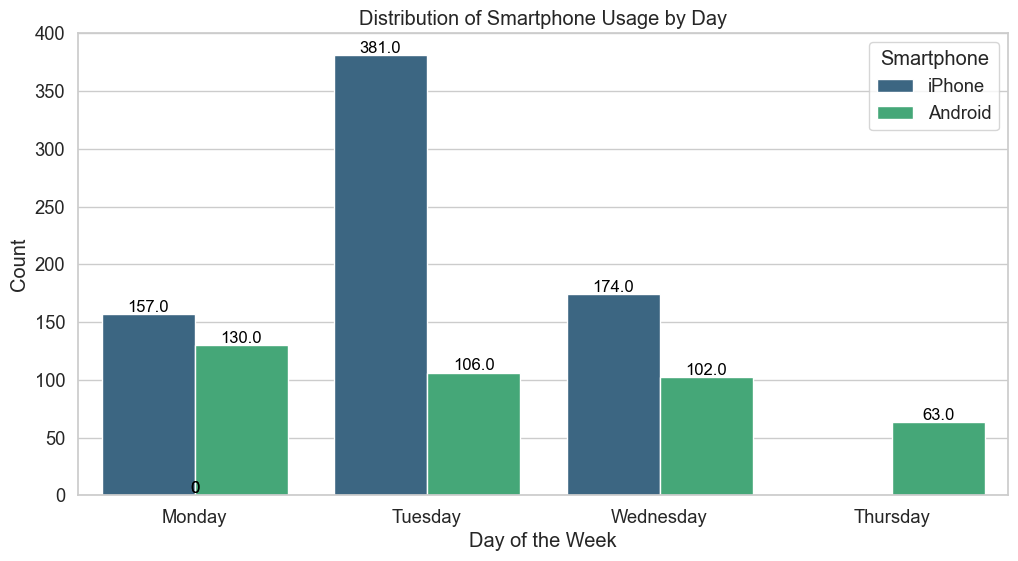

In [46]:
# Mengatur urutan kategori untuk kolom 'day_name'
day_order = ['Monday', 'Tuesday', 'Wednesday','Thursday']
df['day_name'] = pd.Categorical(df['day_name'], categories=day_order, ordered=True)

# Membuat plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='day_name', hue='smartphone', palette='viridis')
plt.title('Distribution of Smartphone Usage by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Smartphone', loc='upper right')

# Menambahkan anotasi untuk setiap batang
for p in ax.patches:  # ax.patches adalah semua batang (bars) yang dibuat oleh countplot
    ax.annotate(f'{p.get_height()}',  # Menampilkan tinggi batang (count)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi anotasi (tengah atas setiap batang)
                ha='center', va='center',  # Horizontal alignment: center, Vertical alignment: center
                fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')  # Menambahkan sedikit offset

plt.show();

In [47]:
public_metrics = ['likes', 'retweets', 'replies','bookmark_count','impression_count','hour']

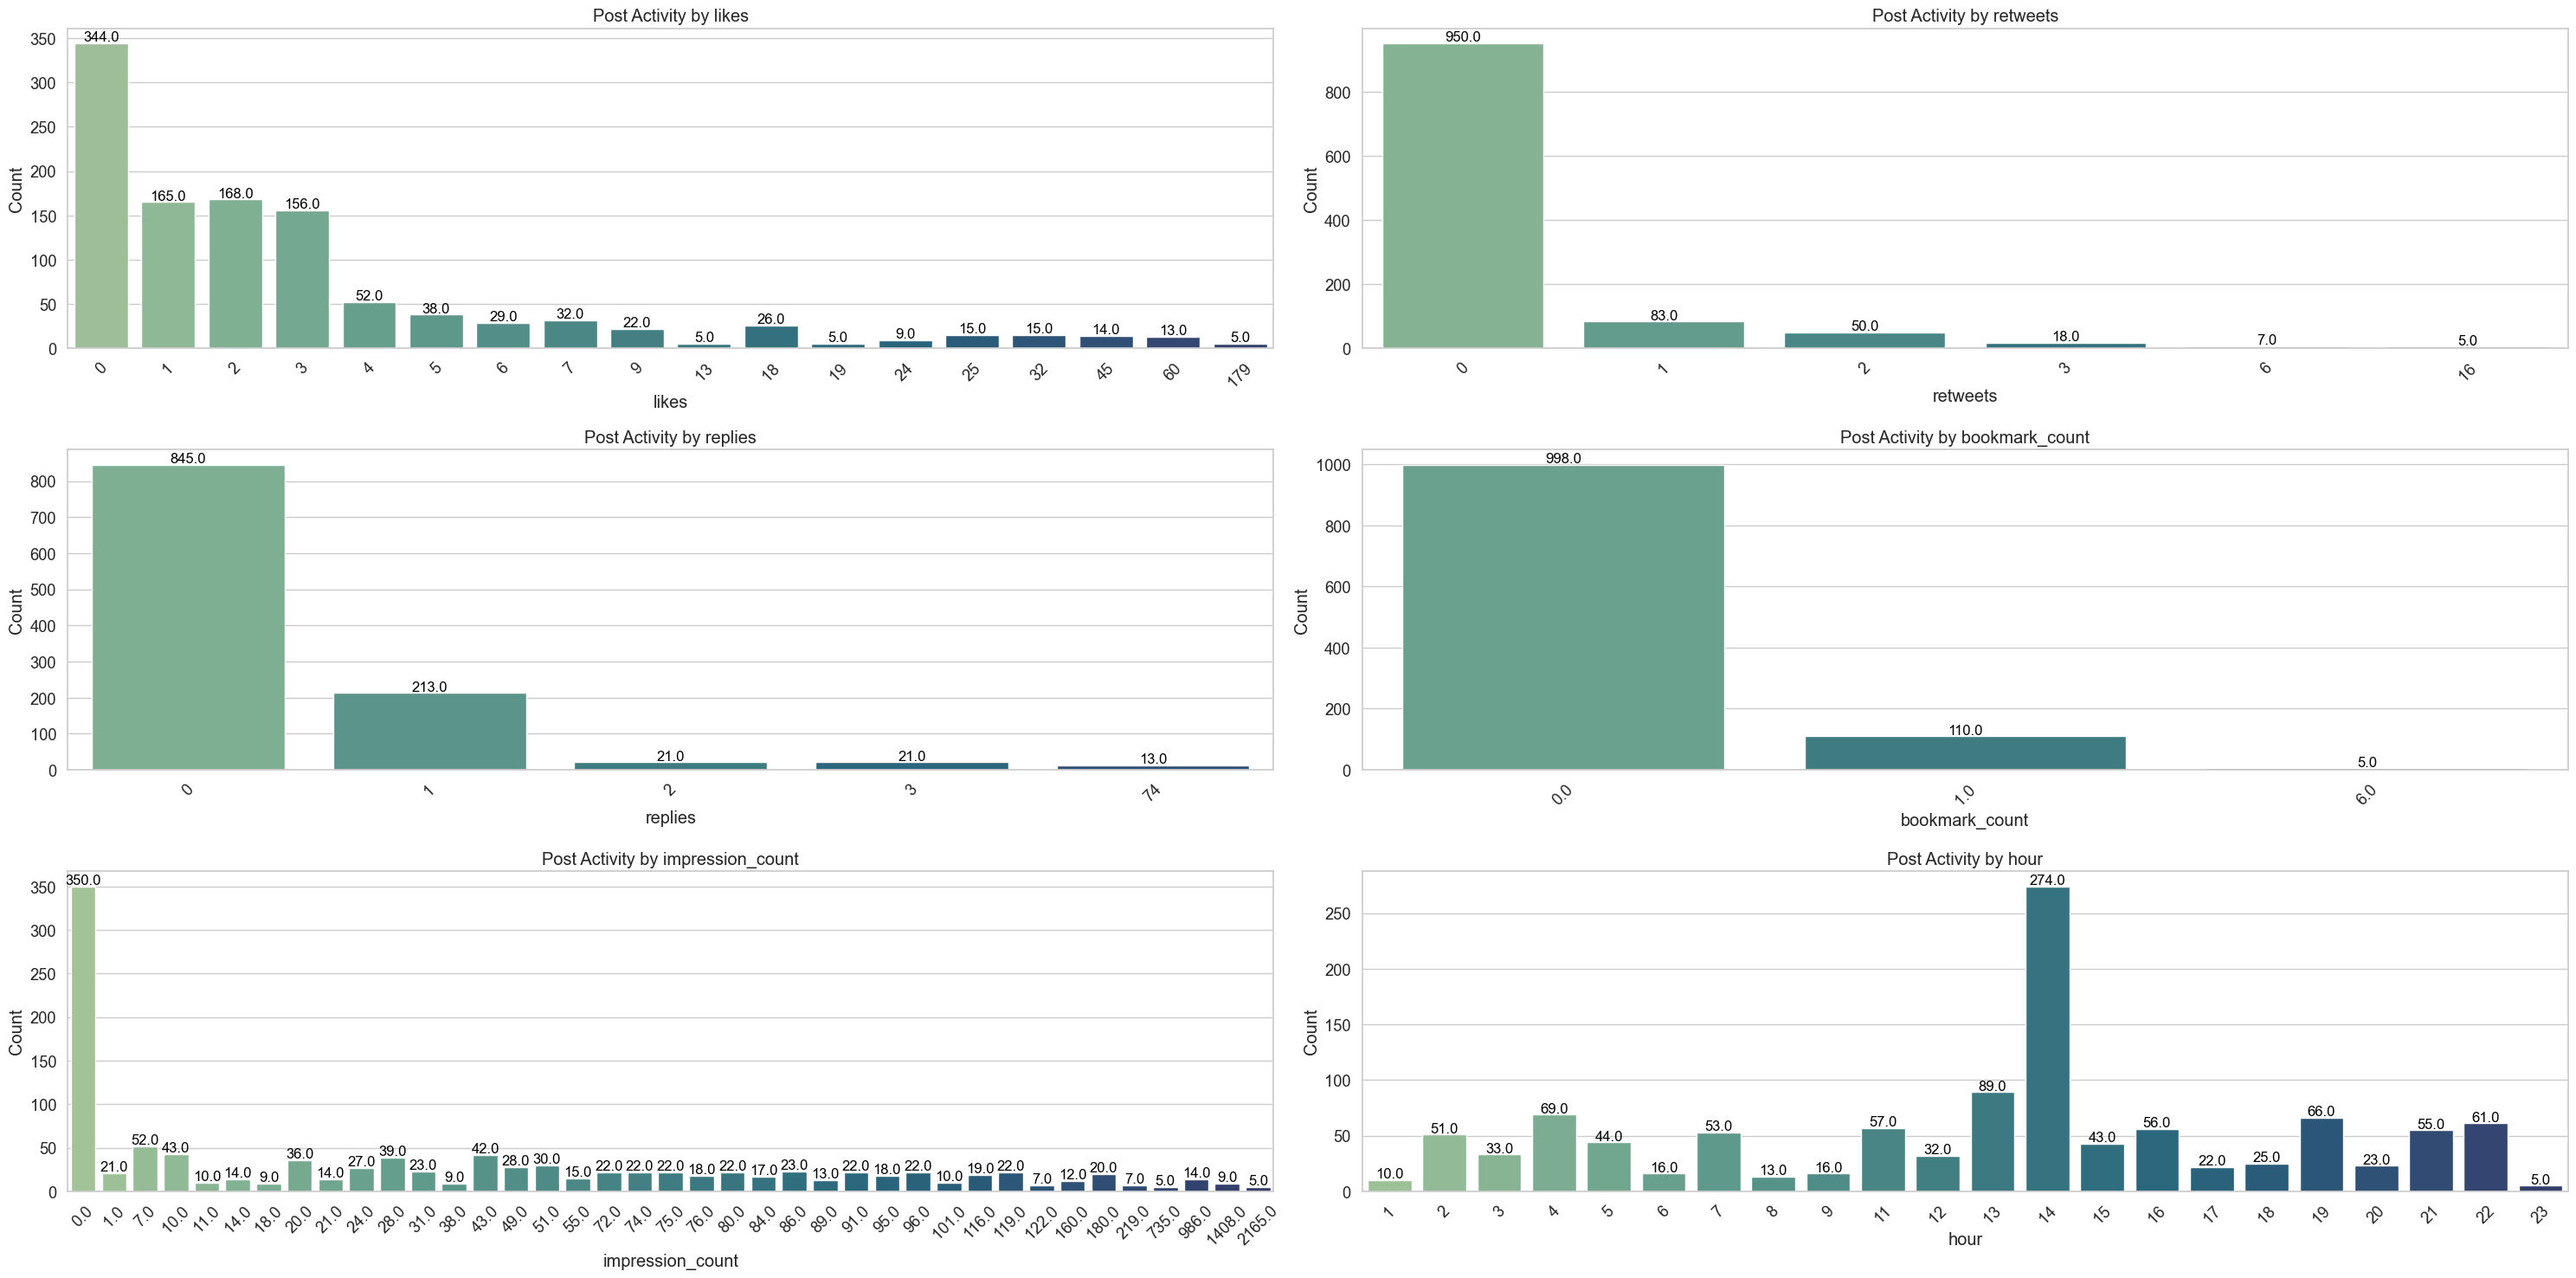

In [48]:

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 15))  # Grid 2x2 untuk 4 kolom

for feature, ax in zip(public_metrics, axes.flatten()):
    sns.countplot(data=df, x=feature, palette='crest', ax=ax)  # Menggunakan 'feature' untuk kolom
    ax.set_title(f'Post Activity by {feature}')  # Menggunakan 'feature' di sini
    ax.set_xlabel(feature)  # Menggunakan 'feature' di sini
    ax.set_ylabel('Count')
    ax.tick_params(axis='x', rotation=45)
    
    # Menambahkan anotasi untuk setiap batang
    for p in ax.patches:  # ax.patches adalah semua batang (bars) yang dibuat oleh countplot
        ax.annotate(f'{p.get_height()}',  # Menampilkan tinggi batang (count)
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi anotasi (tengah atas setiap batang)
                    ha='center', va='center',  # Horizontal alignment: center, Vertical alignment: center
                    fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')  # Menambahkan sedikit offset

plt.tight_layout()
plt.show();

In [49]:
df[df['hour'] == 14].sample(n=5)

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,hashtag,hashtag_first3,hashtag_last3,smartphone,photostyle_first,photostyle_last,phototheme,total_engagement
711,1871200817098715335,WMNS Air Jordan 1 “ Starfish” for the #KOTD. S...,2024-12-23 14:26:54+00:00,47,Brand,Brands and Companies,10026364281,Apple,No description,3,0,0,0,0.0,0.0,2024-12-23 14:26:54+0000,2024-12-23,14,Monday,"[#KOTD, #snkrskickcheck, #yoursneakersaredope,...","[KOTD, snkrskickcheck, yoursneakersaredope]","[PhotographyIsArt, ShotOniPhone, nike]",iPhone,other,sport,sport,3.0
457,1871568818805395839,Rock-Cut #Buddhist panels . An amazing work by...,2024-12-24 14:49:13+00:00,46,Business Taxonomy,Categories within Brand Verticals that narrow ...,1557697333571112960,Technology Business,"Brands, companies, advertisers and every non-p...",3,0,0,0,0.0,80.0,2024-12-24 14:49:13+0000,2024-12-24,14,Tuesday,"[#Buddhist, #Maharashtra, #IncredibleIndia, #S...","[Buddhist, Maharashtra, IncredibleIndia]","[Heritage, Culture, Architecture]",iPhone,other,traveling,traveling,83.0
513,1871567395002671512,Rock-Cut #Buddhist cave Window . An amazing wo...,2024-12-24 14:43:33+00:00,164,Fields of study,"for all fields of study, e.g., futurology, mic...",1278093262406815744,Fields of study,No description,2,0,0,0,0.0,75.0,2024-12-24 14:43:33+0000,2024-12-24,14,Tuesday,"[#Buddhist, #Maharashtra, #IncredibleIndia, #S...","[Buddhist, Maharashtra, IncredibleIndia]","[Heritage, Culture, Architecture]",iPhone,other,traveling,traveling,77.0
418,1871570386720018559,Rock-Cut #Buddhist caves . An amazing work by ...,2024-12-24 14:55:26+00:00,131,Unified Twitter Taxonomy,A taxonomy of user interests.,839544211036749824,Architecture,No description,3,0,0,0,0.0,91.0,2024-12-24 14:55:26+0000,2024-12-24,14,Tuesday,"[#Buddhist, #Maharashtra, #IncredibleIndia, #S...","[Buddhist, Maharashtra, IncredibleIndia]","[Heritage, Culture, Architecture]",iPhone,other,traveling,traveling,94.0
445,1871569893872550370,Rock-Cut #Buddhist Panel . An amazing work by...,2024-12-24 14:53:29+00:00,131,Unified Twitter Taxonomy,A taxonomy of user interests.,1280550787207147521,Arts & culture,No description,7,0,0,0,0.0,96.0,2024-12-24 14:53:29+0000,2024-12-24,14,Tuesday,"[#Buddhist, #Maharashtra, #IncredibleIndia, #S...","[Buddhist, Maharashtra, IncredibleIndia]","[Heritage, Culture, Architecture]",iPhone,other,traveling,traveling,103.0


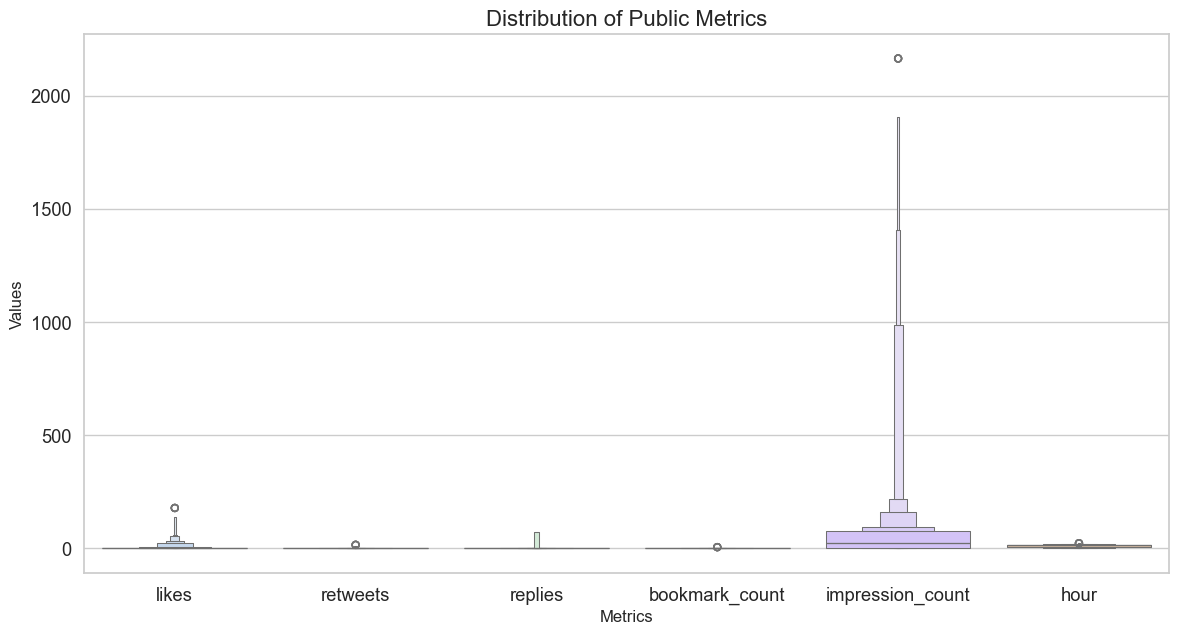

In [50]:
plt.figure(figsize=(14, 7))
sns.boxenplot(data=df[public_metrics], palette='pastel')

# Menambahkan judul dan label
plt.title('Distribution of Public Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Menampilkan plot
plt.show();

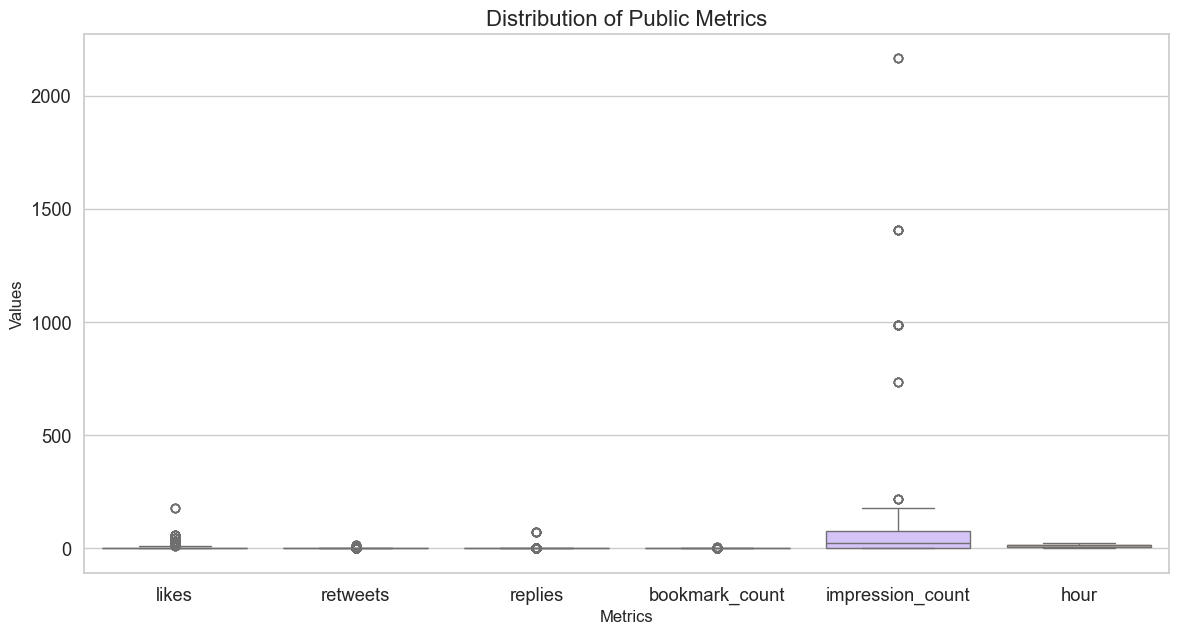

In [51]:
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[public_metrics], palette='pastel')

# Menambahkan judul dan label
plt.title('Distribution of Public Metrics', fontsize=16)
plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Values', fontsize=12)

# Menampilkan plot
plt.show();

In [52]:
df[public_metrics].describe()

,likes,retweets,replies,bookmark_count,impression_count,hour
count,"1,113.0","1,113.0","1,113.0","1,113.0","1,113.0","1,113.0"
mean,5.361185983827493,0.3225516621743037,1.1500449236298294,0.12578616352201258,75.21743036837377,12.683737646001797
std,15.076984795860993,1.2937328017413956,7.945517179729444,0.49492926708035384,222.97209511395403,5.7783299324983455
min,0.0,0.0,0.0,0.0,0.0,1.0
25%,0.0,0.0,0.0,0.0,0.0,8.0
50%,2.0,0.0,0.0,0.0,24.0,14.0
75%,4.0,0.0,0.0,0.0,76.0,16.0
max,179.0,16.0,74.0,6.0,"2,165.0",23.0


In [53]:
df.phototheme.unique()

array(['traveling', 'other', 'event', 'sport', 'portrait', 'wildlife',
       'landscape'], dtype=object)

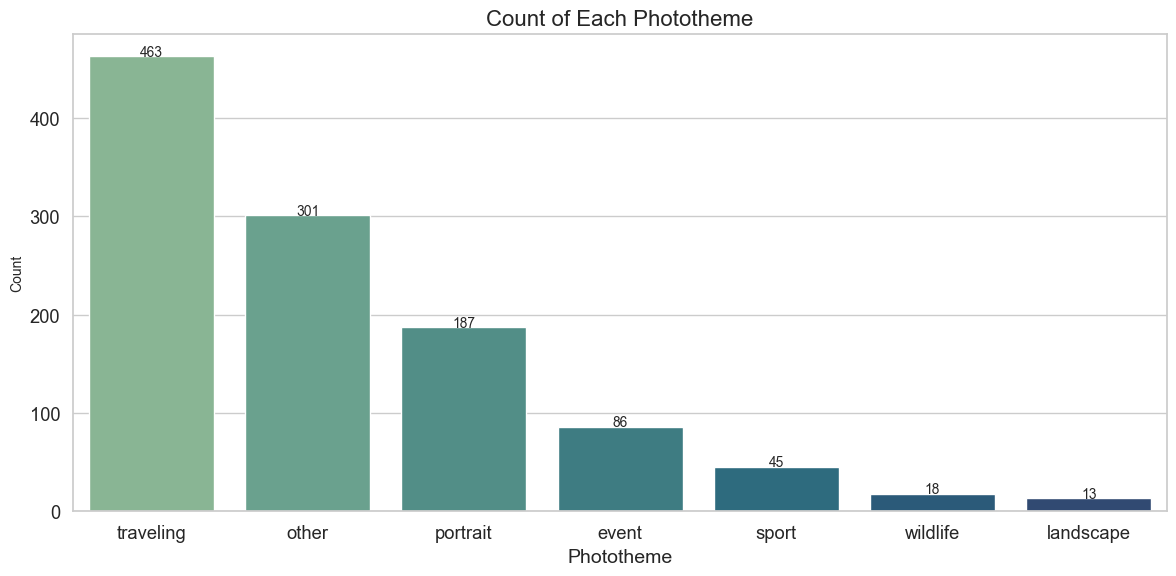

In [54]:
# Hitung jumlah setiap kategori di 'phototheme'
phototheme_count = df['phototheme'].value_counts().reset_index()
phototheme_count.columns = ['phototheme', 'count']  # Ubah nama kolom

# Buat countplot
plt.figure(figsize=(12, 6))
sns.barplot(data=phototheme_count, x='phototheme', y='count', palette='crest')

# Atur judul dan label
plt.title('Count of Each Phototheme', fontsize=16)
plt.xlabel('Phototheme', fontsize=14)
plt.ylabel('Count', fontsize=10)

# Rotasi label x untuk keterbacaan
plt.xticks(rotation=0, ha='center')

# Tambahkan anotasi untuk setiap batang
for i, row in phototheme_count.iterrows():
    plt.text(x=i, y=row['count'] + 0.5, s=row['count'], ha='center', fontsize=10)

# Tampilkan plot
plt.tight_layout()
plt.show();

### Bivariate Analysis

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 0 to 1137
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1113 non-null   int64   
 1   tweet_text          1113 non-null   object  
 2   created_at          1113 non-null   object  
 3   domain_id           1113 non-null   int64   
 4   domain_name         1113 non-null   object  
 5   domain_description  1113 non-null   object  
 6   entity_id           1113 non-null   int64   
 7   entity_name         1113 non-null   object  
 8   entity_description  1113 non-null   object  
 9   likes               1113 non-null   int64   
 10  retweets            1113 non-null   int64   
 11  replies             1113 non-null   int64   
 12  quotes              1113 non-null   int64   
 13  bookmark_count      1113 non-null   float64 
 14  impression_count    1113 non-null   float64 
 15  datetime            1113 non-null   object 

In [56]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [57]:
df.describe()

,tweet_id,domain_id,entity_id,likes,retweets,replies,quotes,bookmark_count,impression_count,date,hour,total_engagement
count,"1,113.0","1,113.0","1,113.0","1,113.0","1,113.0","1,113.0","1,113.0","1,113.0","1,113.0",1113,"1,113.0","1,113.0"
mean,1.871581496954891e+18,85.94070080862534,1.0235344611216576e+18,5.361185983827493,0.3225516621743037,1.1500449236298294,0.013477088948787063,0.12578616352201258,75.21743036837377,2024-12-24 02:28:47.223719680,12.683737646001797,82.19047619047619
min,1.8711159654312717e+18,3.0,"10,000,612,773.0",0.0,0.0,0.0,0.0,0.0,0.0,2024-12-23 00:00:00,1.0,0.0
25%,1.8712008170987154e+18,46.0,8.478697148606054e+17,0.0,0.0,0.0,0.0,0.0,0.0,2024-12-23 00:00:00,8.0,3.0
50%,1.8716249349986307e+18,67.0,1.0465777903534285e+18,2.0,0.0,0.0,0.0,0.0,24.0,2024-12-24 00:00:00,14.0,29.0
75%,1.8717488595019533e+18,131.0,1.291095284756357e+18,4.0,0.0,0.0,0.0,0.0,76.0,2024-12-25 00:00:00,16.0,83.0
max,1.8723477745090685e+18,173.0,1.8535108976348733e+18,179.0,16.0,74.0,1.0,6.0,"2,165.0",2024-12-26 00:00:00,23.0,"2,367.0"
std,"282,498,893,201,030.6",45.16480698282896,4.715677467877166e+17,15.076984795860993,1.2937328017413956,7.945517179729444,0.11535776249779023,0.49492926708035384,222.97209511395403,NaN,5.7783299324983455,235.54681067068


In [58]:
df.head()

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,hashtag,hashtag_first3,hashtag_last3,smartphone,photostyle_first,photostyle_last,phototheme,total_engagement
0,1871824497742959096,Red Eye out of Cape Town.\n\n#travel #travelph...,2024-12-25 07:45:11+00:00,46,Business Taxonomy,Categories within Brand Verticals that narrow ...,1557697333571112960,Technology Business,"Brands, companies, advertisers and every non-p...",0,0,0,0,0.0,1.0,2024-12-25 07:45:11+0000,2024-12-25,7,Wednesday,"[#travel, #travelphotography, #slowshutter, #s...","[travel, travelphotography, slowshutter]","[wanderlust, shotoniphone, Photography]",iPhone,traveling,traveling,traveling,1.0
1,1871824497742959096,Red Eye out of Cape Town.\n\n#travel #travelph...,2024-12-25 07:45:11+00:00,46,Business Taxonomy,Categories within Brand Verticals that narrow ...,1557697439489880065,Travel & Transportation Business,"Brands, companies, advertisers and every non-p...",0,0,0,0,0.0,1.0,2024-12-25 07:45:11+0000,2024-12-25,7,Wednesday,"[#travel, #travelphotography, #slowshutter, #s...","[travel, travelphotography, slowshutter]","[wanderlust, shotoniphone, Photography]",iPhone,traveling,traveling,traveling,1.0
2,1871824497742959096,Red Eye out of Cape Town.\n\n#travel #travelph...,2024-12-25 07:45:11+00:00,30,Entities [Entity Service],"Entity Service top level domain, every item th...",839159814991167489,Travel,Travel,0,0,0,0,0.0,1.0,2024-12-25 07:45:11+0000,2024-12-25,7,Wednesday,"[#travel, #travelphotography, #slowshutter, #s...","[travel, travelphotography, slowshutter]","[wanderlust, shotoniphone, Photography]",iPhone,traveling,traveling,traveling,1.0
3,1871824497742959096,Red Eye out of Cape Town.\n\n#travel #travelph...,2024-12-25 07:45:11+00:00,66,Interests and Hobbies Category,"A grouping of interests and hobbies entities, ...",857603051657482241,Destinations,Destinations,0,0,0,0,0.0,1.0,2024-12-25 07:45:11+0000,2024-12-25,7,Wednesday,"[#travel, #travelphotography, #slowshutter, #s...","[travel, travelphotography, slowshutter]","[wanderlust, shotoniphone, Photography]",iPhone,traveling,traveling,traveling,1.0
4,1871824497742959096,Red Eye out of Cape Town.\n\n#travel #travelph...,2024-12-25 07:45:11+00:00,67,Interests and Hobbies,"Interests, opinions, and behaviors of individu...",847869714860605440,Photography,Photography,0,0,0,0,0.0,1.0,2024-12-25 07:45:11+0000,2024-12-25,7,Wednesday,"[#travel, #travelphotography, #slowshutter, #s...","[travel, travelphotography, slowshutter]","[wanderlust, shotoniphone, Photography]",iPhone,traveling,traveling,traveling,1.0


In [59]:
nums_cols = ['likes', 'retweets', 'replies', 'quotes', 'date','bookmark_count','impression_count','hour']

nums = df[nums_cols].select_dtypes(include=['number'])

In [60]:
nums.head()

,likes,retweets,replies,quotes,bookmark_count,impression_count,hour
0,0,0,0,0,0.0,1.0,7
1,0,0,0,0,0.0,1.0,7
2,0,0,0,0,0.0,1.0,7
3,0,0,0,0,0.0,1.0,7
4,0,0,0,0,0.0,1.0,7


In [61]:
corr_mat = df[['likes', 'retweets', 'replies', 'quotes', 'date','bookmark_count','impression_count','hour']].corr()

In [62]:
corr_mat

,likes,retweets,replies,quotes,date,bookmark_count,impression_count,hour
likes,1.0,0.7356466321719286,0.4122445528789197,0.15231420513930566,-0.1317746506471264,0.6639640443382875,0.7184748435125199,0.0902290386902094
retweets,0.7356466321719286,1.0,0.0036860381691843623,0.15161571281798814,-0.028703798585597254,0.7258818380553695,0.6805806415185146,-0.04997806085287963
replies,0.4122445528789197,0.0036860381691843623,1.0,-0.0022082019233098616,-0.1349443368318177,-0.013722292651956854,-0.0022468001252391088,0.021561817488386172
quotes,0.15231420513930566,0.15161571281798814,-0.0022082019233098616,1.0,-0.1518118404653289,-0.029718670940210638,-0.039446422865299764,-0.03407310680306897
date,-0.1317746506471264,-0.028703798585597254,-0.1349443368318177,-0.1518118404653289,1.0,0.05673189267866604,0.011494254961857723,-0.42479007088098575
bookmark_count,0.6639640443382875,0.7258818380553695,-0.013722292651956854,-0.029718670940210638,0.05673189267866604,1.0,0.5491540377848934,0.0293307421227908
impression_count,0.7184748435125199,0.6805806415185146,-0.0022468001252391088,-0.039446422865299764,0.011494254961857723,0.5491540377848934,1.0,0.18349416962319487
hour,0.0902290386902094,-0.04997806085287963,0.021561817488386172,-0.03407310680306897,-0.42479007088098575,0.0293307421227908,0.18349416962319487,1.0


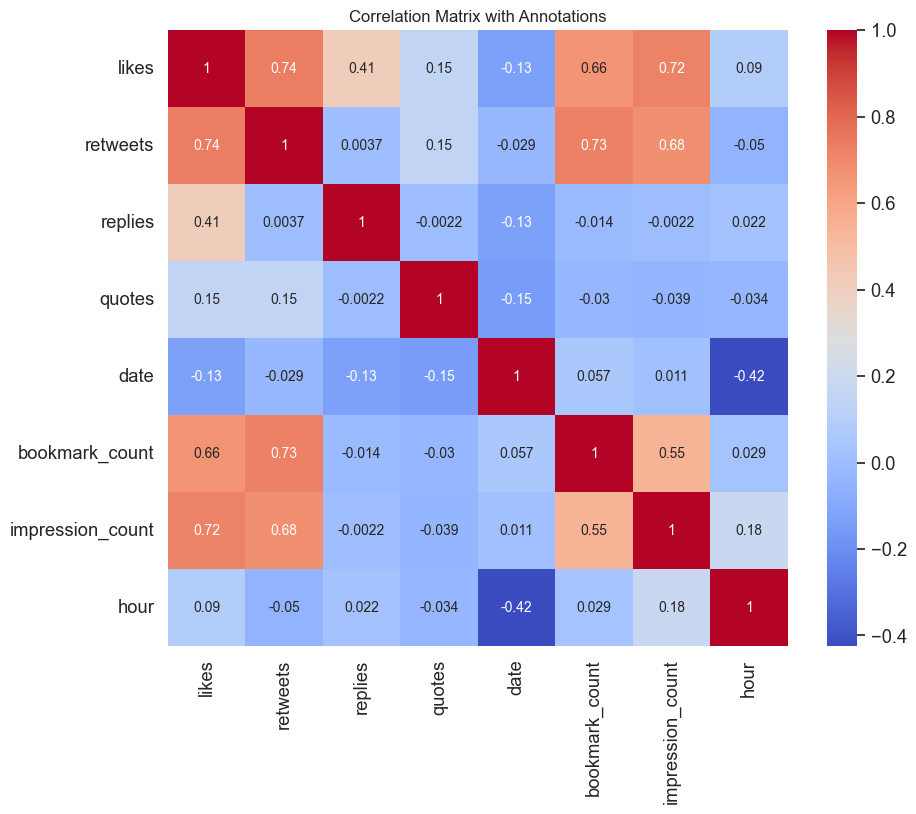

In [63]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_mat, 
    annot=True, 
    cmap='coolwarm', 
    fmt='.2g', 
    annot_kws={"size": 10}  # Mengatur ukuran font anotasi (70% dari default)
)
plt.title('Correlation Matrix with Annotations', fontsize=12)  # Atur ukuran judul jika perlu
plt.show();

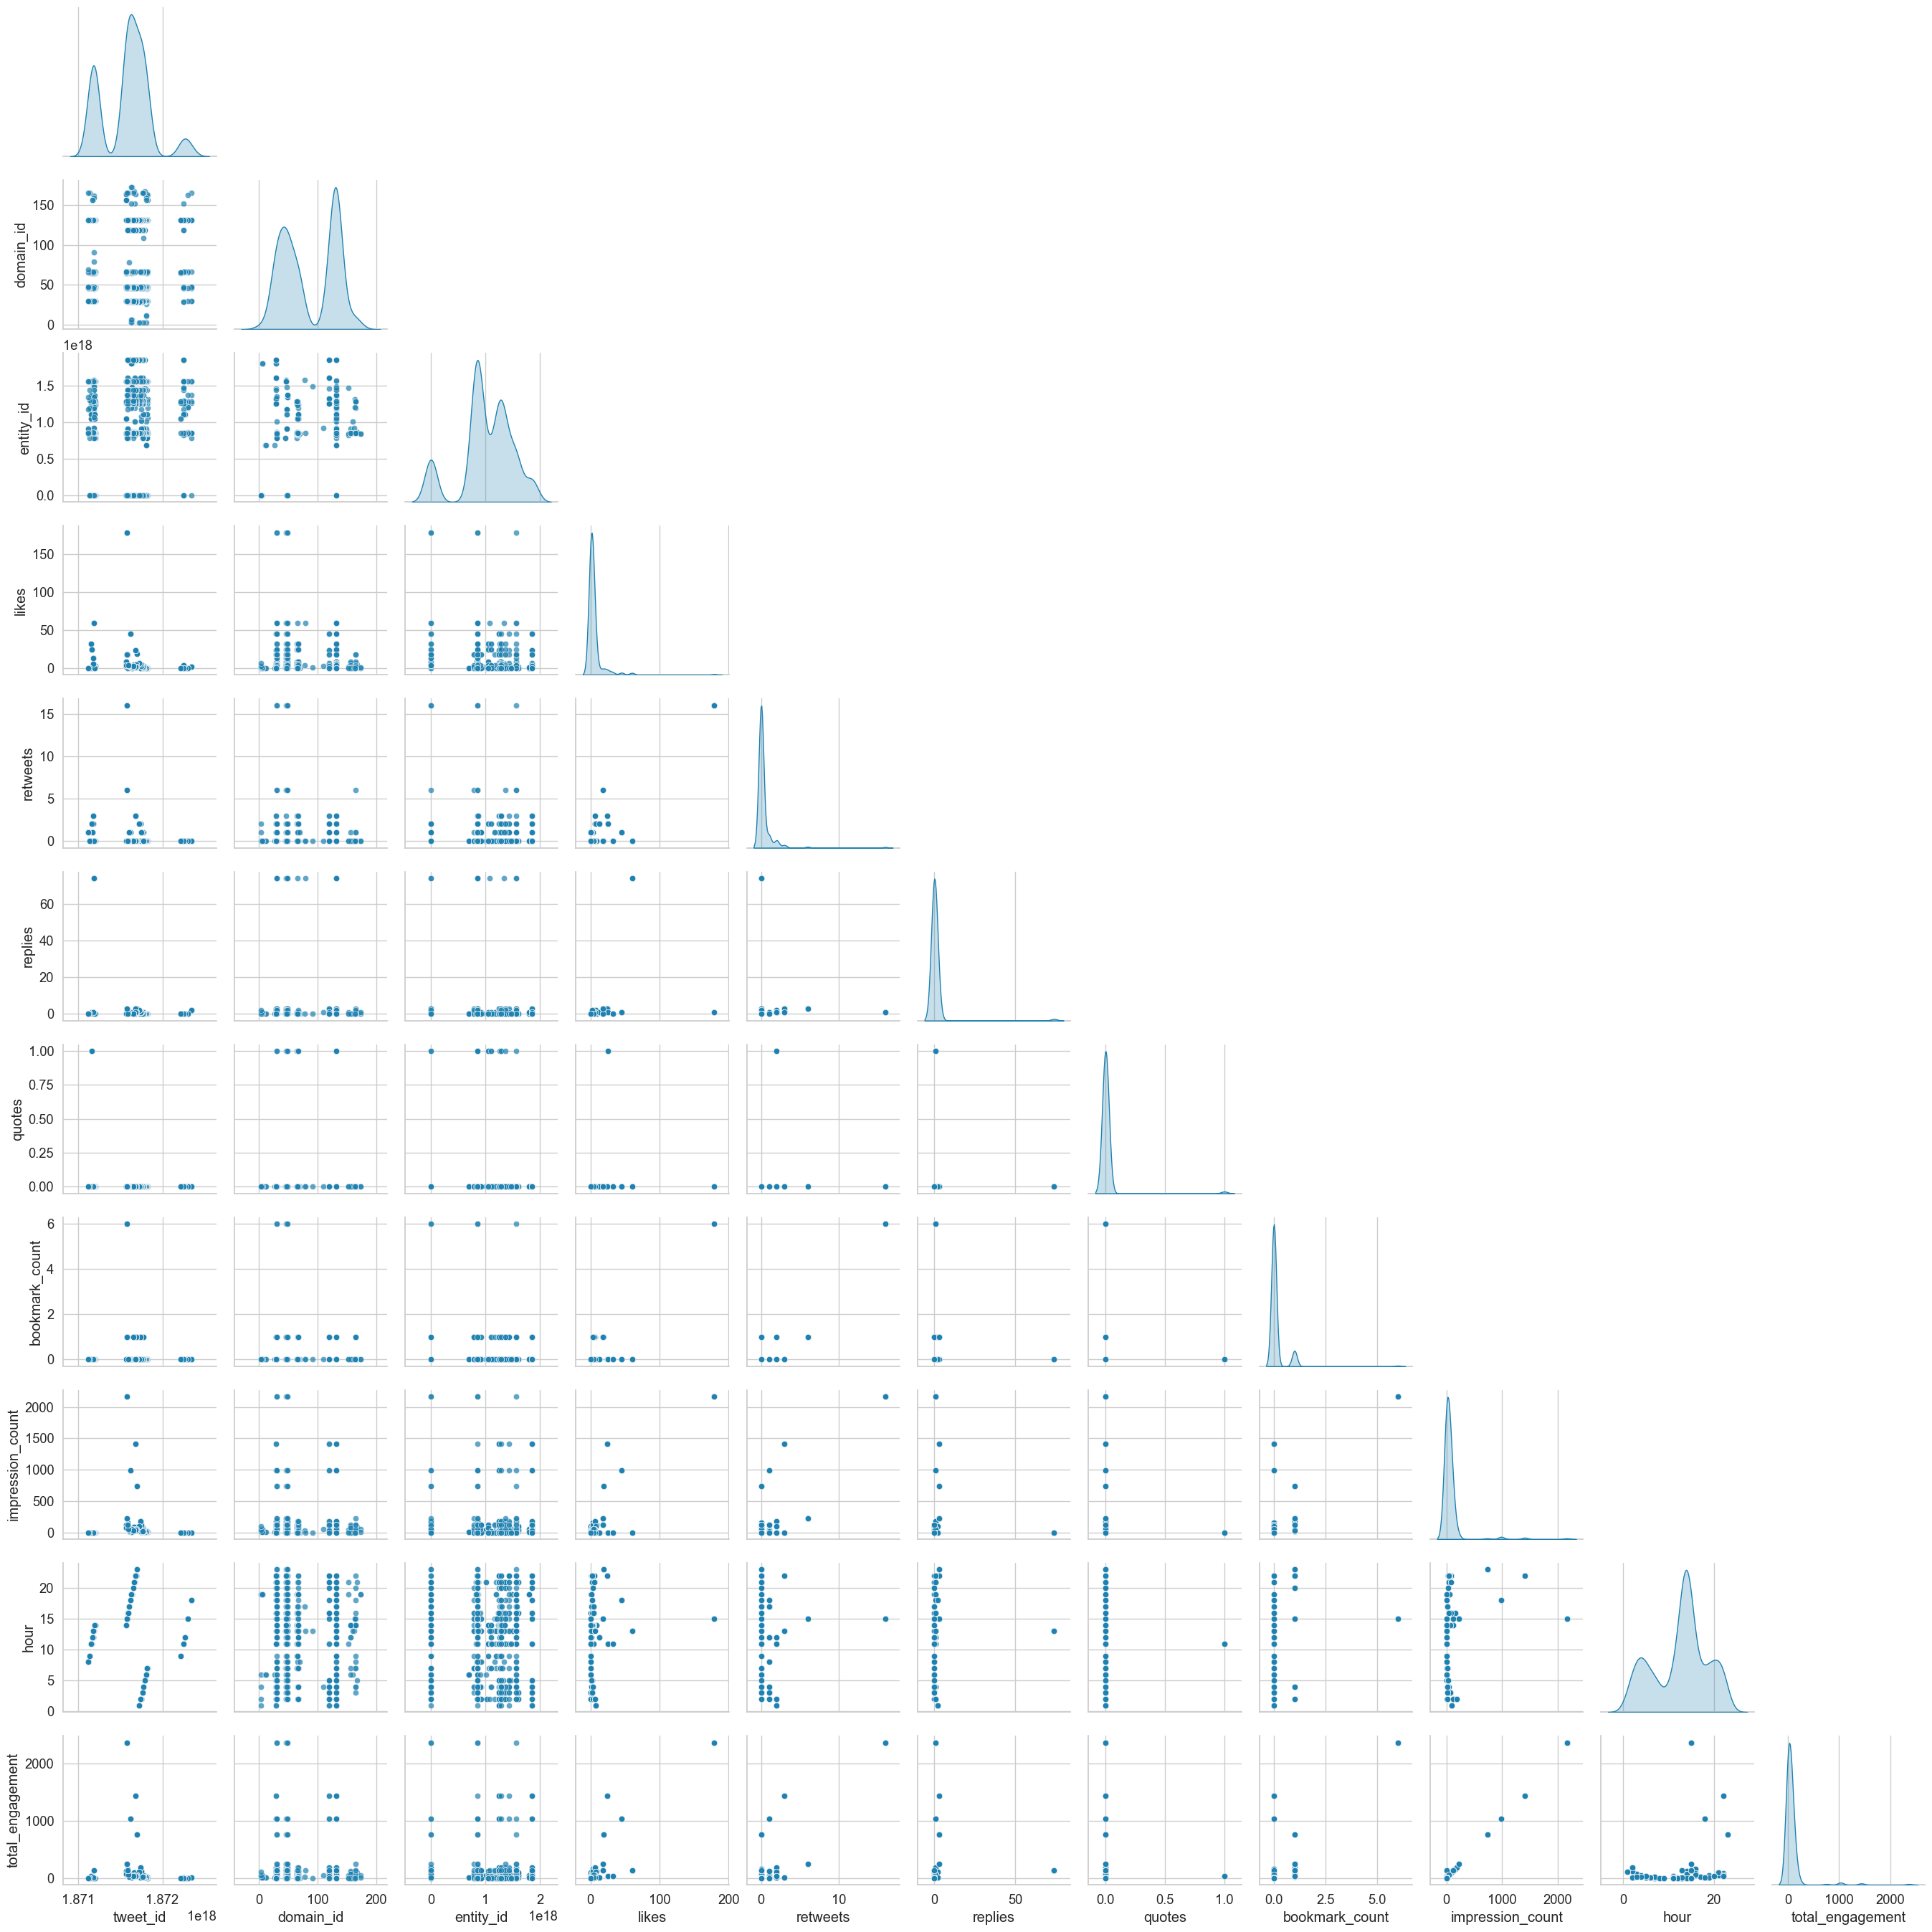

In [64]:
sns.pairplot(df, 
             diag_kind="kde",  # Use Kernel Density Estimation for diagonal plots
             corner=True,      # Only plot the upper triangle of the matrix
             plot_kws={"alpha": 0.7},  # Set alpha for scatter plots
             palette='viridis')  # Use the 'viridis' color palette

plt.show();

### Multivariate Analysis

In [65]:
print(df['replies'].describe())
print(df['replies'].unique())

count              1,113.0
mean    1.1500449236298294
std      7.945517179729444
min                    0.0
25%                    0.0
50%                    0.0
75%                    0.0
max                   74.0
Name: replies, dtype: float64
[ 0  1  3  2 74]


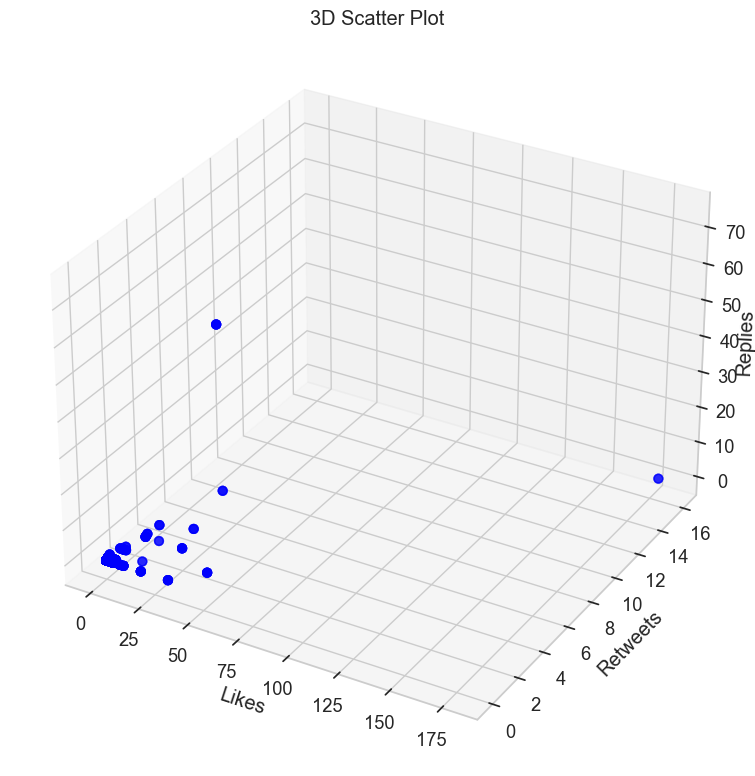

In [66]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['likes'], df['retweets'], df['replies'], c='blue', s=40, alpha=0.3)

# Set labels dengan padding
ax.set_xlabel('Likes', labelpad=5)
ax.set_ylabel('Retweets', labelpad=5)
ax.set_zlabel('Replies', labelpad=-2)

plt.title('3D Scatter Plot')

# Menambahkan tight_layout
plt.tight_layout()
plt.show();

##### Deskripsi Umum:
Sumbu X mewakili jumlah Likes.</br>
Sumbu Y mewakili jumlah Retweets.</br>
Sumbu Z mewakili jumlah Replies.</br>
Titik-titik pada plot menggambarkan kombinasi nilai dari ketiga variabel tersebut untuk setiap data yang diamati.</br>

##### Observasi:
Likes (Sumbu X):</br>

1. Sebagian besar titik memiliki nilai Likes yang rendah, dengan sebagian besar berada di rentang 0–50.
2. Ada beberapa titik dengan nilai Likes yang lebih tinggi mendekati 175.

##### Retweets (Sumbu Y):

1. Nilai Retweets sebagian besar berada di kisaran 0–10, menunjukkan bahwa kebanyakan data memiliki jumlah retweet yang kecil.
2. Ada beberapa titik yang mencapai hingga 14 retweets.

##### Replies (Sumbu Z):

1. Sebagian besar nilai Replies berada di rentang rendah (0–10).
2. Ada beberapa data dengan jumlah Replies mendekati 70, namun titik ini tampaknya jarang terjadi (kemungkinan outlier).

##### Analisis Tambahan:
1. Sebagian besar data terkumpul di dekat asal (0, 0, 0), menunjukkan bahwa mayoritas data memiliki Likes, Retweets, dan Replies dalam jumlah kecil.
2.  Sebuah titik data di pojok kanan atas plot menunjukkan kombinasi nilai Likes yang tinggi dengan jumlah Retweets yang sedang, tetapi Replies rendah.
3. Terdapat indikasi beberapa outlier pada dimensi Replies dengan nilai yang cukup tinggi dibandingkan data lainnya.

##### Insight:
1. Perlu dilakukan analisis tambahan untuk memahami penyebab data dengan nilai Likes, Retweets, atau Replies yang jauh lebih tinggi dari sebagian besar data lainnya.
2. Data ini mungkin menunjukkan distribusi tidak merata, di mana sebagian besar aktivitas sosial media terjadi pada tingkat Likes, Retweets, dan Replies yang rendah.

In [67]:
df.sample()

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,hashtag,hashtag_first3,hashtag_last3,smartphone,photostyle_first,photostyle_last,phototheme,total_engagement
976,1871133606888010075,Upgrade your smartphone experience today!\n Yo...,2024-12-23 09:59:50+00:00,131,Unified Twitter Taxonomy,A taxonomy of user interests.,10029382357,YouTube,No description,0,0,0,0,0.0,0.0,2024-12-23 09:59:50+0000,2024-12-23,9,Monday,"[#iPhoneA20Pro, #TechInnovation, #AppleLovers,...","[iPhoneA20Pro, TechInnovation, AppleLovers]","[AppleProSeries, NextGenTech, iOS18]",iPhone,other,other,other,0.0


#### Analysis of Hours, Impression Count, Likes & Retweet on Working Day

In [68]:
df.day_name.unique()

['Wednesday', 'Tuesday', 'Monday', 'Thursday']
Categories (4, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday']

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 0 to 1137
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1113 non-null   int64         
 1   tweet_text          1113 non-null   object        
 2   created_at          1113 non-null   object        
 3   domain_id           1113 non-null   int64         
 4   domain_name         1113 non-null   object        
 5   domain_description  1113 non-null   object        
 6   entity_id           1113 non-null   int64         
 7   entity_name         1113 non-null   object        
 8   entity_description  1113 non-null   object        
 9   likes               1113 non-null   int64         
 10  retweets            1113 non-null   int64         
 11  replies             1113 non-null   int64         
 12  quotes              1113 non-null   int64         
 13  bookmark_count      1113 non-null   float64       
 1

#### a. Likes

In [70]:
# Mengelompokkan berdasarkan 'hour' dan menghitung jumlah total likes
df_likes = df.groupby('hour').agg(
    total_likes=('likes', 'sum')  # Menjumlahkan semua impression untuk setiap jam
).reset_index()

# Menghitung rata-rata total_imp
df_likes_mean = df_likes['total_likes'].mean()

# Memfilter jam dengan total_imp lebih besar dari rata-rata
likes_hours = df_likes[df_likes['total_likes'] > df_likes_mean]

# Mengurutkan hasil berdasarkan total_imp secara descending
likes_hours_top = likes_hours.sort_values('total_likes', ascending=False).reset_index(drop=True)

# Menampilkan hasil
likes_hours_top


,hour,total_likes
0,15,1363
1,11,907
2,13,883
3,14,730
4,18,652
5,22,352


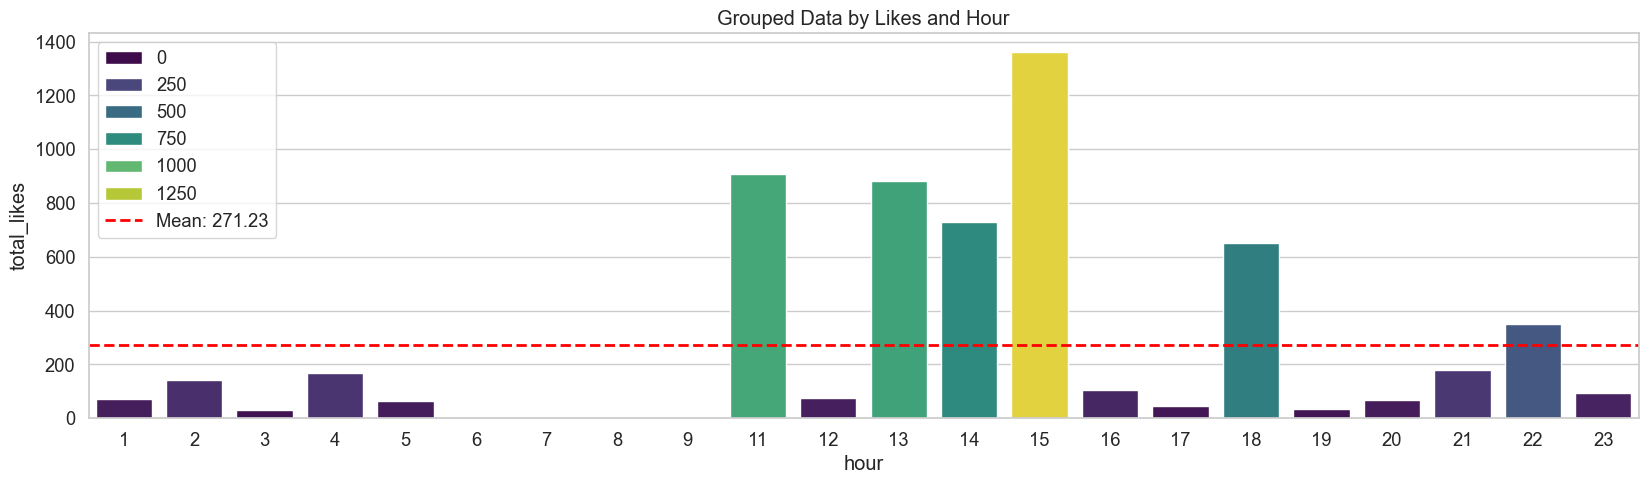

In [71]:
plt.figure(figsize=(20, 5))

# Barplot
sns.barplot(data=df_likes, x='hour', y='total_likes', hue='total_likes', palette='viridis')

# Menghitung rata-rata total_imp
mean_likes = df_likes['total_likes'].mean()

# Menambahkan garis rata-rata
plt.axhline(mean_likes, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_likes:.2f}')

# Menambahkan judul dan legenda
plt.title('Grouped Data by Likes and Hour')
plt.legend(loc='upper left')

# Menampilkan plot
plt.show();

#### b. Retweet

In [72]:
df_rt = df.groupby('hour').agg(
    total_retweets=('retweets', 'sum'),   # Menjumlahkan semua likes untuk jam yang sama
).reset_index()

df_rt_mean = df_rt.total_retweets.mean()

rt_hours = df_rt[df_rt['total_retweets'] > df_rt_mean].sort_values('total_retweets', ascending=False).reset_index(drop=True)
rt_hours

,hour,total_retweets
0,15,122
1,2,47
2,11,30
3,22,27
4,13,27
5,1,20
6,12,20


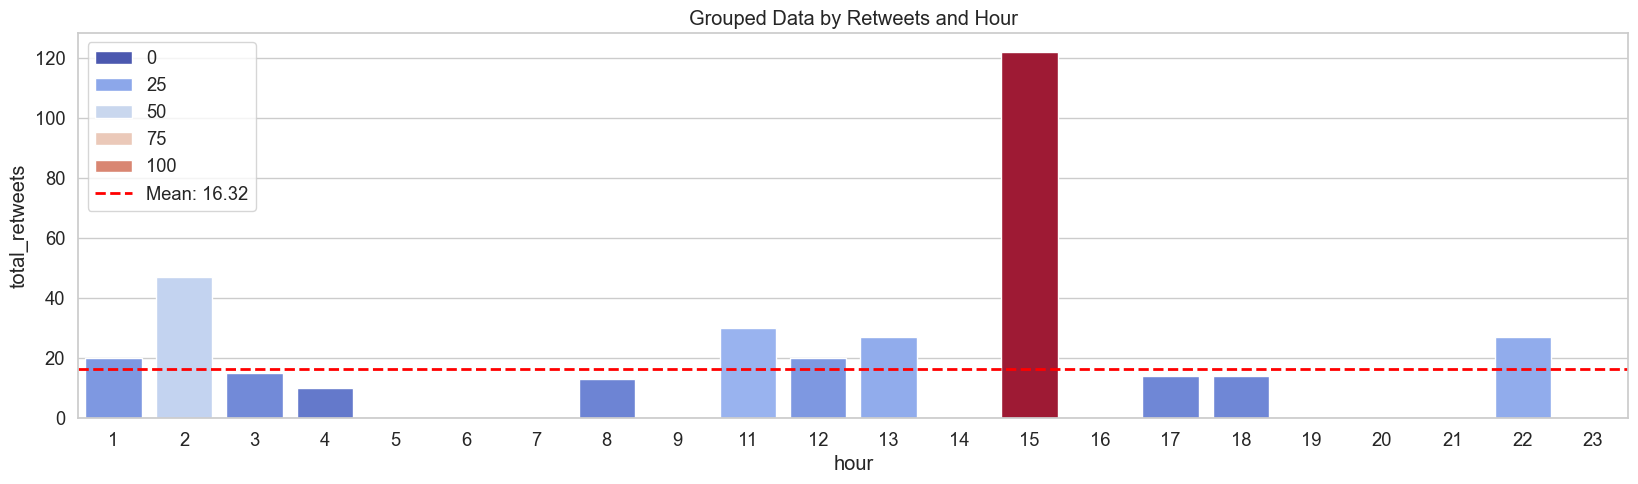

In [73]:
plt.figure(figsize=(20, 5))
sns.barplot(data=df_rt, x='hour', y='total_retweets', hue='total_retweets', palette='coolwarm')
plt.axhline(df_rt_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {df_rt_mean:.2f}')
plt.title('Grouped Data by Retweets and Hour')
plt.legend(loc='upper left')

plt.show();

#### c. Impression Count

In [74]:
aggregated_imp = df.groupby('hour').agg(
    total_imp=('impression_count', 'sum'),   # Menjumlahkan semua likes untuk jam yang sama
).reset_index()

total_imp_mean = aggregated_imp.total_imp.mean()
aggregated_imp.sort_values('total_imp', ascending=False).reset_index(drop=True).head(6)

,hour,total_imp
0,22,"15,416.0"
1,15,"14,562.0"
2,18,"13,804.0"
3,14,"13,354.0"
4,16,"5,499.0"
5,2,"4,760.0"


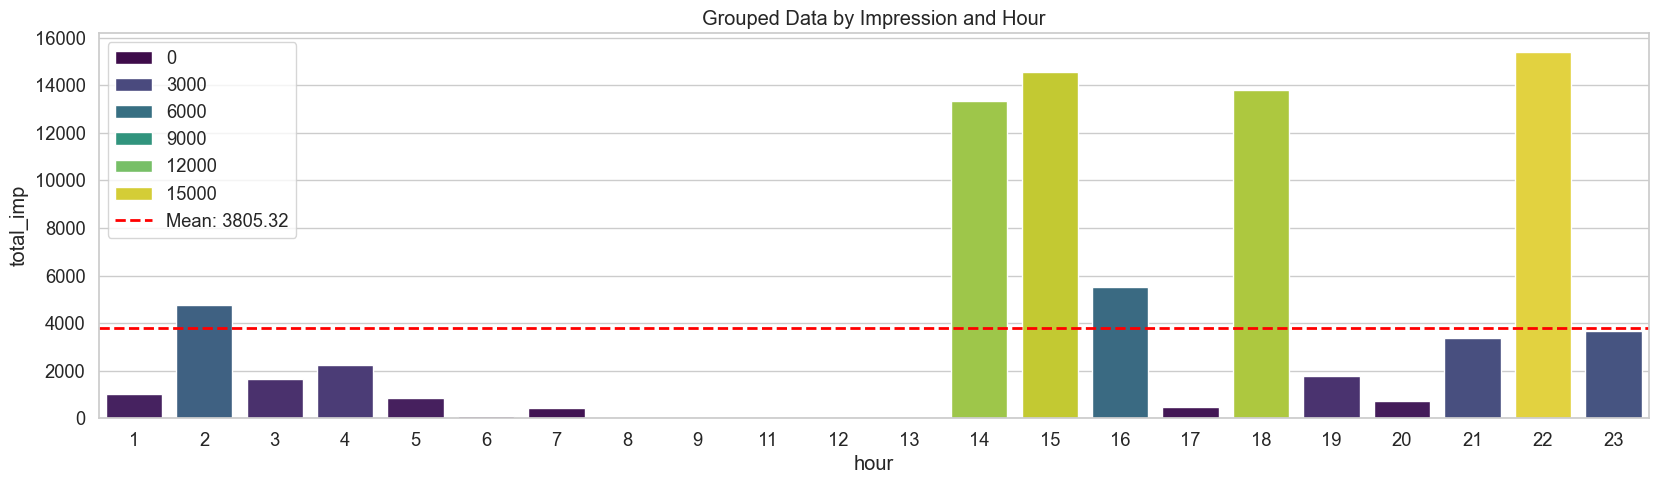

In [75]:
plt.figure(figsize=(20, 5))

sns.barplot(data=aggregated_imp, x='hour', y='total_imp', hue='total_imp', palette='viridis')

mean_imp = aggregated_imp['total_imp'].mean()
plt.axhline(mean_imp, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_imp:.2f}')
plt.title('Grouped Data by Impression and Hour')
plt.legend(loc='upper left')
plt.show();

#### d. Smartphone Engagement Effects on Content

In [76]:
df.sample()

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,hashtag,hashtag_first3,hashtag_last3,smartphone,photostyle_first,photostyle_last,phototheme,total_engagement
25,1871820184866226684,The best flying above the rest . \n@qatarairwa...,2024-12-25 07:28:03+00:00,46,Business Taxonomy,Categories within Brand Verticals that narrow ...,1557696848252391426,Financial Services Business,"Brands, companies, advertisers and every non-p...",0,0,0,0,0.0,10.0,2024-12-25 07:28:03+0000,2024-12-25,7,Wednesday,"[#worldsbest, #777, #shotoniphone, #appleiphon...","[worldsbest, 777, shotoniphone]","[777, shotoniphone, appleiphone15pro]",iPhone,other,other,other,10.0


In [77]:
sphone      = df.groupby('smartphone')['total_engagement'].size().reset_index()
sphone_mean = sphone['total_engagement'].mean()

sphone
sphone_mean

,smartphone,total_engagement
0,Android,401
1,iPhone,712


np.float64(556.5)

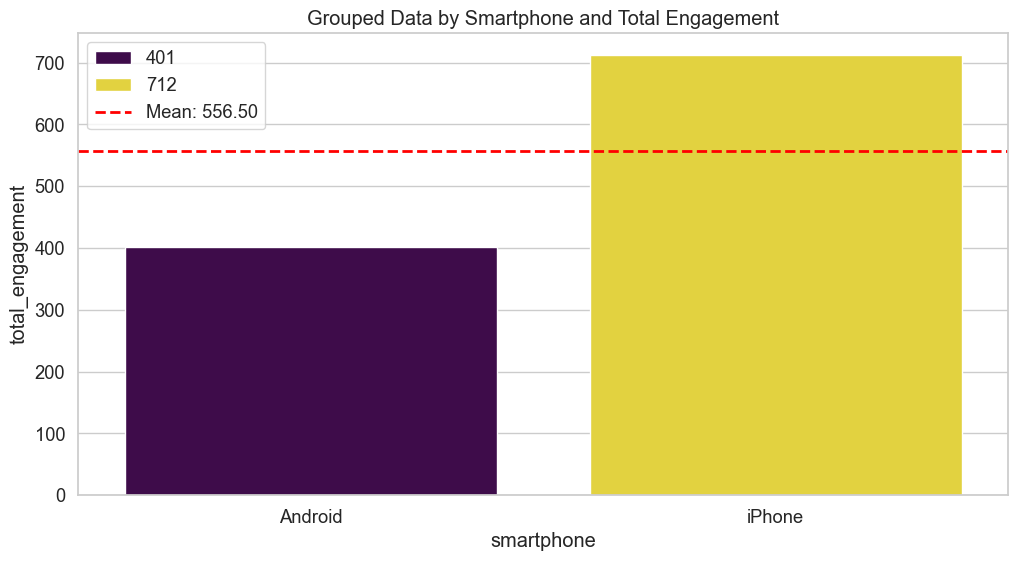

In [78]:
plt.figure(figsize=(12, 6))

sns.barplot(data=sphone, x='smartphone', y='total_engagement', hue='total_engagement', palette='viridis')

plt.axhline(sphone_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {sphone_mean:.2f}')
plt.title('Grouped Data by Smartphone and Total Engagement')
plt.legend(loc='upper left')
plt.show();

#### Filter by Best Hours : 14.00,15.00,18.00 & 22.00
finding users mobilephotography behaviours by top likes, retweet & impressions

In [79]:
df.shape[0]

1113

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 0 to 1137
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1113 non-null   int64         
 1   tweet_text          1113 non-null   object        
 2   created_at          1113 non-null   object        
 3   domain_id           1113 non-null   int64         
 4   domain_name         1113 non-null   object        
 5   domain_description  1113 non-null   object        
 6   entity_id           1113 non-null   int64         
 7   entity_name         1113 non-null   object        
 8   entity_description  1113 non-null   object        
 9   likes               1113 non-null   int64         
 10  retweets            1113 non-null   int64         
 11  replies             1113 non-null   int64         
 12  quotes              1113 non-null   int64         
 13  bookmark_count      1113 non-null   float64       
 1

In [81]:
df_fil = df[df['hour'].isin([11,13,14,15,18,22])]

In [82]:
df_fil.sample()

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,hashtag,hashtag_first3,hashtag_last3,smartphone,photostyle_first,photostyle_last,phototheme,total_engagement
461,1871568818805395839,Rock-Cut #Buddhist panels . An amazing work by...,2024-12-24 14:49:13+00:00,67,Interests and Hobbies,"Interests, opinions, and behaviors of individu...",847869714860605440,Photography,Photography,3,0,0,0,0.0,80.0,2024-12-24 14:49:13+0000,2024-12-24,14,Tuesday,"[#Buddhist, #Maharashtra, #IncredibleIndia, #S...","[Buddhist, Maharashtra, IncredibleIndia]","[Heritage, Culture, Architecture]",iPhone,other,traveling,traveling,83.0


In [83]:
df_fil_ct = df_fil['phototheme'].value_counts().reset_index()
df_fil_ct

,phototheme,count
0,traveling,232
1,portrait,143
2,other,123
3,sport,20
4,wildlife,18
5,landscape,13


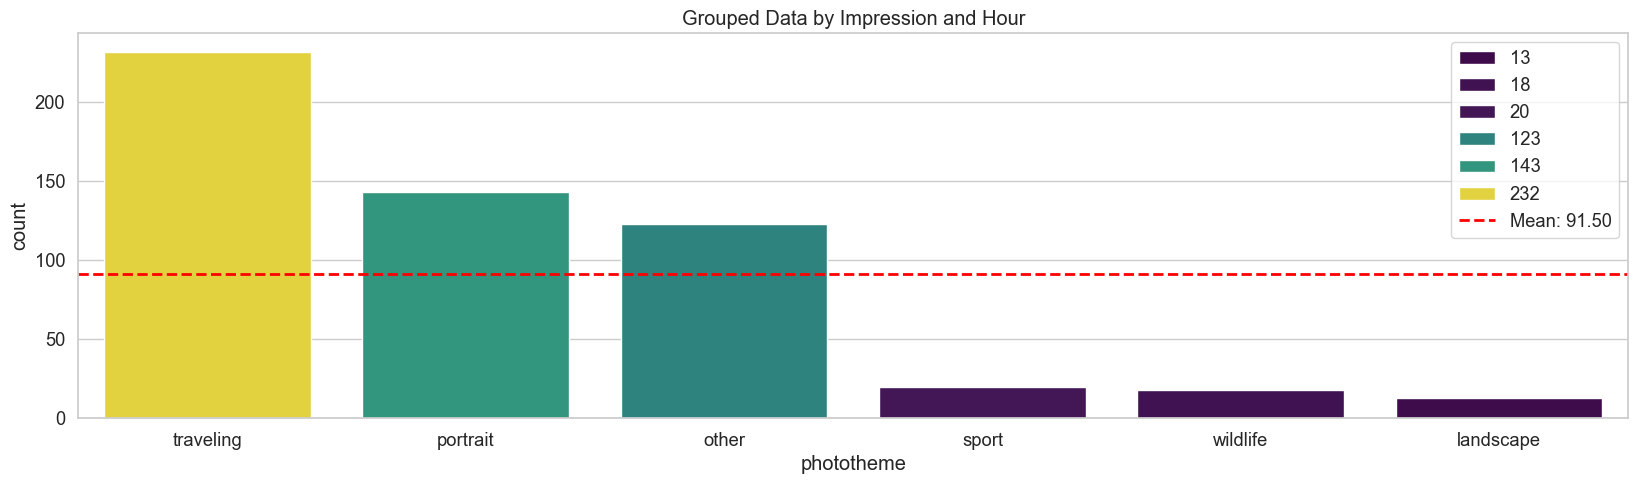

In [84]:
plt.figure(figsize=(20, 5))

sns.barplot(data=df_fil_ct, x='phototheme', y='count', hue='count', palette='viridis')

mean_fil_ct = df_fil_ct['count'].mean()
plt.axhline(mean_fil_ct, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_fil_ct:.2f}')
plt.title('Grouped Data by Impression and Hour')
plt.legend(loc='upper right')
plt.show();

In [85]:
df.loc[df['phototheme'] == 'other',['hashtag','hashtag_first3','hashtag_last3']].sample(n=5, random_state=42)

,hashtag,hashtag_first3,hashtag_last3
952,"[#Xiaomi13Ultra, #MobilePhotography, #TechInno...","[Xiaomi13Ultra, MobilePhotography, TechInnovat...","[Xiaomi13Ultra, MobilePhotography, TechInnovat..."
1126,"[#SHOTONTECNO, #HOILAKES366DAYS, #HOILAKES, #S...","[SHOTONTECNO, HOILAKES366DAYS, HOILAKES]","[November2024, Ghana, perspective]"
1051,"[#ShotOnOPPO, #ShotOnSnapdragon, #TimeToCelebr...","[ShotOnOPPO, ShotOnSnapdragon, TimeToCelebrate]","[ShotOnOPPO, ShotOnSnapdragon, TimeToCelebrate]"
973,"[#iPhoneA20Pro, #TechInnovation, #AppleLovers,...","[iPhoneA20Pro, TechInnovation, AppleLovers]","[AppleProSeries, NextGenTech, iOS18]"
167,"[#NECA, #NECAFanFoto, #Gremlins, #Ultimate, #G...","[NECA, NECAFanFoto, Gremlins]","[games, photooftheday, shotoniphone]"


#### Analysis of Engagement on Phototheme

In [86]:
df_eng = df.groupby('phototheme')['total_engagement'].sum().to_frame().sort_values('total_engagement', ascending=False).reset_index()
df_eng

,phototheme,total_engagement
0,other,"42,633.0"
1,traveling,"27,169.0"
2,portrait,"16,015.0"
3,event,"3,902.0"
4,sport,"1,746.0"
5,landscape,13.0
6,wildlife,0.0


In [87]:
df_eng['total_engagement'].sum()

np.float64(91478.0)

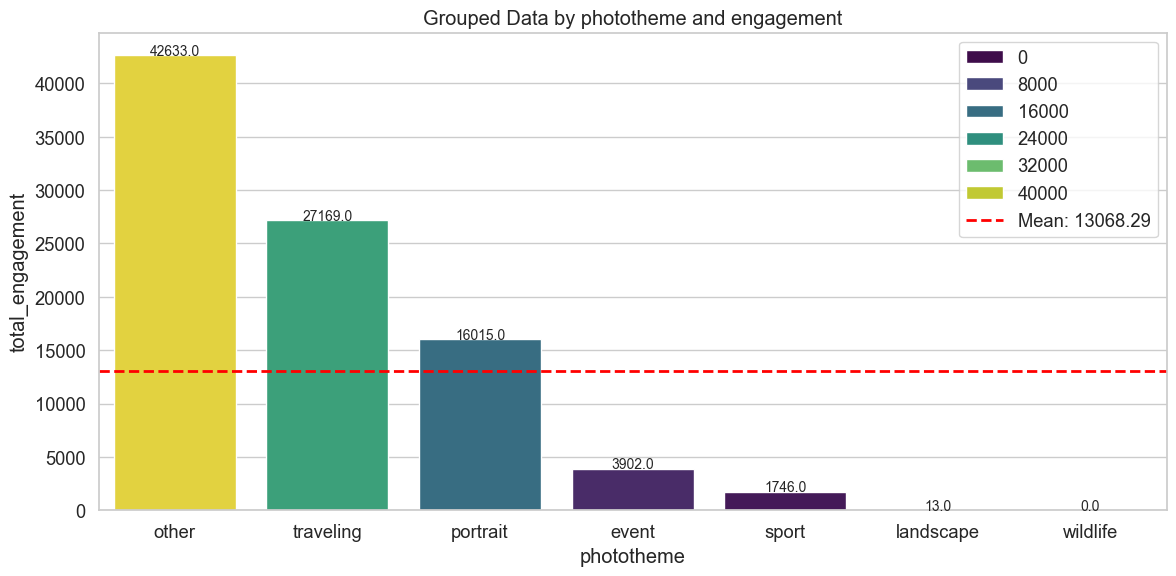

In [88]:
plt.figure(figsize=(12, 6))

sns.barplot(data=df_eng, x='phototheme', y='total_engagement', hue='total_engagement', palette='viridis')

df_eng_mean = df_eng['total_engagement'].mean()
plt.axhline(df_eng_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {df_eng_mean:.2f}')
plt.title('Grouped Data by phototheme and engagement')
plt.legend(loc='upper right')

# Add annotations for each bar
for i, row in df_eng.iterrows():
    plt.text(x=i, y=row['total_engagement'] + 0.5, s=row['total_engagement'], ha='center', fontsize=10)

plt.tight_layout()
plt.show();

In [89]:
df.columns

Index(['tweet_id', 'tweet_text', 'created_at', 'domain_id', 'domain_name',
       'domain_description', 'entity_id', 'entity_name', 'entity_description',
       'likes', 'retweets', 'replies', 'quotes', 'bookmark_count',
       'impression_count', 'datetime', 'date', 'hour', 'day_name', 'hashtag',
       'hashtag_first3', 'hashtag_last3', 'smartphone', 'photostyle_first',
       'photostyle_last', 'phototheme', 'total_engagement'],
      dtype='object')

#### Analysis on Day, Smartphone & Total Engagement

In [90]:
smartphone_content = df.groupby(['day_name','smartphone'])['tweet_id'].size().reset_index(name='total_content')
smartphone_content

,day_name,smartphone,total_content
0,Monday,Android,130
1,Monday,iPhone,157
2,Tuesday,Android,106
3,Tuesday,iPhone,381
4,Wednesday,Android,102
5,Wednesday,iPhone,174
6,Thursday,Android,63
7,Thursday,iPhone,0


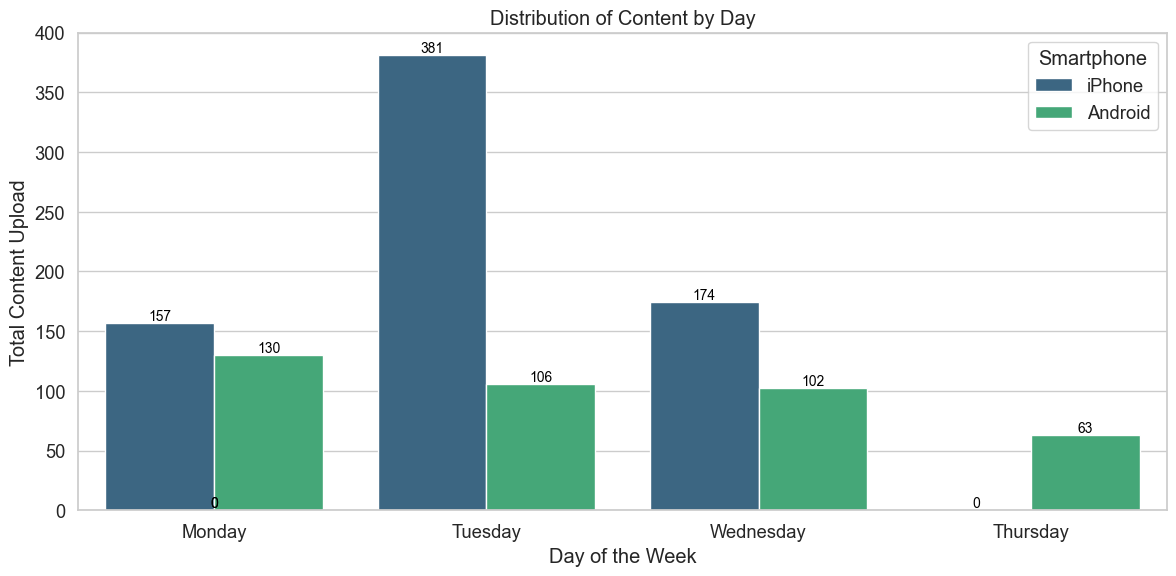

In [91]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=smartphone_content, 
                 x='day_name', 
                 y='total_content', 
                 hue='smartphone',
                 hue_order=['iPhone', 'Android'],
                 palette='viridis')

plt.title('Distribution of Content by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Content Upload')
plt.legend(title='Smartphone', loc='upper right')

# Menambahkan anotasi untuk setiap batang
for p in ax.patches:  # Mendapatkan semua batang (bars) dalam barplot
    ax.annotate(f'{p.get_height():.0f}',  # Menampilkan tinggi batang (nilai total_engagement)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi anotasi (tengah atas setiap batang)
                ha='center', va='center',  # Horizontal alignment: center, Vertical alignment: center
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')  # Menambahkan sedikit offset

plt.xticks(rotation=0)  # Memiringkan label pada sumbu x untuk keterbacaan
plt.tight_layout()  # Menyesuaikan tata letak agar tidak terpotong
plt.show();

In [92]:
smartphone_eng = df.groupby(['day_name','smartphone'])['total_engagement'].sum().reset_index()
smartphone_eng

,day_name,smartphone,total_engagement
0,Monday,Android,"1,845.0"
1,Monday,iPhone,"1,134.0"
2,Tuesday,Android,"20,291.0"
3,Tuesday,iPhone,"56,367.0"
4,Wednesday,Android,"7,603.0"
5,Wednesday,iPhone,"4,142.0"
6,Thursday,Android,96.0
7,Thursday,iPhone,0.0


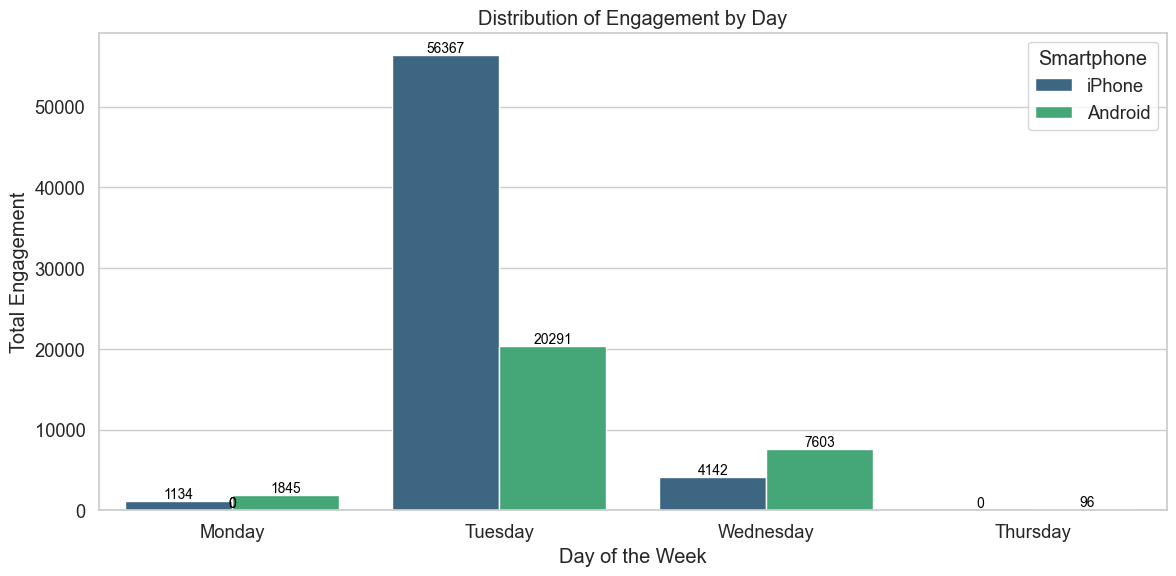

In [93]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=smartphone_eng, 
                 x='day_name', 
                 y='total_engagement', 
                 hue='smartphone',
                 hue_order=['iPhone', 'Android'],
                 palette='viridis')

plt.title('Distribution of Engagement by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Engagement')
plt.legend(title='Smartphone', loc='upper right')

# Menambahkan anotasi untuk setiap batang
for p in ax.patches:  # Mendapatkan semua batang (bars) dalam barplot
    ax.annotate(f'{p.get_height():.0f}',  # Menampilkan tinggi batang (nilai total_engagement)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi anotasi (tengah atas setiap batang)
                ha='center', va='center',  # Horizontal alignment: center, Vertical alignment: center
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')  # Menambahkan sedikit offset

plt.xticks(rotation=0)  # Memiringkan label pada sumbu x untuk keterbacaan
plt.tight_layout()  # Menyesuaikan tata letak agar tidak terpotong
plt.show();

##### Content to Engagement Ratio

In [94]:
eng_ratio = pd.merge(smartphone_eng,smartphone_content,on=['day_name','smartphone'], how='inner')
eng_ratio['scale'] =  (eng_ratio['total_engagement']/ (eng_ratio['total_content'] ) *100).round(2)
eng_ratio['scale'].fillna(0, inplace=True)
eng_ratio

,day_name,smartphone,total_engagement,total_content,scale
0,Monday,Android,"1,845.0",130,"1,419.23"
1,Monday,iPhone,"1,134.0",157,722.29
2,Tuesday,Android,"20,291.0",106,"19,142.45"
3,Tuesday,iPhone,"56,367.0",381,"14,794.49"
4,Wednesday,Android,"7,603.0",102,"7,453.92"
5,Wednesday,iPhone,"4,142.0",174,"2,380.46"
6,Thursday,Android,96.0,63,152.38
7,Thursday,iPhone,0.0,0,0.0


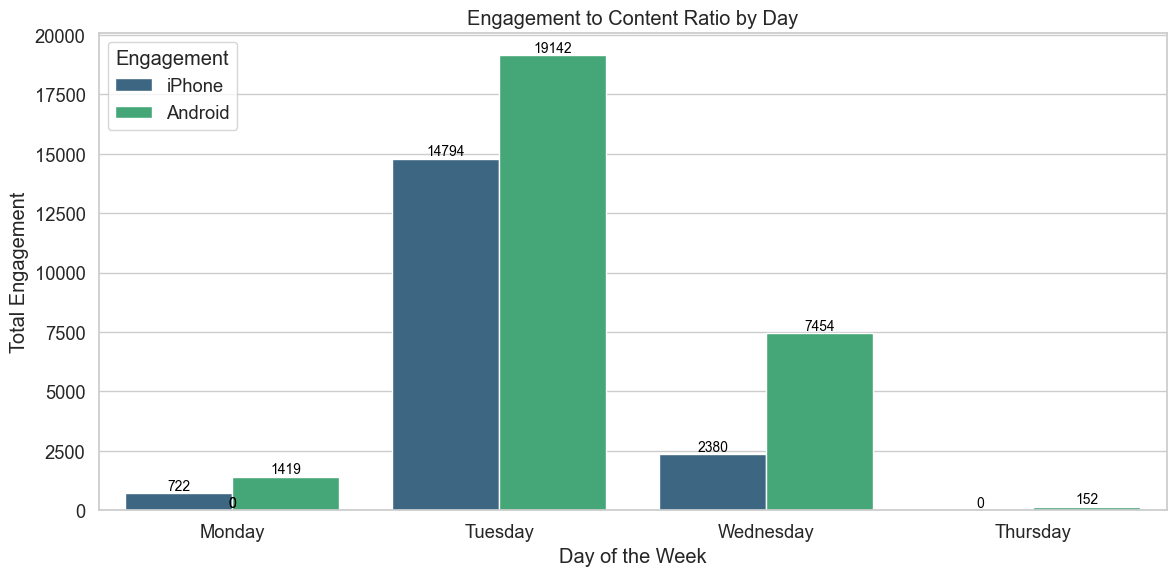

In [95]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=eng_ratio, 
                 x='day_name', 
                 y='scale', 
                 hue='smartphone',
                 hue_order=['iPhone', 'Android'],
                 palette='viridis')

plt.title('Engagement to Content Ratio by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Engagement')
plt.legend(title='Engagement', loc='upper left')

# Menambahkan anotasi untuk setiap batang
for p in ax.patches:  # Mendapatkan semua batang (bars) dalam barplot
    ax.annotate(f'{p.get_height():.0f}',  # Menampilkan tinggi batang (nilai total_engagement)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi anotasi (tengah atas setiap batang)
                ha='center', va='center',  # Horizontal alignment: center, Vertical alignment: center
                fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')  # Menambahkan sedikit offset

plt.xticks(rotation=0)  # Memiringkan label pada sumbu x untuk keterbacaan
plt.tight_layout()  # Menyesuaikan tata letak agar tidak terpotong
plt.show();

#### Analysis Phototheme by Phone

In [96]:
theme_df = df.groupby(['phototheme', 'smartphone']).size().reset_index(name='count')
theme_df.sort_values('count', ascending=False).reset_index(drop=True)

,phototheme,smartphone,count
0,traveling,iPhone,424
1,portrait,Android,187
2,other,iPhone,155
3,other,Android,146
4,event,iPhone,57
5,sport,iPhone,45
6,traveling,Android,39
7,event,Android,29
8,wildlife,iPhone,18
9,landscape,iPhone,13


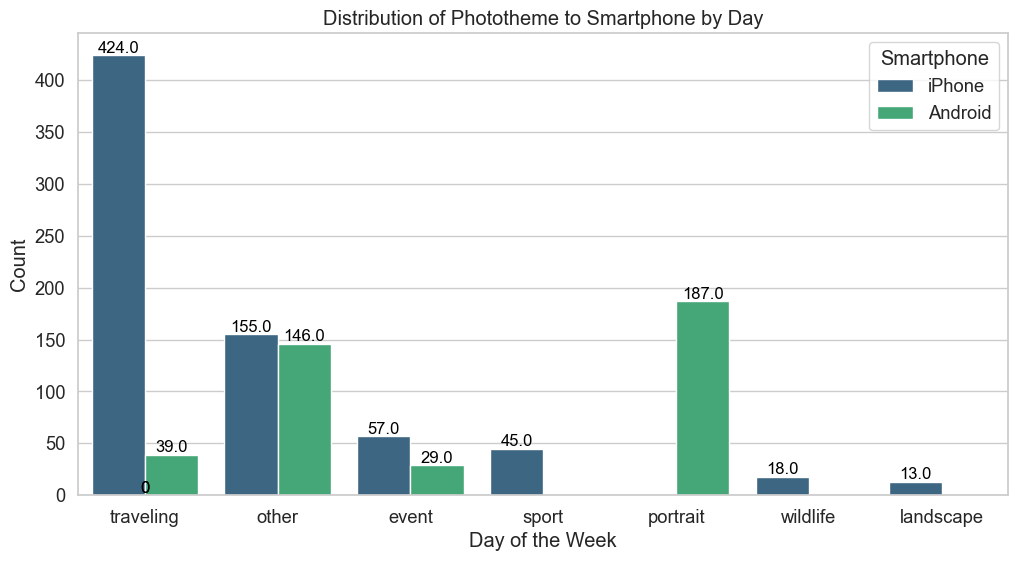

In [97]:
# Membuat plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, 
                   x='phototheme', 
                   hue='smartphone',
                   hue_order=['iPhone', 'Android'],
                   palette='viridis')
plt.title('Distribution of Phototheme to Smartphone by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Smartphone', loc='upper right')

# Menambahkan anotasi untuk setiap batang
for p in ax.patches:  # ax.patches adalah semua batang (bars) yang dibuat oleh countplot
    ax.annotate(f'{p.get_height()}',  # Menampilkan tinggi batang (count)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi anotasi (tengah atas setiap batang)
                ha='center', va='center',  # Horizontal alignment: center, Vertical alignment: center
                fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')  # Menambahkan sedikit offset

plt.show();

In [98]:
df.sample()

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,hashtag,hashtag_first3,hashtag_last3,smartphone,photostyle_first,photostyle_last,phototheme,total_engagement
894,1871196725735768270,#foodphotography #portraitphotography #landsca...,2024-12-23 14:10:39+00:00,67,Interests and Hobbies,"Interests, opinions, and behaviors of individu...",1103294729079349250,Nature,Nature,0,0,0,0,0.0,0.0,2024-12-23 14:10:39+0000,2024-12-23,14,Monday,"[#foodphotography, #portraitphotography, #land...","[foodphotography, portraitphotography, landsca...","[photograph, mobilephotography, wildlifephotog...",Android,portrait,portrait,portrait,0.0


In [99]:
phototheme_engagement = df.groupby(['phototheme','smartphone'])['total_engagement'].sum().reset_index(name='total_engagement')
phototheme_engagement

,phototheme,smartphone,total_engagement
0,event,Android,945.0
1,event,iPhone,"2,957.0"
2,landscape,iPhone,13.0
3,other,Android,"8,186.0"
4,other,iPhone,"34,447.0"
5,portrait,Android,"16,015.0"
6,sport,iPhone,"1,746.0"
7,traveling,Android,"4,689.0"
8,traveling,iPhone,"22,480.0"
9,wildlife,iPhone,0.0


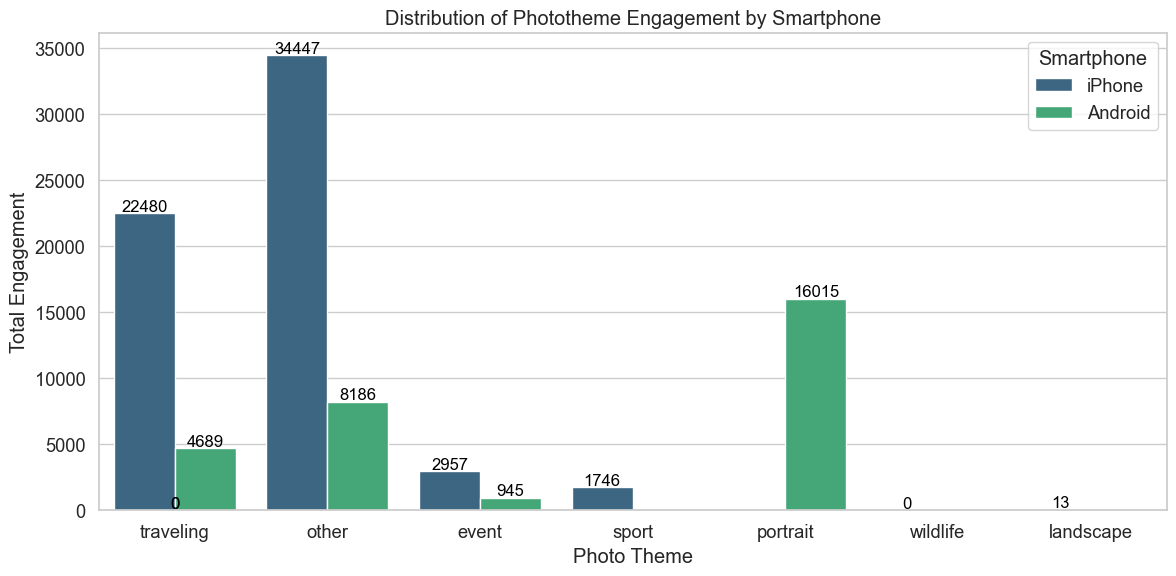

In [100]:
# Define the custom order for 'phototheme'
category_order = ['traveling', 'other', 'event', 'sport', 'portrait', 'wildlife', 'landscape']

# Make sure 'phototheme' is a categorical variable with the defined order
phototheme_engagement['phototheme'] = pd.Categorical(phototheme_engagement['phototheme'], categories=category_order, ordered=True)


# Membuat plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=phototheme_engagement, 
                 x='phototheme', 
                 y='total_engagement', 
                 hue='smartphone', 
                 hue_order=['iPhone','Android'],
                 palette='viridis')
plt.title('Distribution of Phototheme Engagement by Smartphone')
plt.xlabel('Photo Theme')
plt.ylabel('Total Engagement')
plt.legend(title='Smartphone', loc='upper right')

# Menambahkan anotasi untuk setiap batang
for p in ax.patches:  # ax.patches adalah semua batang (bars) yang dibuat oleh barplot
    ax.annotate(f'{p.get_height():.0f}',  # Menampilkan tinggi batang (total engagement)
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Posisi anotasi (tengah atas setiap batang)
                ha='center', va='center',  # Horizontal alignment: center, Vertical alignment: center
                fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')  # Menambahkan sedikit offset

plt.tight_layout()
plt.show();

#### Analysis on Posting & Engagement by Hours

In [101]:
df.columns

Index(['tweet_id', 'tweet_text', 'created_at', 'domain_id', 'domain_name',
       'domain_description', 'entity_id', 'entity_name', 'entity_description',
       'likes', 'retweets', 'replies', 'quotes', 'bookmark_count',
       'impression_count', 'datetime', 'date', 'hour', 'day_name', 'hashtag',
       'hashtag_first3', 'hashtag_last3', 'smartphone', 'photostyle_first',
       'photostyle_last', 'phototheme', 'total_engagement'],
      dtype='object')

In [102]:
hour_posting = df.groupby('hour')['total_engagement'].size().reset_index(name='total_posting')
hour_posting

,hour,total_posting
0,1,10
1,2,51
2,3,33
3,4,69
4,5,44
5,6,16
6,7,53
7,8,13
8,9,16
9,11,57


In [103]:
hour_eng = df.groupby('hour')['total_engagement'].sum().reset_index(name='total_engagement')
hour_eng

,hour,total_engagement
0,1,"1,120.0"
1,2,"4,995.0"
2,3,"1,713.0"
3,4,"2,456.0"
4,5,936.0
5,6,112.0
6,7,413.0
7,8,13.0
8,9,0.0
9,11,967.0


##### Ratio Posting & Engagement by Hours

In [104]:
hour_eng_post = pd.merge(hour_eng,hour_posting,on='hour',how='inner')
hour_eng_post['scale'] = (hour_eng_post['total_engagement'] / hour_eng_post['total_posting']).round(2)
hour_eng_post

,hour,total_engagement,total_posting,scale
0,1,"1,120.0",10,112.0
1,2,"4,995.0",51,97.94
2,3,"1,713.0",33,51.91
3,4,"2,456.0",69,35.59
4,5,936.0,44,21.27
5,6,112.0,16,7.0
6,7,413.0,53,7.79
7,8,13.0,13,1.0
8,9,0.0,16,0.0
9,11,967.0,57,16.96


In [105]:
hour_eng_post['scale'].mean()

np.float64(120.62363636363635)

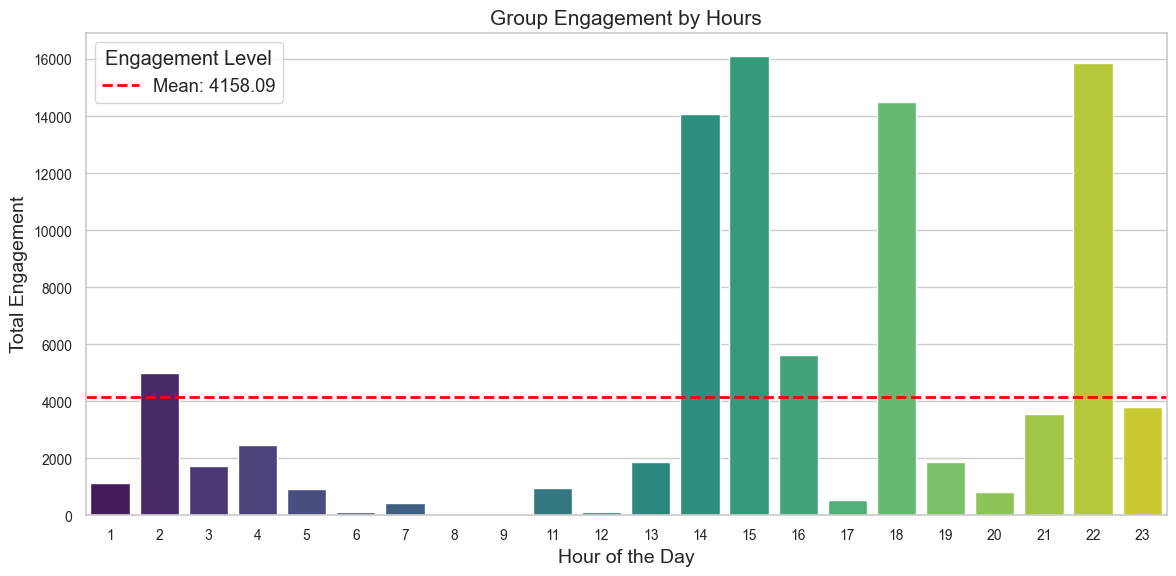

In [106]:
plt.figure(figsize=(12, 6))
hour_eng_post_mean = hour_eng_post['total_engagement'].mean()
hour_eng_post_scale_mean = hour_eng_post['scale'].mean()

sns.barplot(data=hour_eng_post, x='hour', y='total_engagement', palette='viridis')
plt.axhline(hour_eng_post_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {hour_eng_post_mean:.2f}')
# plt.axhline(hour_eng_post_scale_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean: {hour_eng_post_scale_mean:.2f}')

plt.legend(loc='upper left', title='Engagement Level')  # Add legend title
plt.title('Group Engagement by Hours', fontsize=15)
plt.xlabel('Hour of the Day', size=14)  # Clarify x-axis label
plt.ylabel('Total Engagement', size=14)  # Add y-axis label
plt.xticks(rotation=0, size=10)  # Ensure horizontal x-axis labels
plt.yticks(rotation=0, size=10)  # Ensure horizontal x-axis labels
plt.tick_params(bottom=False)  # Remove unnecessary x-axis ticks
plt.tight_layout()  # Adjust spacing for better readability

plt.show();

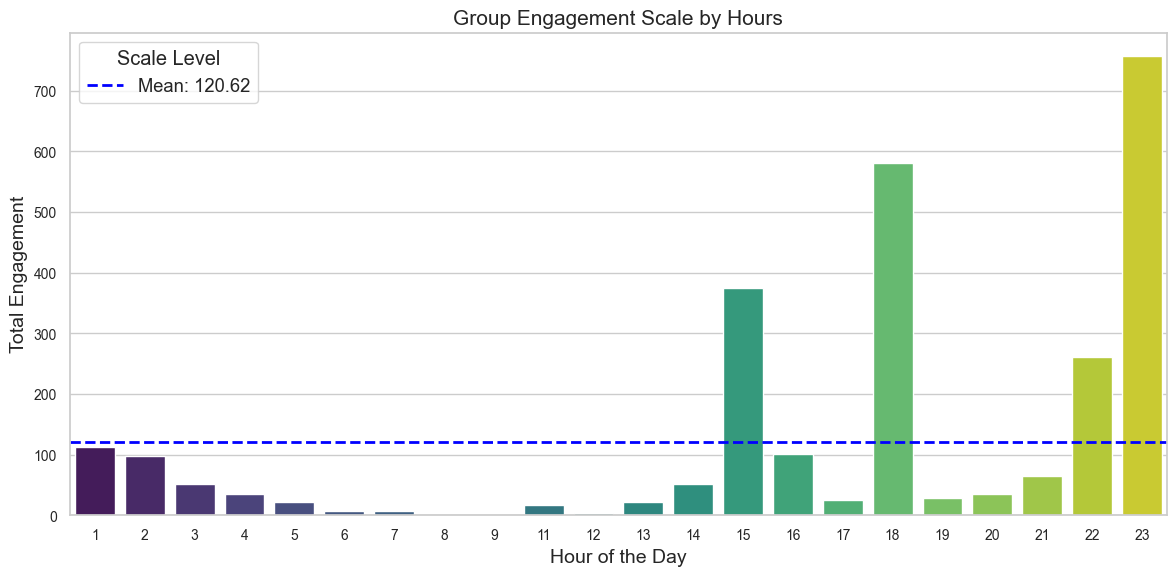

In [107]:
plt.figure(figsize=(12, 6))
# hour_eng_post_mean = hour_eng_post['total_engagement'].mean()
hour_eng_post_scale_mean = hour_eng_post['scale'].mean()

sns.barplot(data=hour_eng_post, x='hour', y='scale', palette='viridis')
# plt.axhline(hour_eng_post_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {hour_eng_post_mean:.2f}')
plt.axhline(hour_eng_post_scale_mean, color='blue', linestyle='--', linewidth=2, label=f'Mean: {hour_eng_post_scale_mean:.2f}')

plt.legend(loc='upper left', title='Scale Level')  # Add legend title
plt.title('Group Engagement Scale by Hours', fontsize=15)
plt.xlabel('Hour of the Day', size=14)  # Clarify x-axis label
plt.ylabel('Total Engagement', size=14)  # Add y-axis label
plt.xticks(rotation=0, size=10)  # Ensure horizontal x-axis labels
plt.yticks(rotation=0, size=10)  # Ensure horizontal x-axis labels
plt.tick_params(bottom=False)  # Remove unnecessary x-axis ticks
plt.tight_layout()  # Adjust spacing for better readability

plt.show();

#### Engagement Comparison between Working Day & Holiday

In [108]:
# engagement on  working day & holiday
workday_df = df[df['day_name'] != 'Wednesday']
holiday_df = df[df['day_name'] == 'Wednesday']

In [109]:
hour_posting_wd = workday_df.groupby('hour')['total_engagement'].size().reset_index(name='total_posting')
hour_posting_wd

,hour,total_posting
0,8,13
1,9,16
2,11,57
3,12,32
4,13,89
5,14,274
6,15,43
7,16,56
8,17,22
9,18,25


In [110]:
hour_eng_wd = workday_df.groupby('hour')['total_engagement'].sum().reset_index(name='total_engagement')
hour_eng_wd

,hour,total_engagement
0,8,13.0
1,9,0.0
2,11,967.0
3,12,100.0
4,13,"1,881.0"
5,14,"14,084.0"
6,15,"16,129.0"
7,16,"5,626.0"
8,17,546.0
9,18,"14,506.0"


In [111]:
hourly_data_wd = pd.merge(hour_eng_wd,hour_posting_wd, on='hour', how='inner')
hourly_data_wd['scale'] = (hourly_data_wd['total_engagement'] / hourly_data_wd['total_posting']).round(2)
hourly_data_wd

,hour,total_engagement,total_posting,scale
0,8,13.0,13,1.0
1,9,0.0,16,0.0
2,11,967.0,57,16.96
3,12,100.0,32,3.12
4,13,"1,881.0",89,21.13
5,14,"14,084.0",274,51.4
6,15,"16,129.0",43,375.09
7,16,"5,626.0",56,100.46
8,17,546.0,22,24.82
9,18,"14,506.0",25,580.24


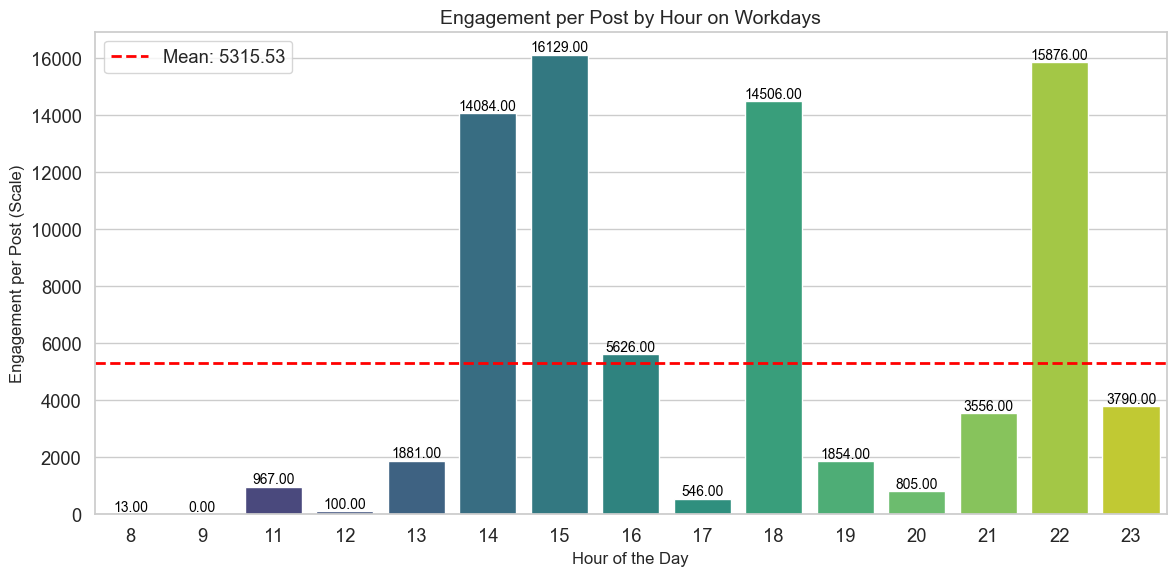

In [112]:
plt.figure(figsize=(12, 6))

hourly_data_wd_mean = hourly_data_wd['total_engagement'].mean()

ax = sns.barplot(data=hourly_data_wd, x='hour', y='total_engagement', palette='viridis')
plt.axhline(hourly_data_wd_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {hourly_data_wd_mean:.2f}')

# Add a title and labels
plt.title('Engagement per Post by Hour on Workdays', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Engagement per Post (Scale)', fontsize=12)
plt.legend(loc='upper left')

# Add annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show();

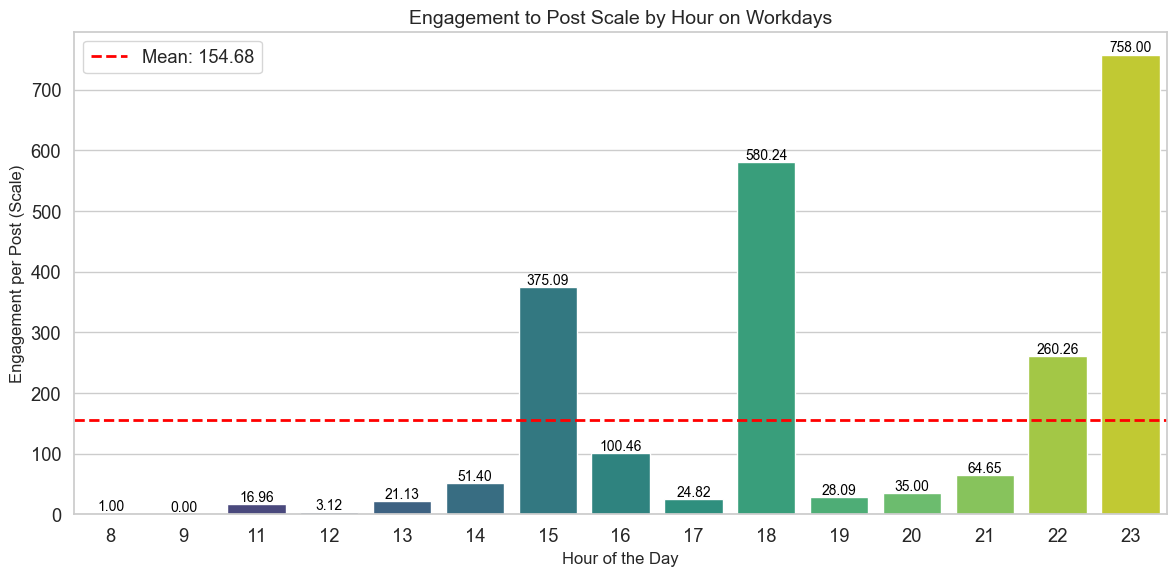

In [113]:
plt.figure(figsize=(12, 6))

hourly_data_wd_scale_mean = hourly_data_wd['scale'].mean()

ax = sns.barplot(data=hourly_data_wd, x='hour', y='scale', palette='viridis')
plt.axhline(hourly_data_wd_scale_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {hourly_data_wd_scale_mean:.2f}')

# Add a title and labels
plt.title('Engagement to Post Scale by Hour on Workdays', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Engagement per Post (Scale)', fontsize=12)
plt.legend(loc='upper left')

# Add annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show();

##### Engagement Comparison on Holiday (XMas)

In [114]:
hour_posting_hd = holiday_df.groupby('hour')['total_engagement'].size().reset_index(name='total_posting')
hour_posting_hd

hour_eng_hd = holiday_df.groupby('hour')['total_engagement'].sum().reset_index(name='total_engagement')
hour_eng_hd

hourly_data_hd = pd.merge(hour_eng_hd,hour_posting_hd, on='hour', how='inner')
hourly_data_hd['scale'] = (hourly_data_hd['total_engagement'] / hourly_data_hd['total_posting']).round(2)
hourly_data_hd

,hour,total_posting
0,1,10
1,2,51
2,3,33
3,4,69
4,5,44
5,6,16
6,7,53


,hour,total_engagement
0,1,"1,120.0"
1,2,"4,995.0"
2,3,"1,713.0"
3,4,"2,456.0"
4,5,936.0
5,6,112.0
6,7,413.0


,hour,total_engagement,total_posting,scale
0,1,"1,120.0",10,112.0
1,2,"4,995.0",51,97.94
2,3,"1,713.0",33,51.91
3,4,"2,456.0",69,35.59
4,5,936.0,44,21.27
5,6,112.0,16,7.0
6,7,413.0,53,7.79


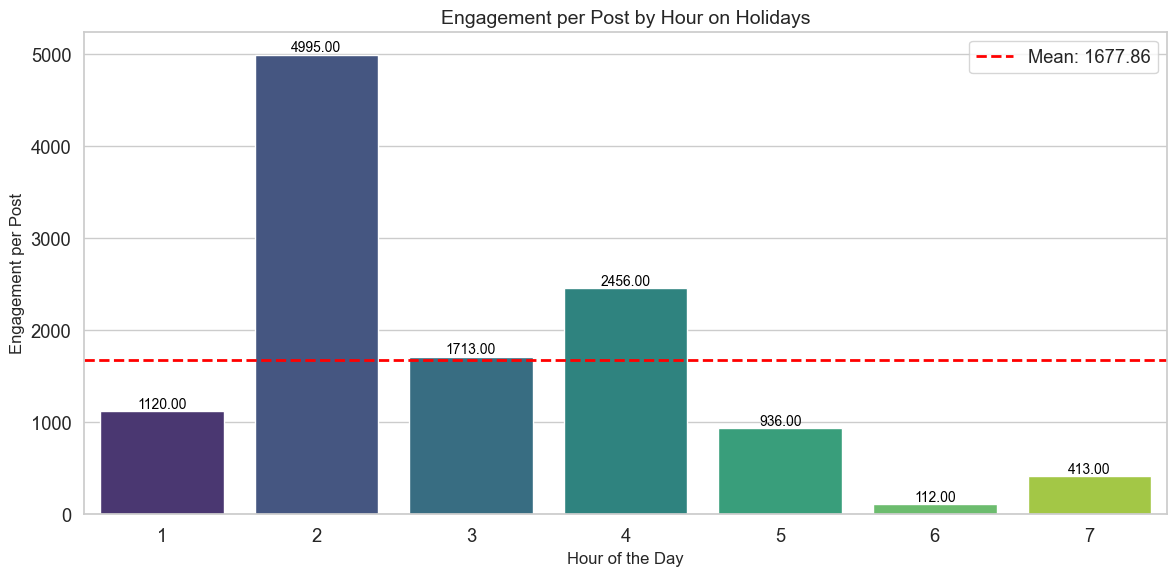

In [115]:
plt.figure(figsize=(12, 6))

hourly_data_hd_mean = hourly_data_hd['total_engagement'].mean()

ax = sns.barplot(data=hourly_data_hd, x='hour', y='total_engagement', palette='viridis')
plt.axhline(hourly_data_hd_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {hourly_data_hd_mean:.2f}')

# Add a title and labels
plt.title('Engagement per Post by Hour on Holidays', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Engagement per Post', fontsize=12)
plt.legend(loc='upper right')

# Add annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show();

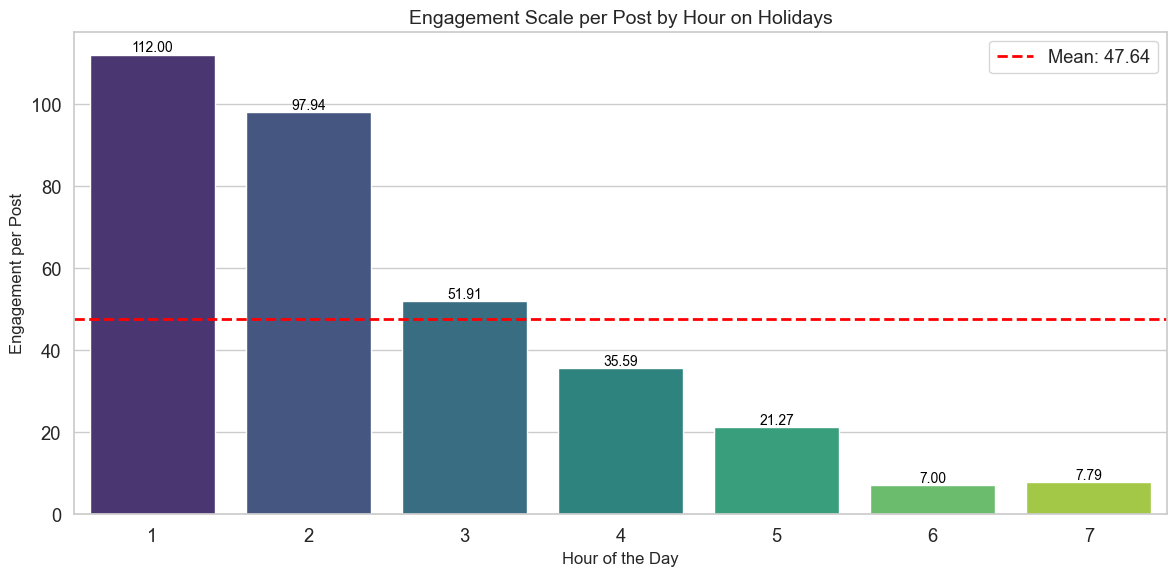

In [116]:
plt.figure(figsize=(12, 6))

hourly_data_hd_scale_mean = hourly_data_hd['scale'].mean()

ax = sns.barplot(data=hourly_data_hd, x='hour', y='scale', palette='viridis')
plt.axhline(hourly_data_hd_scale_mean, color='red', linestyle='--', linewidth=2, label=f'Mean: {hourly_data_hd_scale_mean:.2f}')

# Add a title and labels
plt.title('Engagement Scale per Post by Hour on Holidays', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Engagement per Post', fontsize=12)
plt.legend(loc='upper right')

# Add annotations on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# Tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show();

### Unsupervised ML

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 0 to 1137
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1113 non-null   int64         
 1   tweet_text          1113 non-null   object        
 2   created_at          1113 non-null   object        
 3   domain_id           1113 non-null   int64         
 4   domain_name         1113 non-null   object        
 5   domain_description  1113 non-null   object        
 6   entity_id           1113 non-null   int64         
 7   entity_name         1113 non-null   object        
 8   entity_description  1113 non-null   object        
 9   likes               1113 non-null   int64         
 10  retweets            1113 non-null   int64         
 11  replies             1113 non-null   int64         
 12  quotes              1113 non-null   int64         
 13  bookmark_count      1113 non-null   float64       
 1

In [118]:
df['day_name'] = df['day_name'].astype('object')

#### Handling Outliers

In [119]:
numerical_columns = df.select_dtypes(exclude=['object', 'bool']).columns
numerical_df = df[numerical_columns]

desc_df = numerical_df.describe().round(2).T
desc_df['nunique'] = numerical_df.nunique()

desc_df['iqr'] = (desc_df['75%'] - desc_df['25%']).round(2)
desc_df['lowt'] = (desc_df['25%'] - (1.5 * desc_df['iqr'])).round(2)
desc_df['hit'] = (desc_df['75%'] + (1.5 * desc_df['iqr'])).round(2)

desc_df['out_low'] = desc_df['min'] < desc_df['lowt']
desc_df['out_hi'] = desc_df['max'] > desc_df['hit']

desc_df['outliers_low_count'] = 0
desc_df['outliers_hi_count'] = 0

for col in numerical_columns:
    lower_outliers = (numerical_df[col] < desc_df.loc[col, 'lowt']).sum()
    upper_outliers = (numerical_df[col] > desc_df.loc[col, 'hit']).sum()
    desc_df.at[col, 'outliers_low_count'] = lower_outliers
    desc_df.at[col, 'outliers_hi_count'] = upper_outliers

desc_df = desc_df.sort_values(by='nunique', ascending=True)
desc_df

,count,mean,min,25%,50%,75%,max,std,nunique,iqr,lowt,hit,out_low,out_hi,outliers_low_count,outliers_hi_count
quotes,"1,113.0",0.01,0.0,0.0,0.0,0.0,1.0,0.12,2,0.0,0.0,0.0,False,True,0,15
bookmark_count,"1,113.0",0.13,0.0,0.0,0.0,0.0,6.0,0.49,3,0.0,0.0,0.0,False,True,0,115
date,1113,2024-12-24 02:28:47.223719680,2024-12-23 00:00:00,2024-12-23 00:00:00,2024-12-24 00:00:00,2024-12-25 00:00:00,2024-12-26 00:00:00,NaN,4,2 days 00:00:00,2024-12-20 00:00:00,2024-12-28 00:00:00,False,False,0,0
replies,"1,113.0",1.15,0.0,0.0,0.0,0.0,74.0,7.95,5,0.0,0.0,0.0,False,True,0,268
retweets,"1,113.0",0.32,0.0,0.0,0.0,0.0,16.0,1.29,6,0.0,0.0,0.0,False,True,0,163
likes,"1,113.0",5.36,0.0,0.0,2.0,4.0,179.0,15.08,18,4.0,-6.0,10.0,False,True,0,107
hour,"1,113.0",12.68,1.0,8.0,14.0,16.0,23.0,5.78,22,8.0,-4.0,28.0,False,False,0,0
domain_id,"1,113.0",85.94,3.0,46.0,67.0,131.0,173.0,45.16,32,85.0,-81.5,258.5,False,False,0,0
impression_count,"1,113.0",75.22,0.0,0.0,24.0,76.0,"2,165.0",222.97,39,76.0,-114.0,190.0,False,True,0,40
total_engagement,"1,113.0",82.19,0.0,3.0,29.0,83.0,"2,367.0",235.55,51,80.0,-117.0,203.0,False,True,0,40


<Axes: xlabel='quotes'>

Text(0.5, 1.0, 'Boxplot of quotes')

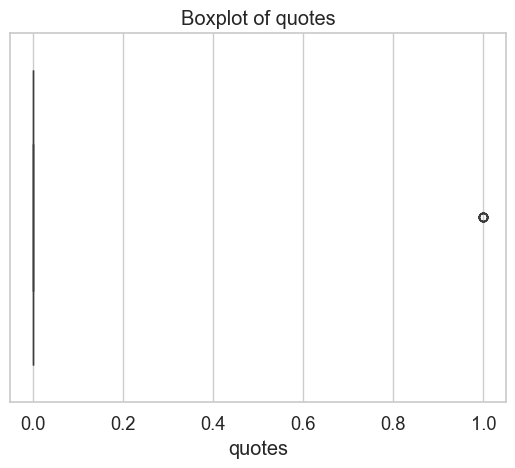

<Axes: xlabel='bookmark_count'>

Text(0.5, 1.0, 'Boxplot of bookmark_count')

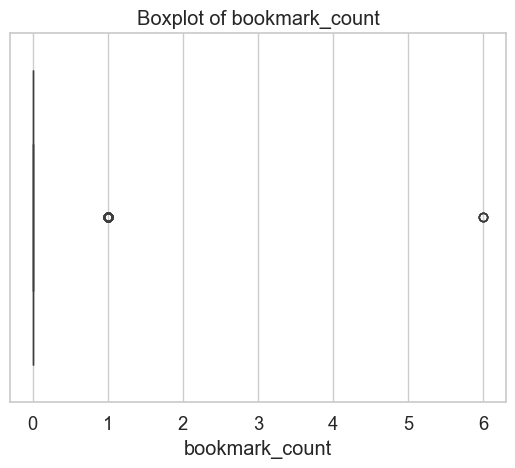

<Axes: xlabel='replies'>

Text(0.5, 1.0, 'Boxplot of replies')

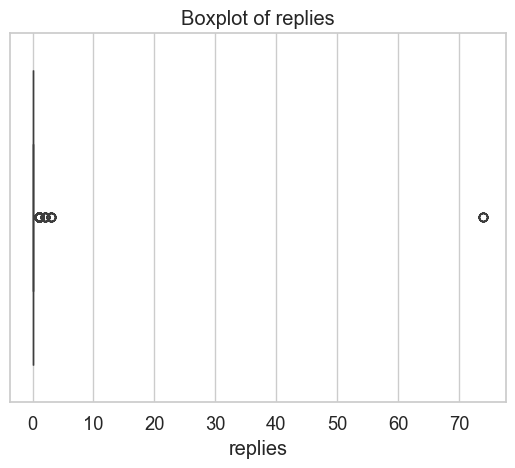

<Axes: xlabel='retweets'>

Text(0.5, 1.0, 'Boxplot of retweets')

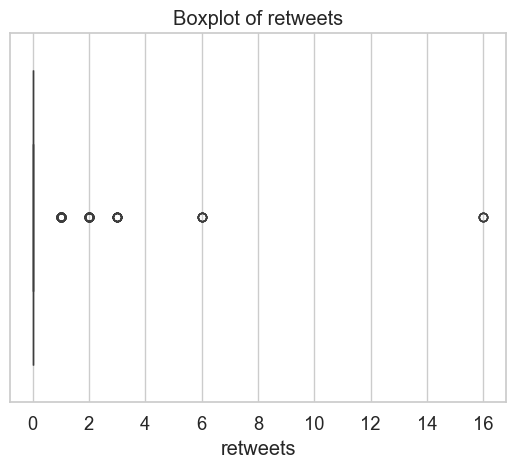

<Axes: xlabel='likes'>

Text(0.5, 1.0, 'Boxplot of likes')

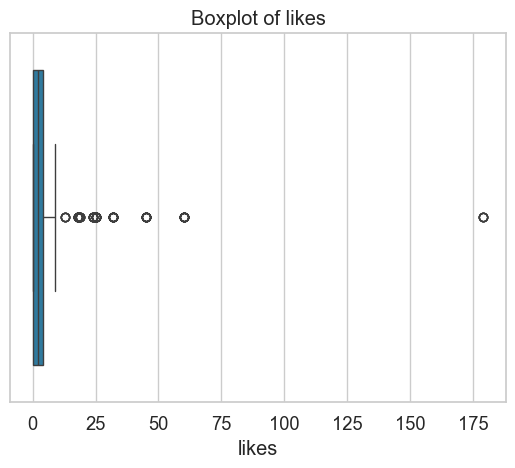

<Axes: xlabel='impression_count'>

Text(0.5, 1.0, 'Boxplot of impression_count')

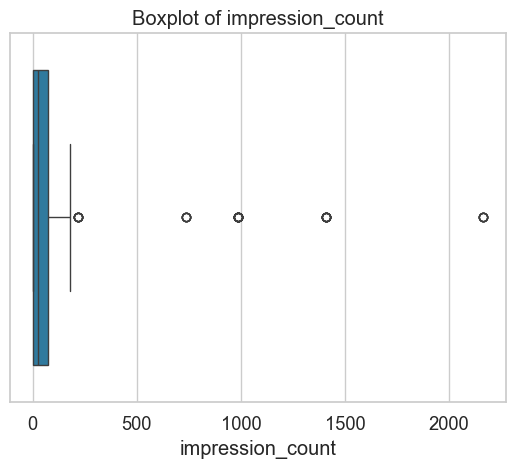

In [120]:
outliers_plot = ['quotes', 'bookmark_count', 'replies', 'retweets', 'likes', 'impression_count']

for col in outliers_plot:
    sns.boxplot(df, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show();


#### Transformasi Logaritmik, Min-Max, StandardScaler
Dikarenakan banyaknya value '0' sehingga handling outliers tidak mungkin dilakukan, perlu dimodifikasi data

In [121]:
#transformasi StandardScaler
from sklearn.preprocessing import StandardScaler

df_ml = df[['likes','retweets','replies','quotes','bookmark_count','impression_count','total_engagement']]

std = StandardScaler()
df_std = std.fit_transform(df_ml)
df_std

#transformasi logaritmik
df_ml['likes_log']             = np.log1p(df_ml['likes'])
df_ml['retweets_log']          = np.log1p(df_ml['retweets'])
df_ml['replies_log']           = np.log1p(df_ml['replies'])
df_ml['quotes_log']            = np.log1p(df_ml['quotes'])
df_ml['bookmark_log']          = np.log1p(df_ml['bookmark_count'])
df_ml['impression_count_log']  = np.log1p(df_ml['impression_count'])
df_ml['total_engagement']      = np.log1p(df_ml['total_engagement'])

#transformasi Min-Max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_ml[['likes_scaled', 'retweets_scaled', 'replies_scaled','quotes_scaled','bookmark_count_scaled','impression_count_scaled','total_engagement']] = scaler.fit_transform(df_ml[['likes', 'retweets', 'replies','quotes','bookmark_count','impression_count','total_engagement']])

array([[-0.35574726, -0.24943069, -0.14480642, ..., -0.25426403,
        -0.33300487, -0.3448443 ],
       [-0.35574726, -0.24943069, -0.14480642, ..., -0.25426403,
        -0.33300487, -0.3448443 ],
       [-0.35574726, -0.24943069, -0.14480642, ..., -0.25426403,
        -0.33300487, -0.3448443 ],
       ...,
       [-0.35574726, -0.24943069, -0.14480642, ..., -0.25426403,
        -0.33749175, -0.34909165],
       [-0.35574726, -0.24943069, -0.14480642, ..., -0.25426403,
        -0.33749175, -0.34909165],
       [-0.35574726, -0.24943069, -0.14480642, ..., -0.25426403,
        -0.33749175, -0.34909165]])

In [122]:
df_ml.sample(3)

,likes,retweets,replies,quotes,bookmark_count,impression_count,total_engagement,likes_log,retweets_log,replies_log,quotes_log,bookmark_log,impression_count_log,likes_scaled,retweets_scaled,replies_scaled,quotes_scaled,bookmark_count_scaled,impression_count_scaled
472,3,0,0,0,0.0,80.0,0.5702612976988904,1.3862943611198906,0.0,0.0,0.0,0.0,4.394449154672439,0.01675977653631285,0.0,0.0,0.0,0.0,0.03695150115473441
464,3,0,0,0,0.0,80.0,0.5702612976988904,1.3862943611198906,0.0,0.0,0.0,0.0,4.394449154672439,0.01675977653631285,0.0,0.0,0.0,0.0,0.03695150115473441
729,1,0,0,0,0.0,0.0,0.08921041618909407,0.6931471805599453,0.0,0.0,0.0,0.0,0.0,0.00558659217877095,0.0,0.0,0.0,0.0,0.0


In [123]:
df_ml['total_engagement'].mean()
df_ml['total_engagement'].describe()

np.float64(0.3832495888061811)

count               1,113.0
mean     0.3832495888061811
std     0.23816613233221845
min                     0.0
25%     0.17842083237818815
50%      0.4377457522285877
75%      0.5702612976988904
max                     1.0
Name: total_engagement, dtype: float64

In [124]:
# Menentukan bins berdasarkan deskripsi yang diberikan
bins = [0, 10, 50, 1000, 3000] 

# Menggunakan pd.cut untuk membagi data ke dalam bin
df_ml['engagement_level'] = pd.cut(df_ml['total_engagement'], bins=bins, labels=['low', 'medium', 'high', 'very_high'])

# Menghitung jumlah (count) untuk setiap kategori
engagement_counts = df_ml['engagement_level'].value_counts()

# Menampilkan hasil
engagement_counts.reset_index()

,engagement_level,count
0,low,941
1,medium,0
2,high,0
3,very_high,0


In [125]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 0 to 1137
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   likes                    1113 non-null   int64   
 1   retweets                 1113 non-null   int64   
 2   replies                  1113 non-null   int64   
 3   quotes                   1113 non-null   int64   
 4   bookmark_count           1113 non-null   float64 
 5   impression_count         1113 non-null   float64 
 6   total_engagement         1113 non-null   float64 
 7   likes_log                1113 non-null   float64 
 8   retweets_log             1113 non-null   float64 
 9   replies_log              1113 non-null   float64 
 10  quotes_log               1113 non-null   float64 
 11  bookmark_log             1113 non-null   float64 
 12  impression_count_log     1113 non-null   float64 
 13  likes_scaled             1113 non-null   float64 
 14  retweets_scal

In [126]:
df_ml.isna().sum()

likes                        0
retweets                     0
replies                      0
quotes                       0
bookmark_count               0
impression_count             0
total_engagement             0
likes_log                    0
retweets_log                 0
replies_log                  0
quotes_log                   0
bookmark_log                 0
impression_count_log         0
likes_scaled                 0
retweets_scaled              0
replies_scaled               0
quotes_scaled                0
bookmark_count_scaled        0
impression_count_scaled      0
engagement_level           172
dtype: int64

In [127]:
df_ml[df_ml.isna().any(axis=1)].sample()

,likes,retweets,replies,quotes,bookmark_count,impression_count,total_engagement,likes_log,retweets_log,replies_log,quotes_log,bookmark_log,impression_count_log,likes_scaled,retweets_scaled,replies_scaled,quotes_scaled,bookmark_count_scaled,impression_count_scaled,engagement_level
1100,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [128]:
# Menambahkan kategori baru 'very_low' ke dalam kolom 'engagement_level'
df_ml['engagement_level'] = df_ml['engagement_level'].cat.add_categories('very_low')

# Mengganti nilai NaN dengan 'very_low'
df_ml['engagement_level'].fillna('very_low', inplace=True)


In [129]:
featlist = list(df_ml.columns)
featlist

['likes',
 'retweets',
 'replies',
 'quotes',
 'bookmark_count',
 'impression_count',
 'total_engagement',
 'likes_log',
 'retweets_log',
 'replies_log',
 'quotes_log',
 'bookmark_log',
 'impression_count_log',
 'likes_scaled',
 'retweets_scaled',
 'replies_scaled',
 'quotes_scaled',
 'bookmark_count_scaled',
 'impression_count_scaled',
 'engagement_level']

#### KMeans

KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

KMeans(n_clusters=5, random_state=0)

KMeans(n_clusters=6, random_state=0)

KMeans(n_clusters=7, random_state=0)

KMeans(random_state=0)

KMeans(n_clusters=9, random_state=0)

KMeans(n_clusters=10, random_state=0)

<Figure size 2000x700 with 0 Axes>

<Axes: >

<Axes: >

Text(0.5, 1.0, 'Inertia Plot for Optimal Number of Clusters')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'Inertia')

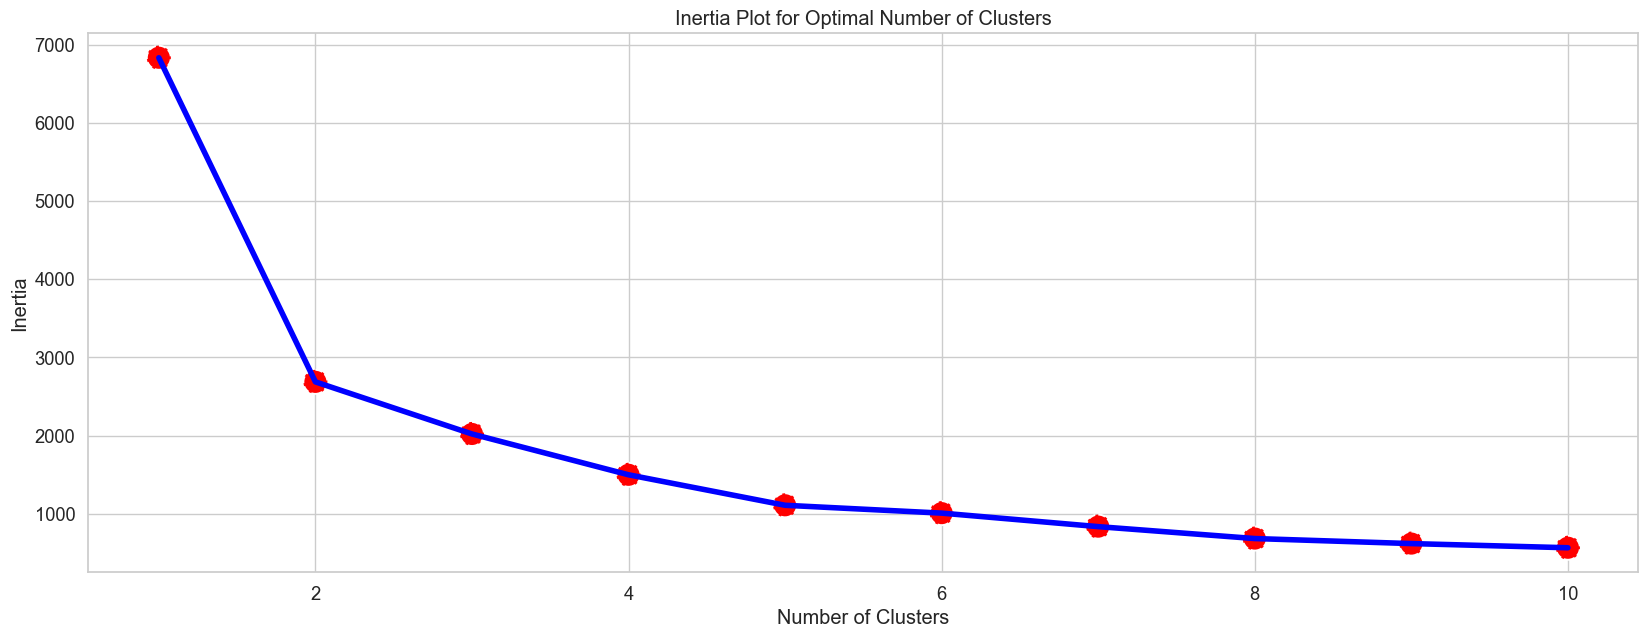

KMeans(n_clusters=2, random_state=0)

Silhouette Score: 0.5862056239786955


In [130]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Menyiapkan Data untuk clustering
df_km = df_ml[['likes_log',
                'retweets_log',
                'replies_log',
                'quotes_log',
                'bookmark_log',
                'impression_count_log',
                'likes_scaled',
                'retweets_scaled',
                'replies_scaled',
                'quotes_scaled',
                'bookmark_count_scaled',
                'impression_count_scaled',
                'total_engagement']] 

# Menentukan jumlah klaster
kmeans = KMeans(n_clusters=2, random_state=0)  
df_km['cluster'] = kmeans.fit_predict(df_km)

# Menentukan Inertia untuk memilih jumlah klaster yang optimal
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_km)
    inertia.append(kmeans.inertia_)

# Visualisasi inertia untuk memilih jumlah cluster yang optimal
plt.figure(figsize=(20, 7))
sns.lineplot(x=range(1, 11), y=inertia, color='blue', linewidth=4)
sns.scatterplot(x=range(1, 11), y=inertia, s=300, color='red', linestyle='--')
plt.title('Inertia Plot for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show();

# Menentukan klaster dengan jumlah n=2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df_km)

# Menyimpan label klaster yang dihasilkan
cluster_labels = kmeans.labels_

# Menghitung Silhouette Score untuk mengukur kualitas klaster
silhouette_avg = silhouette_score(df_km, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")


In [131]:
df_km.sample()

,likes_log,retweets_log,replies_log,quotes_log,bookmark_log,impression_count_log,likes_scaled,retweets_scaled,replies_scaled,quotes_scaled,bookmark_count_scaled,impression_count_scaled,total_engagement,cluster
576,0.6931471805599453,0.0,0.0,0.0,0.0,3.2188758248682006,0.00558659217877095,0.0,0.0,0.0,0.0,0.011085450346420323,0.41932818352711493,0


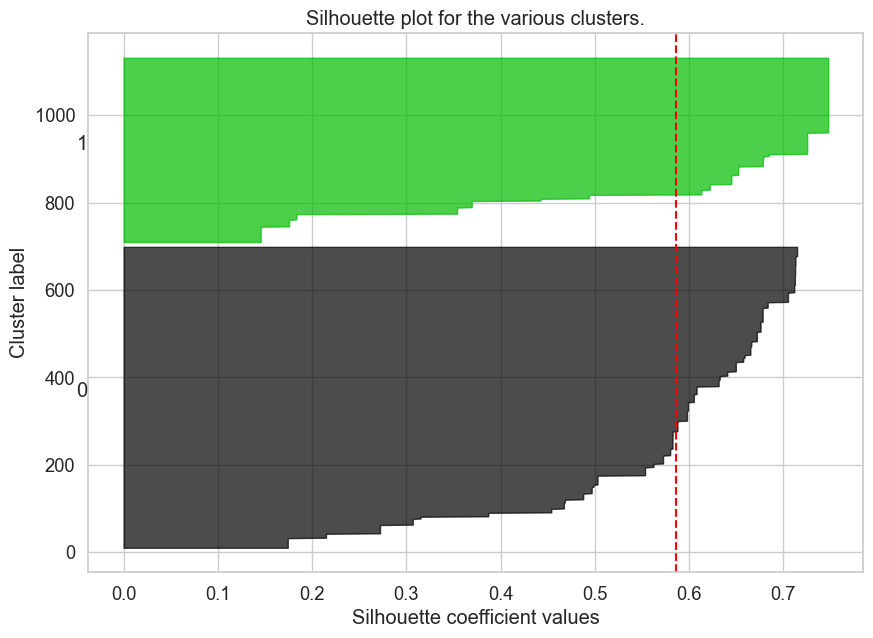

In [132]:
from sklearn.metrics import silhouette_samples

n_clusters = 2  # Sesuai elbow method

# Hitung silhouette scores untuk setiap sampel
sample_silhouette_values = silhouette_samples(df_km, cluster_labels)

# Menyusun plot Silhouette
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 7)

y_lower = 10

for i in range(n_clusters):
    # Ambil silhouette scores untuk cluster ke-i
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    # Urutkan nilai silhouette
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # Pilih warna berdasarkan cluster
    color = plt.cm.nipy_spectral(float(i) / n_clusters)
    
    # Plot nilai silhouette
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label plot dengan nomor cluster
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Hitung y_lower untuk plot berikutnya
    y_lower = y_upper + 10  # 10 untuk menambah ruang antara cluster

# Menambahkan judul dan label
ax1.set_title("Silhouette plot for the various clusters.")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# Garis vertikal untuk silhouette score rata-rata
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

# Menampilkan plot
plt.show();

#### PCA

In [133]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(df_km)
pcs = pca.transform(df_km)

data_pca = pd.DataFrame(data=pcs, columns=['PC 1', 'PC 2'])
data_pca['cluster'] = cluster_labels  # Gantilah 'cluster_labels' dengan variabel klaster yang benar

data_pca.sample(10, random_state=42)


PCA(n_components=2)

,PC 1,PC 2,cluster
879,-2.92857544848596,-0.39284309466429634,1
101,0.6512319159558193,-0.6718565051780752,0
1043,3.3113424367434967,1.7458618797186856,0
726,-2.7500032926474827,0.20858706638258495,1
291,-0.747816587253658,0.0005715731079298791,1
868,-2.92857544848596,-0.39284309466429634,1
951,-2.92857544848596,-0.39284309466429634,1
260,1.0385987685908922,-1.3995793777077603,0
128,1.366384859141594,0.06585391471814073,0
1034,2.5638391451088336,1.0038066075822416,0


In [134]:
df_km.sample()

,likes_log,retweets_log,replies_log,quotes_log,bookmark_log,impression_count_log,likes_scaled,retweets_scaled,replies_scaled,quotes_scaled,bookmark_count_scaled,impression_count_scaled,total_engagement,cluster
85,1.0986122886681098,0.0,0.0,0.0,0.0,2.3978952727983707,0.0111731843575419,0.0,0.0,0.0,0.0,0.004618937644341801,0.33011776733802084,0


#### Cluster Distribution

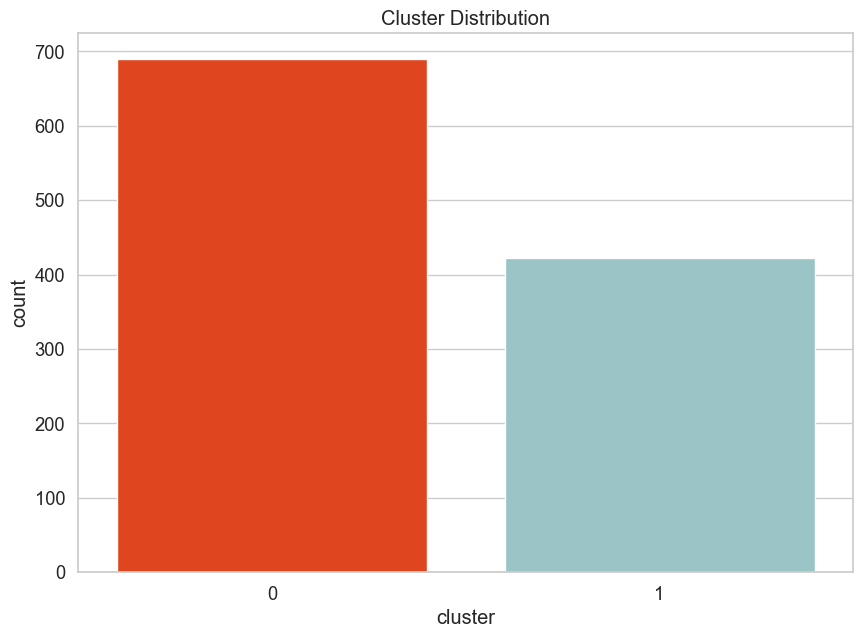

In [135]:
# Distribution

plt.figure(figsize=(10,7))
pl = sns.countplot(x = df_km['cluster'], palette=['#ff3300','#94cace'])
pl.set_title('Cluster Distribution')
plt.show();

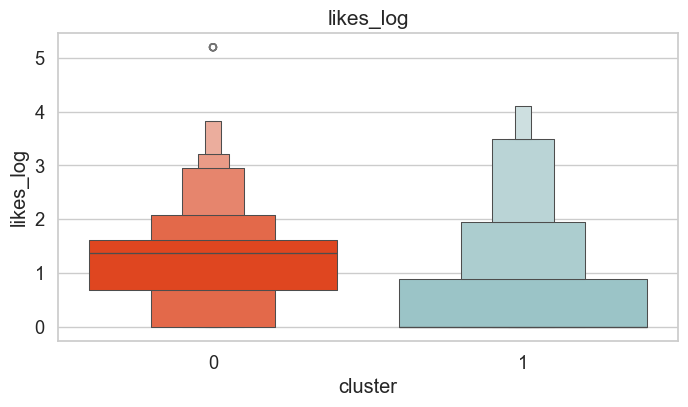

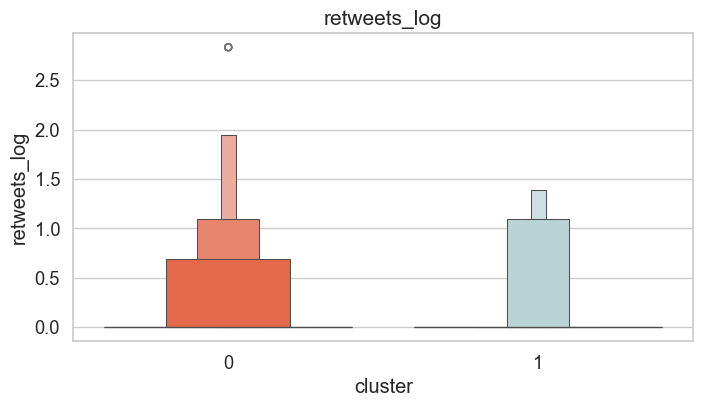

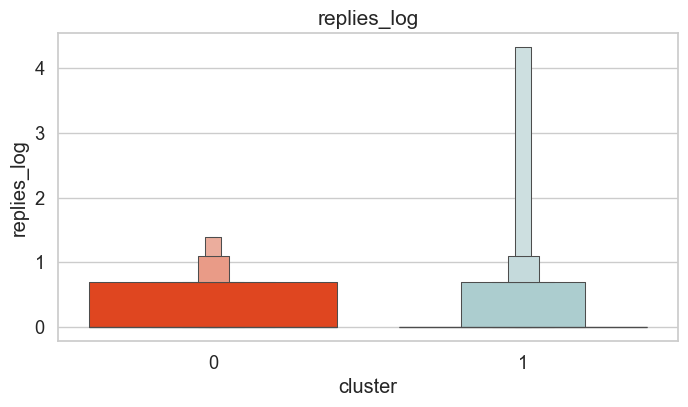

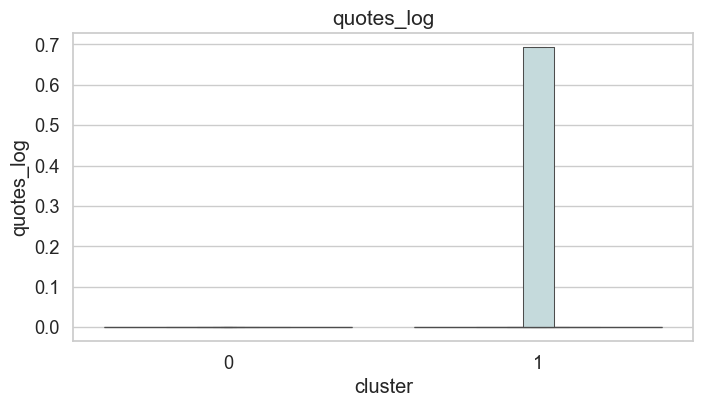

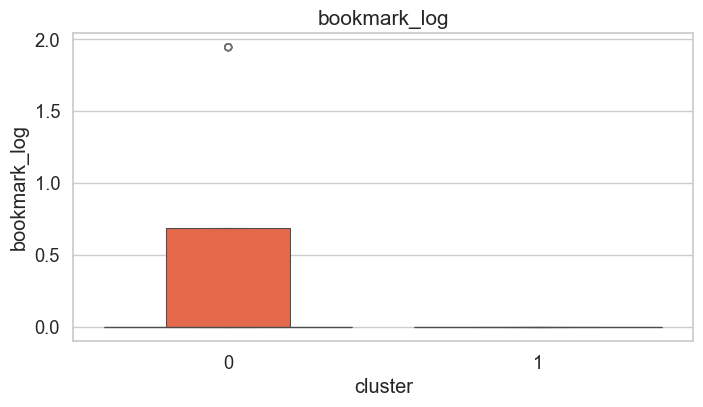

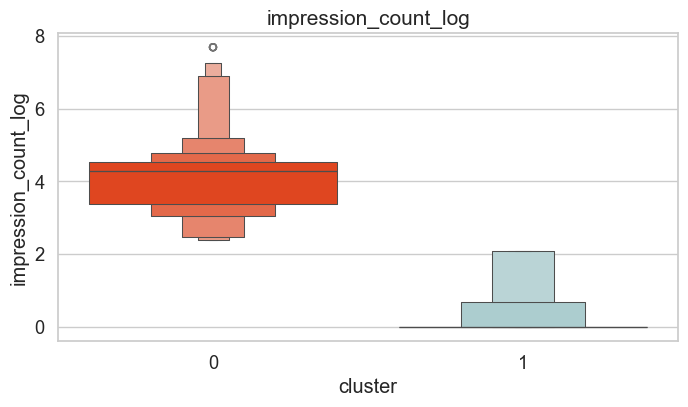

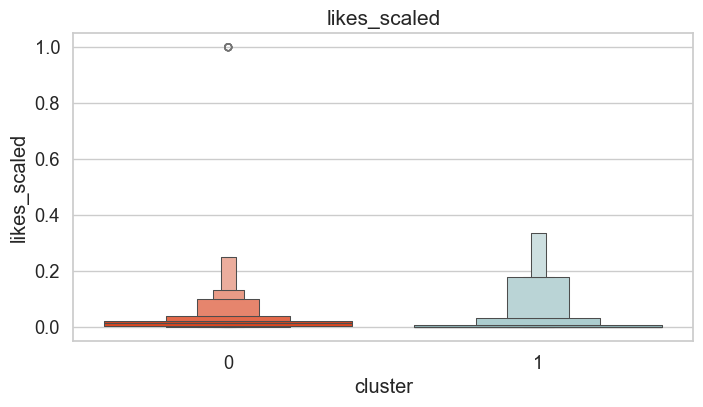

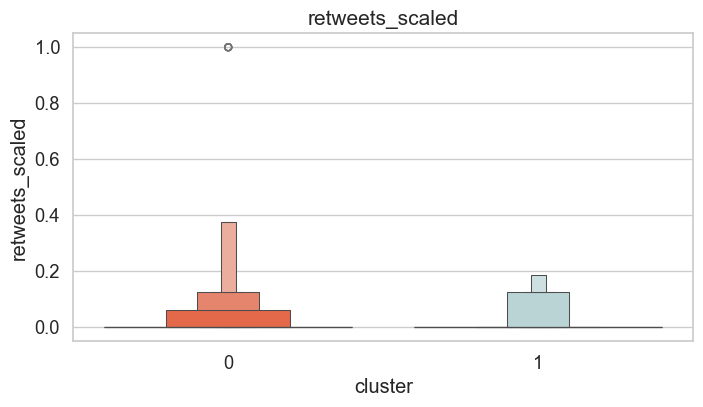

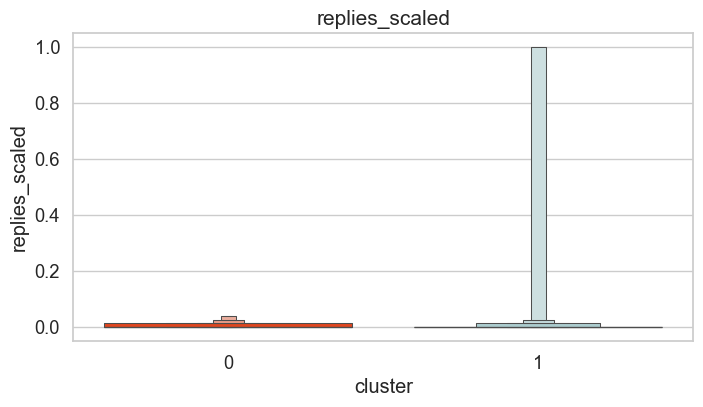

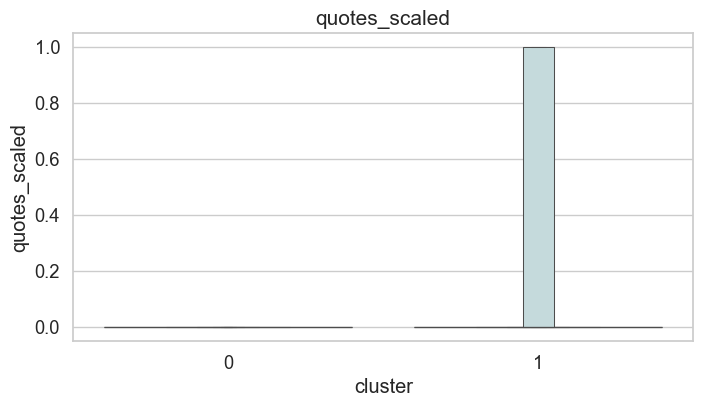

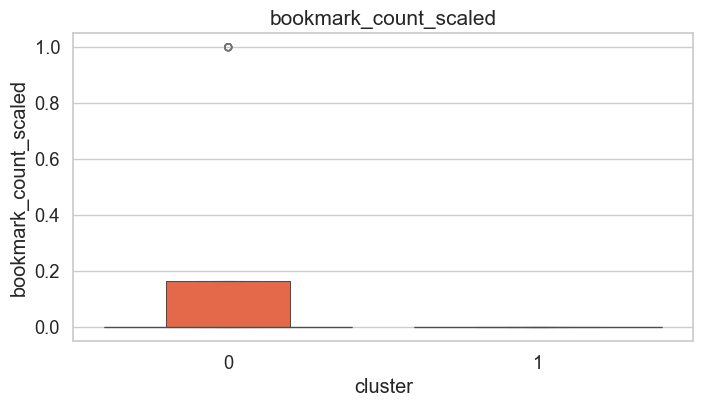

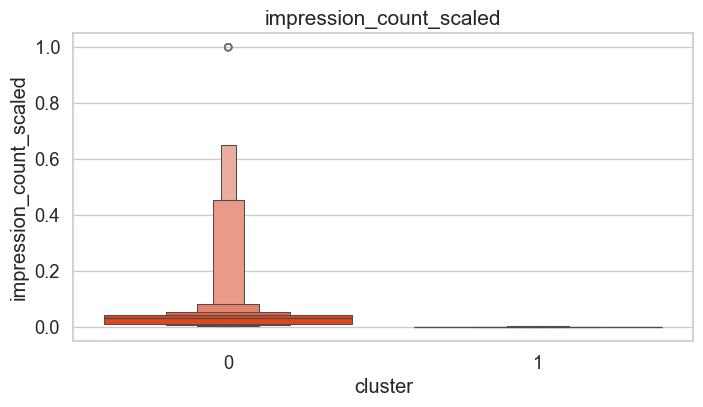

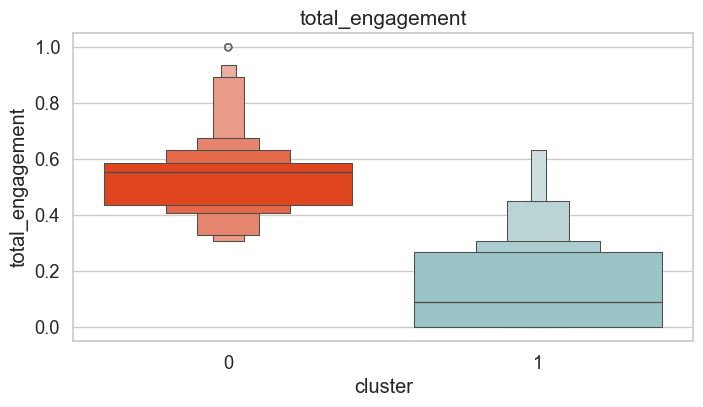

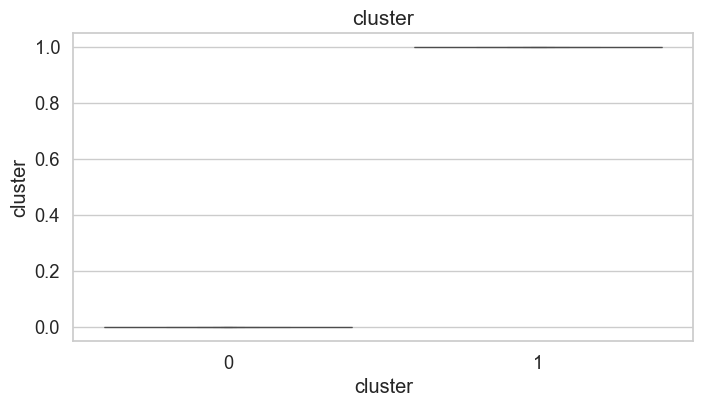

In [136]:
for i in df_km.columns:
  plt.figure(figsize=(8,4))
  pl = sns.boxenplot(x = df_km['cluster'], y = df_km[i], palette=['#ff3300','#94cace'])
  pl.set_title(i, fontsize=15)
plt.show();

#### PCA Scatterplot

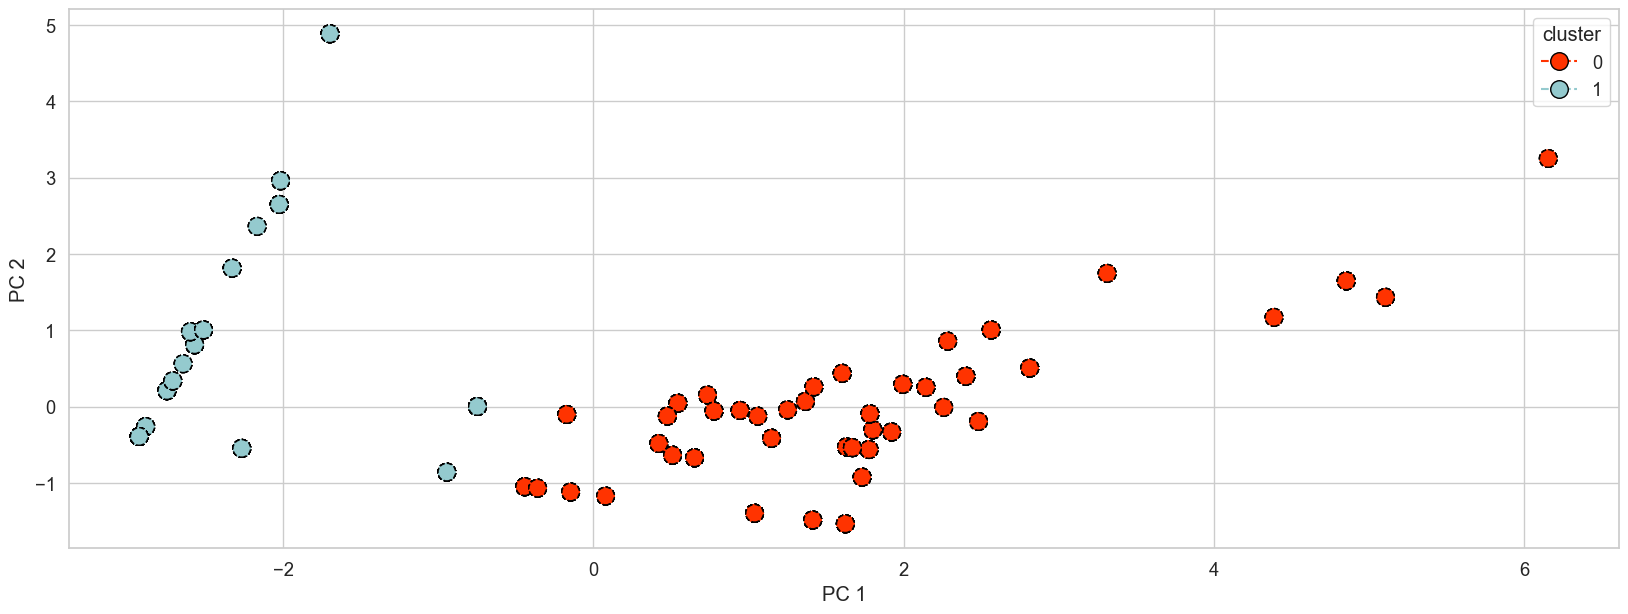

In [137]:
fig, ax = plt.subplots(figsize=(20,7))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="cluster",
    edgecolor='black',
    linestyle='--',
    data=data_pca,
    palette=['#ff3300','#94cace','#83b130'],
    s=160,
    ax=ax
)
plt.show();

In [138]:
data_pca[data_pca['cluster'] == 0].mean()

PC 1        1.497450819460911
PC 2      -0.1971056041377129
cluster                   0.0
dtype: float64

In [139]:
df_km.sample()

,likes_log,retweets_log,replies_log,quotes_log,bookmark_log,impression_count_log,likes_scaled,retweets_scaled,replies_scaled,quotes_scaled,bookmark_count_scaled,impression_count_scaled,total_engagement,cluster
1071,2.9444389791664403,1.9459101490553132,1.3862943611198906,0.0,0.6931471805599453,5.393627546352362,0.1005586592178771,0.375,0.04054054054054054,0.0,0.16666666666666666,0.10115473441108545,0.7095971632993697,0


#### Radar Chart

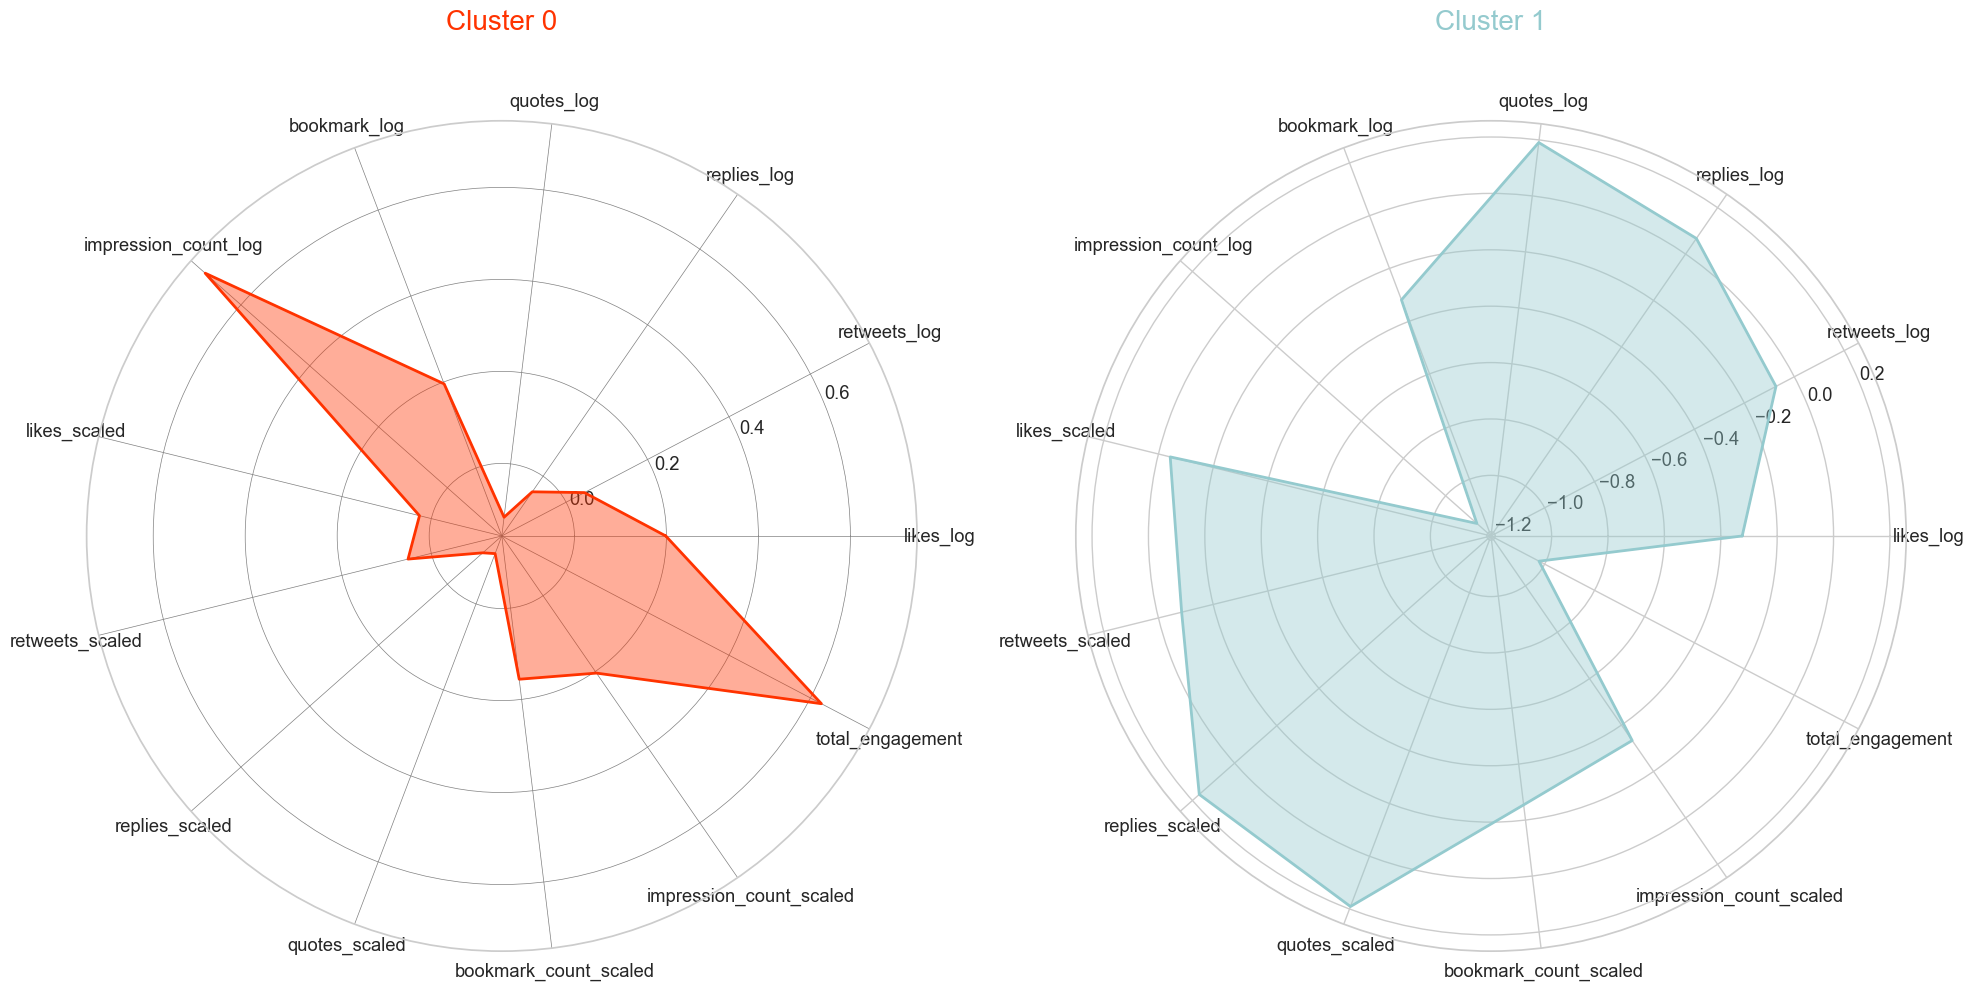

In [140]:
scaler = StandardScaler()
df_km_standardized = scaler.fit_transform(df_km.drop(columns=['cluster'], axis=1))

# Create a new dataframe with standardized values and add the cluster column back
df_km_standardized = pd.DataFrame(df_km_standardized, columns=df_km.columns[:-1], index=df_km.index)
df_km_standardized['cluster'] = df_km['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_km_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')

    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

# Set data labels
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

colors = ['#ff3300', '#94cace']  # Only two clusters, so we need only two colors

# Initialize the figure with subplots for each cluster
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=2)  # Adjusted to 2 subplots

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add input data for axis labels
for a in ax:
    a.set_xticks(angles[:-1])  # Set the correct number of ticks
    a.set_xticklabels(labels[:-1])  # Set the feature labels for each axis

# Add a grid to the first subplot (cluster 0)
ax[0].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show();

### Final DF & K_Cluster

In [141]:
df = df.assign(K_Cluster = cluster_labels)

df.sample(3)

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,hashtag,hashtag_first3,hashtag_last3,smartphone,photostyle_first,photostyle_last,phototheme,total_engagement,K_Cluster
750,1871191408369119525,"13.12 mile run, .5 mile walk! Big Podcast Day ...",2024-12-23 13:49:31+00:00,47,Brand,Brands and Companies,10037284711,Disney,No description,1,0,0,0,0.0,0.0,2024-12-23 13:49:31+0000,2024-12-23,13,Monday,"[#runDisney, #WDW, #Disney, #Disneyland, #Walt...","[runDisney, WDW, Disney]","[marathon, Apple, ShotOniPhone]",iPhone,traveling,traveling,traveling,1.0,1
619,1871764128030969882,#TimeToCelebrate Christmas Day \n#shotonsnapdr...,2024-12-25 03:45:18+00:00,29,Events [Entity Service],Real world events.,1250078501849280512,Christmas,This entity includes all conversations for Chr...,2,1,0,0,0.0,20.0,2024-12-25 03:45:18+0000,2024-12-25,3,Wednesday,"[#TimeToCelebrate, #shotonsnapdragon, #withGal...","[TimeToCelebrate, shotonsnapdragon, withGalaxy]","[withGalaxy, SamsungMembersStar, GalaxyAI]",Android,other,other,other,23.0,0
796,1871175594991333767,@peaceful_AJ Thank you for sharing and highlig...,2024-12-23 12:46:41+00:00,47,Brand,Brands and Companies,10026364281,Apple,No description,13,2,1,0,0.0,0.0,2024-12-23 12:46:41+0000,2024-12-23,12,Monday,[#ShotOniPhone],[ShotOniPhone],[ShotOniPhone],iPhone,other,other,other,16.0,1


#### Analysis on K_Cluster 1

In [142]:
df[df['K_Cluster'] == 1].sample()

,tweet_id,tweet_text,created_at,domain_id,domain_name,domain_description,entity_id,entity_name,entity_description,likes,retweets,replies,quotes,bookmark_count,impression_count,datetime,date,hour,day_name,hashtag,hashtag_first3,hashtag_last3,smartphone,photostyle_first,photostyle_last,phototheme,total_engagement,K_Cluster
971,1871133606888010075,Upgrade your smartphone experience today!\n Yo...,2024-12-23 09:59:50+00:00,131,Unified Twitter Taxonomy,A taxonomy of user interests.,1303989823011606528,Tech events,No description,0,0,0,0,0.0,0.0,2024-12-23 09:59:50+0000,2024-12-23,9,Monday,"[#iPhoneA20Pro, #TechInnovation, #AppleLovers,...","[iPhoneA20Pro, TechInnovation, AppleLovers]","[AppleProSeries, NextGenTech, iOS18]",iPhone,other,other,other,0.0,1


In [143]:
df[df['K_Cluster'] == 1][['likes','retweets','replies','quotes','bookmark_count','impression_count','hour']].describe()

,likes,retweets,replies,quotes,bookmark_count,impression_count,hour
count,423.0,423.0,423.0,423.0,423.0,423.0,423.0
mean,4.711583924349882,0.2127659574468085,2.479905437352246,0.03546099290780142,0.0,0.9101654846335697,12.768321513002364
std,12.30158287880471,0.6250138649263765,12.758751219945408,0.18516090803262653,0.0,2.2928832241653625,3.1159639058020576
min,0.0,0.0,0.0,0.0,0.0,0.0,6.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,11.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,13.0
75%,1.5,0.0,0.0,0.0,0.0,0.0,14.0
max,60.0,3.0,74.0,1.0,0.0,7.0,19.0


In [144]:
# hour on posting
df[df['K_Cluster'] == 1]['hour'].value_counts().to_frame().sort_values('hour', ascending=True).reset_index()

,hour,count
0,6,16
1,7,21
2,8,13
3,9,16
4,11,57
5,12,32
6,13,89
7,14,120
8,15,12
9,18,11


In [145]:
# phototheme count
df[df['K_Cluster'] == 1]['phototheme'].value_counts().to_frame().sort_values('count', ascending=False).reset_index()

,phototheme,count
0,traveling,155
1,other,122
2,portrait,95
3,sport,20
4,wildlife,18
5,landscape,13


In [146]:
# Filter untuk cluster 1
cl1 = (
    df[df['K_Cluster'] == 1]
    .groupby(['hour', 'phototheme'])['total_engagement']  # Agregasi berdasarkan total_engagement
    .sum()
    .reset_index()  # Ubah kembali menjadi DataFrame
    .sort_values(['hour', 'total_engagement'], ascending=[True, False])  # Urutkan
)

# Ambil phototheme dengan total_engagement terbanyak untuk setiap hour
most_frequent_phototheme_1 = (
    cl1.loc[cl1.groupby('hour')['total_engagement'].idxmax()]  # Pilih phototheme dengan engagement tertinggi
    .reset_index(drop=True)  # Hilangkan index lama
)

most_frequent_phototheme_1

,hour,phototheme,total_engagement
0,6,other,112.0
1,7,traveling,21.0
2,8,other,13.0
3,9,other,0.0
4,11,traveling,915.0
5,12,other,80.0
6,13,other,"1,832.0"
7,14,sport,60.0
8,15,traveling,0.0
9,18,other,44.0


In [147]:
most_frequent_phototheme_1['total_engagement'].sum()

np.float64(3401.0)

#### Analysis on K_Cluster 0

In [148]:
df[df['K_Cluster'] == 0][['likes','retweets','replies','quotes','bookmark_count','impression_count','hour']].describe()

,likes,retweets,replies,quotes,bookmark_count,impression_count,hour
count,690.0,690.0,690.0,690.0,690.0,690.0,690.0
mean,5.759420289855073,0.3898550724637681,0.3347826086956522,0.0,0.2028985507246377,120.77101449275362,12.631884057971014
std,16.545932187160478,1.5652842035526662,0.6594905204600284,0.0,0.6161755292703748,273.4373143996281,6.923435574965899
min,0.0,0.0,0.0,0.0,0.0,10.0,1.0
25%,1.0,0.0,0.0,0.0,0.0,28.0,5.0
50%,3.0,0.0,0.0,0.0,0.0,72.0,14.0
75%,4.0,0.0,1.0,0.0,0.0,91.0,19.0
max,179.0,16.0,3.0,0.0,6.0,"2,165.0",23.0


In [149]:
# phototheme count
df[df['K_Cluster'] == 0]['phototheme'].value_counts().to_frame().sort_values('count', ascending=False).reset_index()

,phototheme,count
0,traveling,308
1,other,179
2,portrait,92
3,event,86
4,sport,25


In [150]:
# Filter untuk cluster 1
cl1 = (
    df[df['K_Cluster'] == 0]
    .groupby(['hour', 'phototheme'])['total_engagement']  # Agregasi berdasarkan total_engagement
    .sum()
    .reset_index()  # Ubah kembali menjadi DataFrame
    .sort_values(['hour', 'total_engagement'], ascending=[True, False])  # Urutkan
)

# Ambil phototheme dengan total_engagement terbanyak untuk setiap hour
most_frequent_phototheme_0 = (
    cl1.loc[cl1.groupby('hour')['total_engagement'].idxmax()]  # Pilih phototheme dengan engagement tertinggi
    .reset_index(drop=True)  # Hilangkan index lama
)

most_frequent_phototheme_0

,hour,phototheme,total_engagement
0,1,other,"1,120.0"
1,2,traveling,"4,689.0"
2,3,traveling,"1,368.0"
3,4,event,"1,952.0"
4,5,traveling,696.0
5,7,other,392.0
6,14,traveling,"14,014.0"
7,15,other,"16,129.0"
8,16,other,"2,454.0"
9,17,other,322.0


In [151]:
print('total engagement on Cluster 0 for most photo theme =',most_frequent_phototheme_0['total_engagement'].sum())
print('total engagement on Cluster 1 for most photo theme =',most_frequent_phototheme_1['total_engagement'].sum())

total engagement on Cluster 0 for most photo theme = 81985.0
total engagement on Cluster 1 for most photo theme = 3401.0


In [152]:
#cluster comparison

clusters_df = pd.merge(most_frequent_phototheme_0,most_frequent_phototheme_1,on='hour', how='outer')

In [153]:
clusters_df.fillna(0, inplace=True)

In [154]:
clusters_df.rename(columns={'phototheme_x': 'phototheme_cluster0', 'total_engagement_x': 'total_engagement_cluster0',
                            'phototheme_y': 'phototheme_cluster1', 'total_engagement_y': 'total_engagement_cluster1',
                           }, inplace=True)



In [155]:
clusters_df

,hour,phototheme_cluster0,total_engagement_cluster0,phototheme_cluster1,total_engagement_cluster1
0,1,other,"1,120.0",0,0.0
1,2,traveling,"4,689.0",0,0.0
2,3,traveling,"1,368.0",0,0.0
3,4,event,"1,952.0",0,0.0
4,5,traveling,696.0,0,0.0
5,6,0,0.0,other,112.0
6,7,other,392.0,traveling,21.0
7,8,0,0.0,other,13.0
8,9,0,0.0,other,0.0
9,11,0,0.0,traveling,915.0


##### Analysis on Hours by Clusters

In [156]:
clh0 = df[df['K_Cluster'] == 0][['likes','retweets','replies','quotes','bookmark_count','impression_count','hour']]
clh1 = df[df['K_Cluster'] == 1][['likes','retweets','replies','quotes','bookmark_count','impression_count','hour']]

In [157]:
sorted_hours_clh0 = np.sort(clh0['hour'].unique())

sorted_hours_clh0

array([ 1,  2,  3,  4,  5,  7, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [158]:
sorted_hours_clh1 = np.sort(clh1['hour'].unique())

sorted_hours_clh1

array([ 6,  7,  8,  9, 11, 12, 13, 14, 15, 18, 19])

In [159]:
# Hours (intersection) among Clusters
common_hours = np.intersect1d(sorted_hours_clh0, sorted_hours_clh1)

print('Intersection Hours Among Clusters :',common_hours)

Intersection Hours Among Clusters : [ 7 14 15 18 19]


### Business Recommendation

The conclusion based on the data is that the best time to publish content is at 3:00 PM, as it is the most efficient for engagement. As in the data :
1. 15.00 exist in both clusters
2. 15.00 also has the highest engagement among others